##Analyze Bike Store Sales
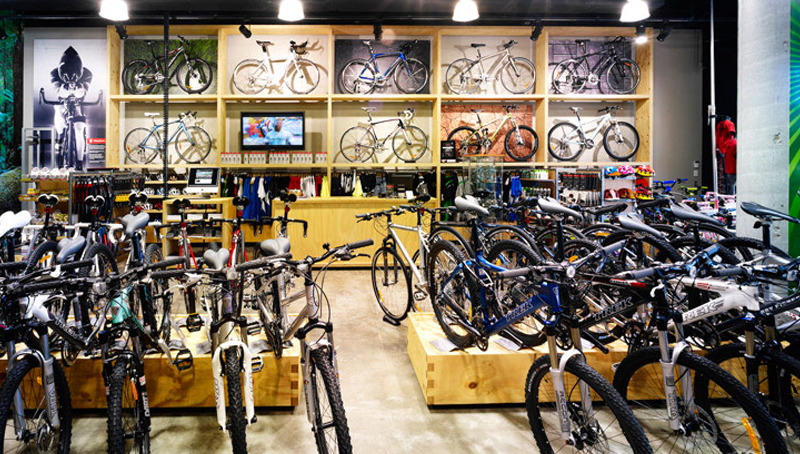

##Exploratory Data Analysis - EDA
**Goal**: Understand the structure of the data, detect missing values and outliers, and explore distributions and relationships between variables.

In [1]:
# Install required libraries
!pip install streamlit pyngrok prophet plotly --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 62.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 79.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.5 MB/s eta 0:00:00


In [2]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from scipy.stats import linregress
from prophet import Prophet
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

import streamlit as st
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Load data
sales = pd.read_csv('sales_data.csv')

In [4]:
sales.shape

(5000, 16)

In [5]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              5000 non-null   object
 1   Day               5000 non-null   int64 
 2   Month             5000 non-null   object
 3   Year              5000 non-null   int64 
 4   Customer_Age      5000 non-null   int64 
 5   Customer_Gender   5000 non-null   object
 6   Country           5000 non-null   object
 7   State             5000 non-null   object
 8   Product_Category  5000 non-null   object
 9   Sub_Category      5000 non-null   object
 10  Product           5000 non-null   object
 11  Order_Quantity    5000 non-null   int64 
 12  Unit_Cost         5000 non-null   int64 
 13  Unit_Price        5000 non-null   int64 
 14  Profit            5000 non-null   int64 
 15  Revenue           5000 non-null   int64 
dtypes: int64(8), object(8)
memory usage: 625.1+ KB


In [6]:
sales.head()

Date  Day      Month  Year  Customer_Age Customer_Gender  \
0  2014-03-05    5      March  2014            34               M   
1  2013-08-18   18     August  2013            31               F   
2  2014-02-04    4   February  2014            31               F   
3  2013-09-09    9  September  2013            33               M   
4  2016-05-16   16        May  2016            35               F   

         Country             State Product_Category     Sub_Category  \
0  United States        California      Accessories          Fenders   
1         Canada  British Columbia         Clothing            Vests   
2  United States        Washington            Bikes    Touring Bikes   
3      Australia          Victoria      Accessories  Tires and Tubes   
4  United States        Washington      Accessories  Tires and Tubes   

                   Product  Order_Quantity  Unit_Cost  Unit_Price  Profit  \
0    Fender Set - Mountain              27          8          22     366   
1          Classic Vest, L              13         24          64     512   
2  Touring-1000 Yellow, 54               1       1482        2384     378   
3             LL Road Tire              25          8          21     215   
4       Mountain Tire Tube              28          2           5      53   

   Revenue  
0      582  
1      824  
2     1860  
3      415  
4      109

In [7]:
sales.tail()

Date  Day     Month  Year  Customer_Age Customer_Gender  \
4995  2014-01-27   27   January  2014            34               M   
4996  2014-07-14   14      July  2014            17               M   
4997  2013-12-30   30  December  2013            25               F   
4998  2016-01-06    6   January  2016            57               M   
4999  2014-03-09    9     March  2014            50               F   

            Country             State Product_Category       Sub_Category  \
4995  United States        California      Accessories  Bottles and Cages   
4996         France        Val d'Oise         Clothing               Caps   
4997         Canada  British Columbia      Accessories            Helmets   
4998         Canada  British Columbia      Accessories    Tires and Tubes   
4999      Australia        Queensland      Accessories    Tires and Tubes   

                     Product  Order_Quantity  Unit_Cost  Unit_Price  Profit  \
4995   Water Bottle - 30 oz.              20          2           5      58   
4996            AWC Logo Cap              12          7           9       1   
4997  Sport-100 Helmet, Blue              20         13          35     433   
4998     Patch Kit/8 Patches              16          1           2      16   
4999     Patch Kit/8 Patches              15          1           2      10   

      Revenue  
4995       98  
4996       85  
4997      693  
4998       32  
4999       25

In [8]:
# Check for missing values
print(sales.isnull().sum())

Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Revenue             0
dtype: int64


In [9]:
# Define numeric columns
numeric_cols = ['Profit', 'Revenue', 'Order_Quantity', 'Unit_Cost', 'Unit_Price', 'Customer_Age']

In [10]:
#Statistical Summary
sales[numeric_cols].describe().T

count      mean          std   min   25%    50%     75%  \
Profit          5000.0  291.6534   457.359971 -24.0  29.0  103.0  367.00   
Revenue         5000.0  772.7580  1306.052588   2.0  64.0  226.0  829.25   
Order_Quantity  5000.0   11.8204     9.607841   1.0   2.0   10.0   20.00   
Unit_Cost       5000.0  278.4150   562.721951   1.0   2.0    9.0   42.00   
Unit_Price      5000.0  470.6806   941.590529   2.0   5.0   25.0   70.00   
Customer_Age    5000.0   35.9338    11.087886  17.0  28.0   35.0   43.00   

                    max  
Profit           5342.0  
Revenue         14026.0  
Order_Quantity     32.0  
Unit_Cost        2171.0  
Unit_Price       3578.0  
Customer_Age       87.0

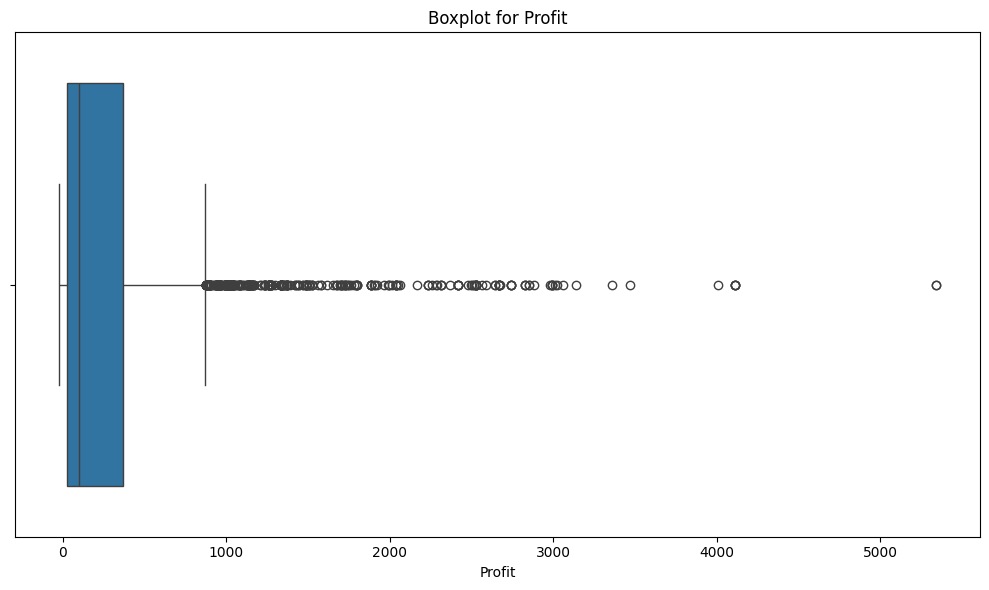

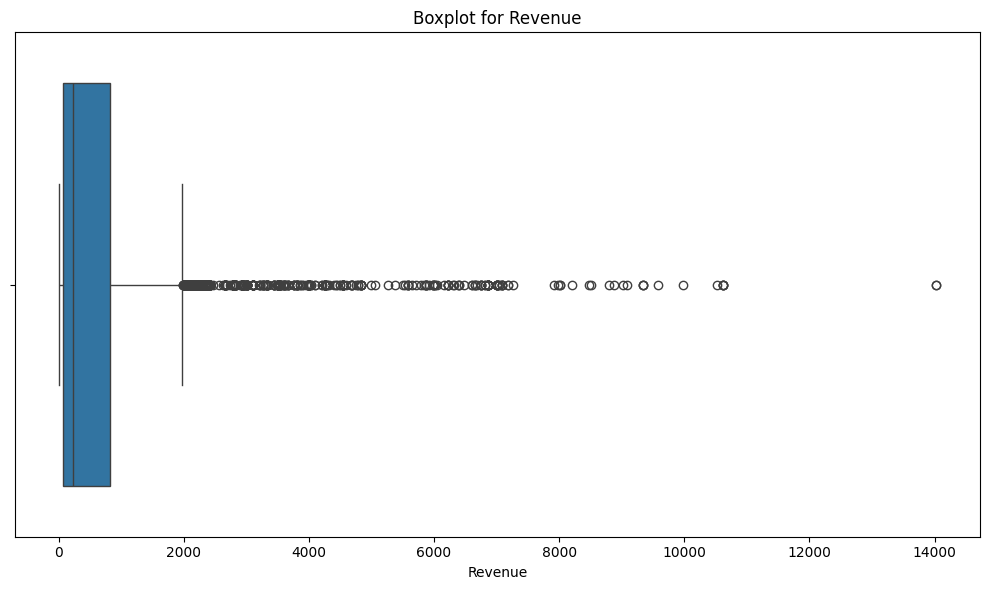

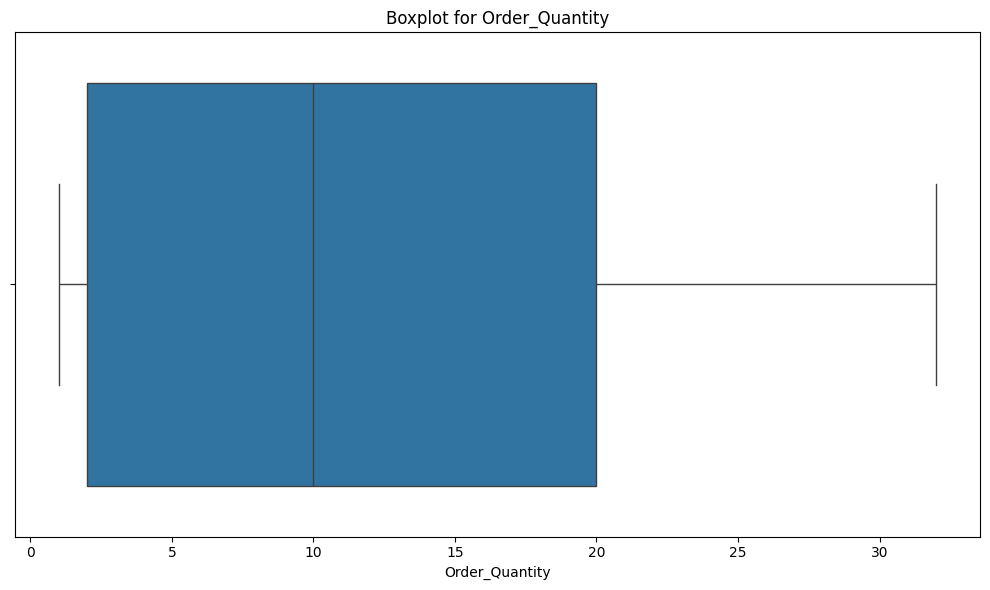

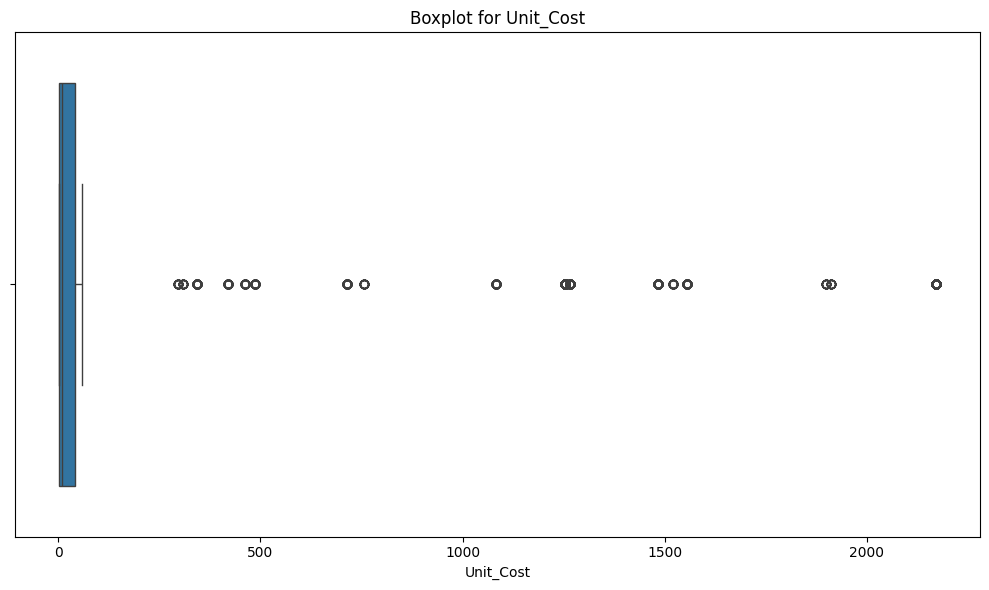

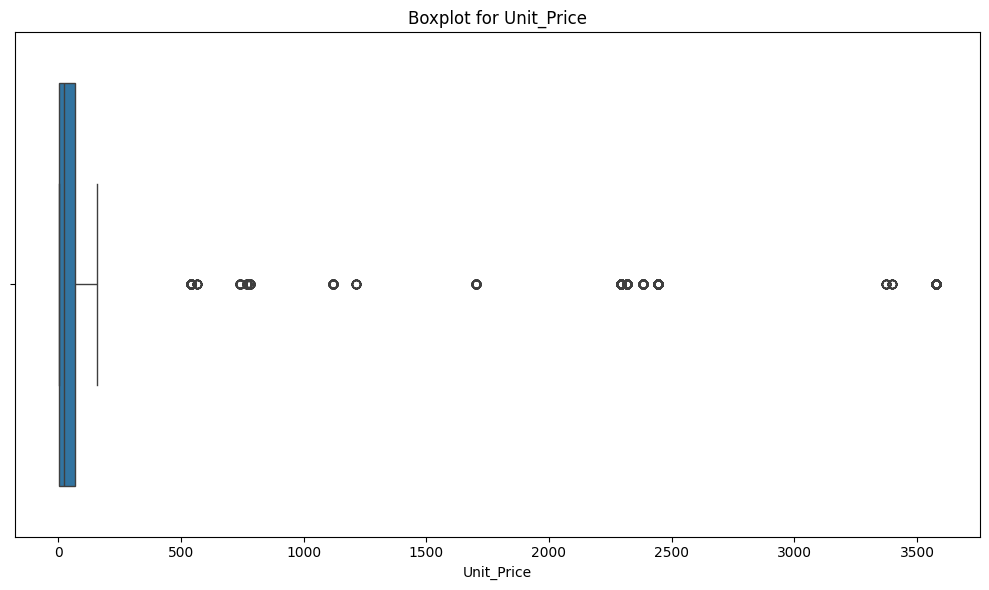

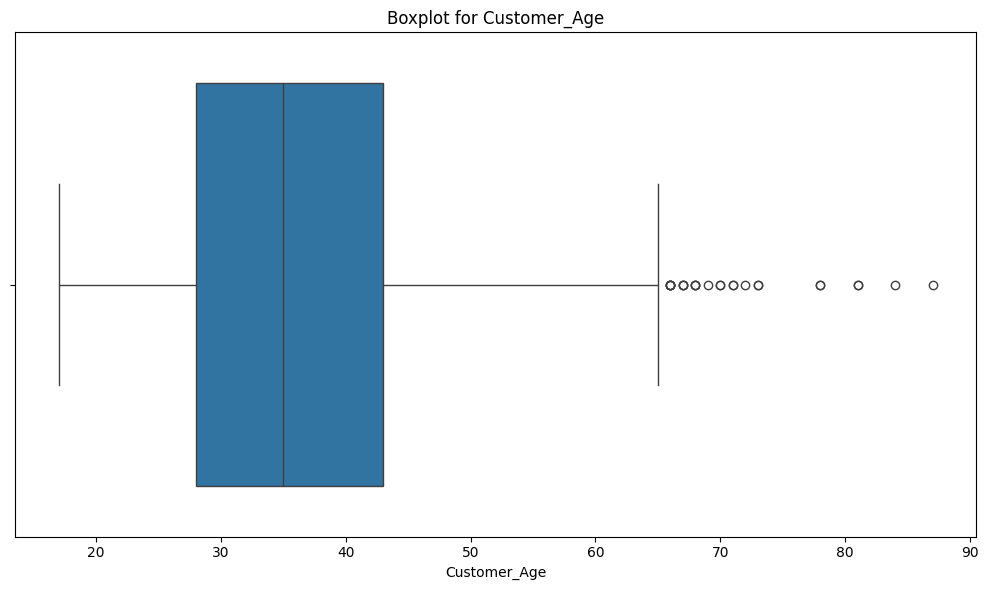

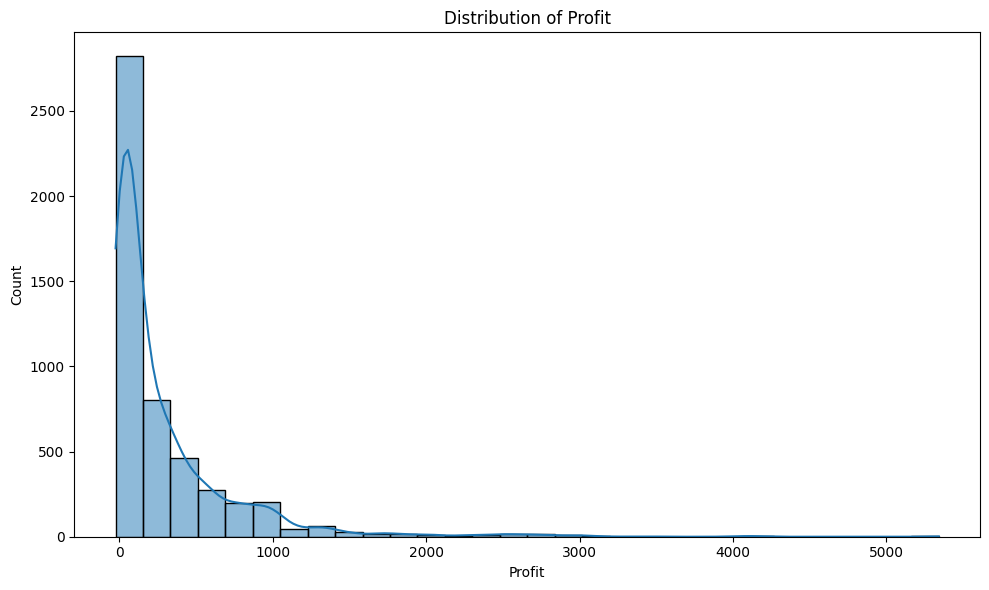

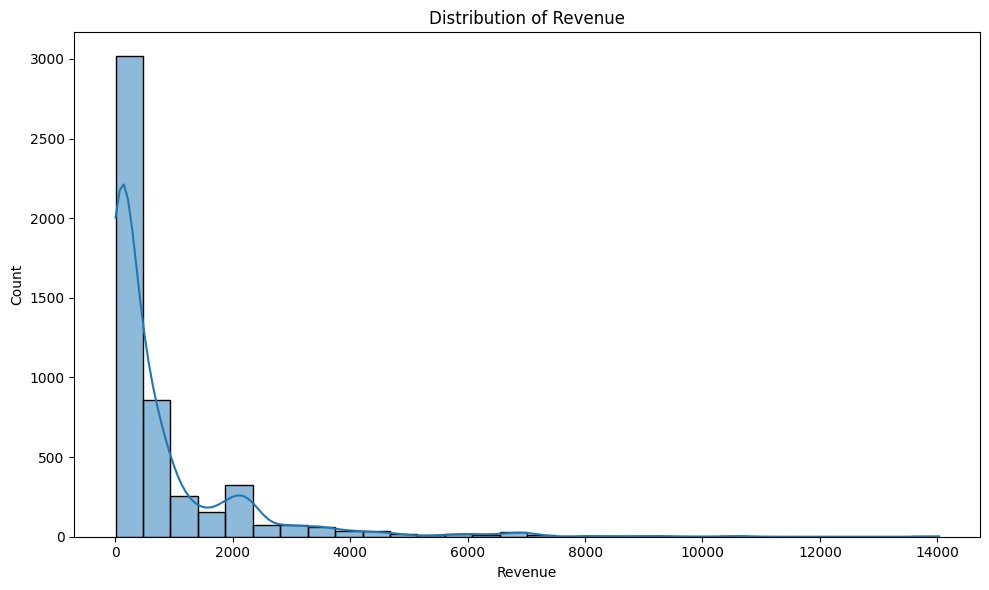

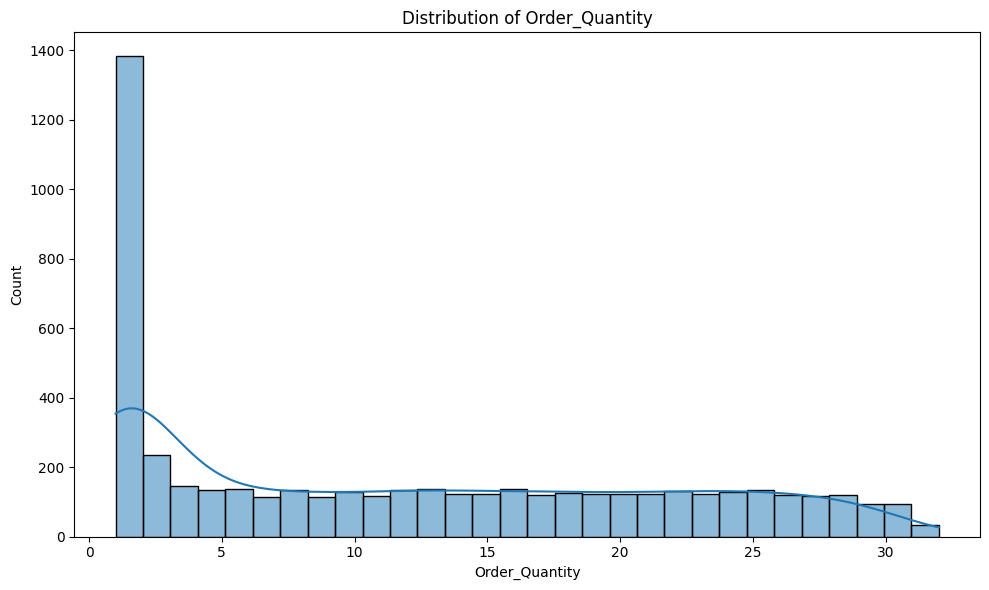

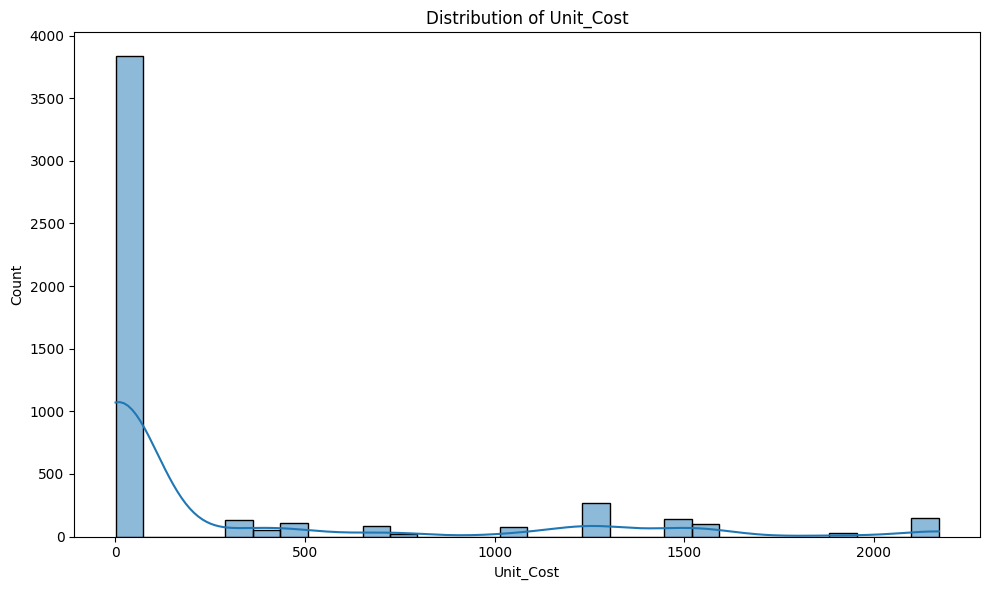

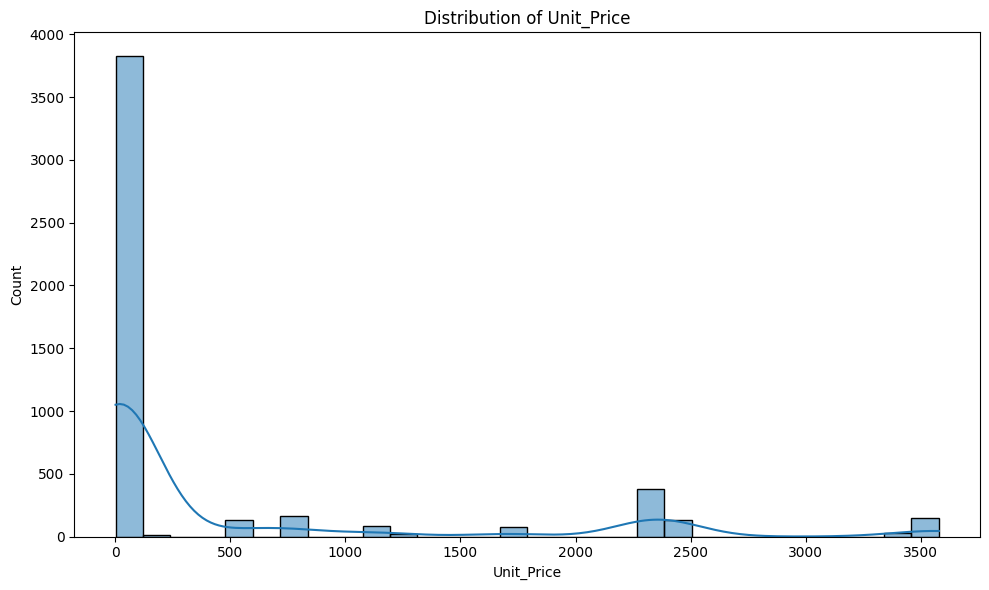

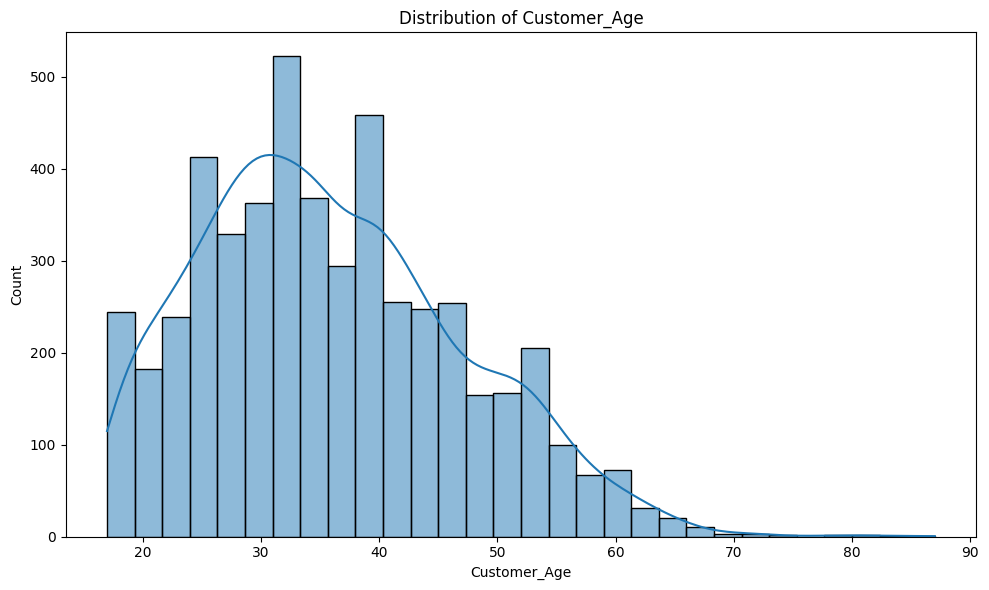

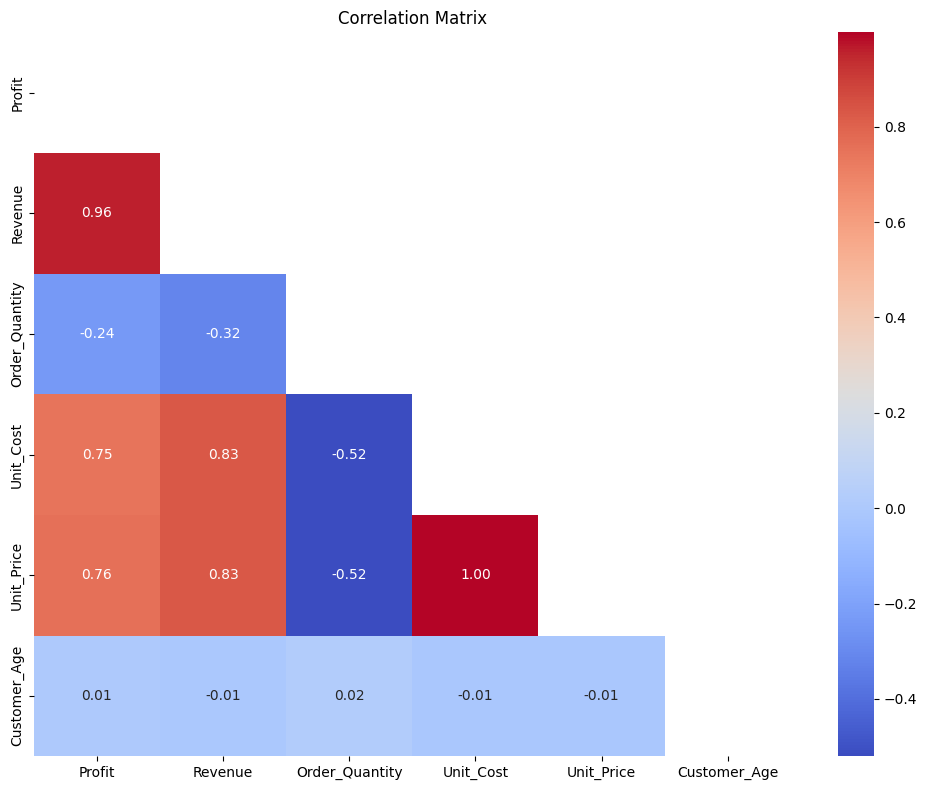

In [11]:
# Boxplots for numerical features
# Purpose: Detect outliers that could skew analysis or modeling

for col in numeric_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=sales[col])
    plt.title(f'Boxplot for {col}')
    plt.tight_layout()
    plt.show()

# Histograms with KDE for distribution
# Purpose: Understand the distribution of each numerical variable (normal, skewed, etc.)

for col in numeric_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(sales[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

# Correlation Heatmap
# Purpose: Identify the strength and direction of relationships between numerical variables

plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(sales[numeric_cols].corr(), dtype=bool))
sns.heatmap(sales[numeric_cols].corr(), annot=True, mask=mask, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

##Data Cleaning & Preprocessing
**Goal**: Ensure the dataset is clean and ready for analysis by handling duplicates,fixing data types, and preparing categorical and datetime columns.

In [17]:
# Check for duplicates
print("Number of duplicate rows:", sales.duplicated().sum())

Number of duplicate rows: 0


In [18]:
duplicates_all = sales[sales.duplicated(keep=False)]
display(duplicates_all)

Empty DataFrame
Columns: [Date, Day, Month, Year, Customer_Age, Customer_Gender, Country, State, Product_Category, Sub_Category, Product, Order_Quantity, Unit_Cost, Unit_Price, Profit, Revenue]
Index: []

In [19]:
# Remove duplicates
sales = sales.drop_duplicates(keep='first')
print(sales.shape)

(4999, 16)


In [20]:
# Fixing Column Types
# Convert Date column to datetime
sales['Date'] = pd.to_datetime(sales['Date'], errors='coerce')

# Check if any dates failed to convert
print("Missing values in 'Date' after conversion:", sales['Date'].isna().sum())


# Convert selected columns to categorical type
categorical_columns = ['Customer_Gender', 'Country', 'State', 'Product_Category', 'Sub_Category']

for col in categorical_columns:
    sales[col] = sales[col].astype('category')

Missing values in 'Date' after conversion: 0


In [21]:
# Check data types after conversion
print("\nData Types After Conversion:")
print(sales.dtypes)

# Final check for missing values
print("\nMissing values summary:")
print(sales.isnull().sum())


Data Types After Conversion:
Date                datetime64[ns]
Day                          int64
Month                       object
Year                         int64
Customer_Age                 int64
Customer_Gender           category
Country                   category
State                     category
Product_Category          category
Sub_Category              category
Product                     object
Order_Quantity               int64
Unit_Cost                    int64
Unit_Price                   int64
Profit                       int64
Revenue                      int64
dtype: object

Missing values summary:
Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Revenue             0
dtype: int64


## Feature Engineering  
**Goal**: Create new columns that provide more insight and support advanced analysis.

- **`YearMonth`**: Combines year and month into a single string (e.g., `'2022-07'`) for trend analysis.
- **`Year`, `Month`, `Day`**: Extracted from the `Date` column to support temporal analysis.
- **`Month_Name`**: Returns the full month name (e.g., `'July'`) for more readable plots.
- **`Weekday`**: Shows the day of the week (e.g., `'Monday'`) for weekday-based sales patterns.
- **`Is_Weekend`**: Boolean flag that indicates if the sale occurred on a weekend.
- **`Season`**: Categorizes months into four seasons (`Winter`, `Spring`, `Summer`, `Fall`) for seasonal trend analysis.
- **`Profit_per_Unit`**: Calculates profit per unit sold (`Profit / Order_Quantity`) to evaluate product performance.
- **`Total_Cost`**: Total production/purchase cost of the order (`Unit_Cost * Order_Quantity`).
- **`Order_Value`**: Total sales value for an order (`Unit_Price * Order_Quantity`).
- **`Gross_Profit_Margin`**: Measures profitability as a percentage of revenue (`Profit / Revenue`).
- **`Age_Group`**: Segments customer ages into meaningful predefined ranges (`17–24`, `25–34`, `35–44`, `45–54`, `55+`) using `pd.cut`, which helps in clear demographic interpretation and targeted marketing.

- **`Customer_Segment`**: Created using **K-Means clustering** on `Customer_Age`, `Revenue`, and `Profit` to group customers into distinct behavioral segments based on purchasing patterns.

In [23]:
# Create new columns

# --- Time-based Features ---
sales['YearMonth'] = sales['Date'].dt.to_period('M').astype(str)
sales['Year'] = sales['Date'].dt.year
sales['Month'] = sales['Date'].dt.month
sales['Day'] = sales['Date'].dt.day
sales['Month_Name'] = sales['Date'].dt.month_name()
sales['Weekday'] = sales['Date'].dt.day_name()
sales['Is_Weekend'] = sales['Date'].dt.dayofweek.isin([5, 6]).astype(int)  # 1 if weekend else 0

# --- Season Classification ---
seasons = {12: 'Winter', 1: 'Winter', 2: 'Winter',
           3: 'Spring', 4: 'Spring', 5: 'Spring',
           6: 'Summer', 7: 'Summer', 8: 'Summer',
           9: 'Fall', 10: 'Fall', 11: 'Fall'}
sales['Season'] = sales['Month'].map(seasons)

# --- Profit and Cost Metrics ---
sales['Profit_per_Unit'] = np.where(
    (sales['Order_Quantity'] == 0) | (sales['Order_Quantity'].isna()),
    np.nan,
    sales['Profit'] / sales['Order_Quantity']
)
sales['Total_Cost'] = sales['Unit_Cost'] * sales['Order_Quantity']
sales['Order_Value'] = sales['Unit_Price'] * sales['Order_Quantity']
sales['Gross_Profit_Margin'] = sales['Profit'] / (sales['Revenue'] + 1e-9)

# --- Customer Segmentation by Age ---
bins = [17, 24, 34, 44, 54, 100]
labels = ['17-24', '25-34', '35-44', '45-54', '55+']
sales['Age_Group'] = pd.cut(sales['Customer_Age'], bins=bins, labels=labels, right=True, include_lowest=True)

# --- Customer Behavioral Segmentation (KMeans Clustering) ---

scaler = StandardScaler()
features = sales[['Customer_Age', 'Revenue', 'Profit']].dropna()
scaled_features = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
sales['Customer_Segment'] = np.nan
sales.loc[features.index, 'Customer_Segment'] = kmeans.fit_predict(scaled_features)

# Convert Customer_Segment to integer type with support for NaN values
sales['Customer_Segment'] = sales['Customer_Segment'].astype('Int64')

## Data Analysis



### Customer Analysis

In this section, we explore customer behavior by age and gender using both statistical and visual techniques. We also utilize the `Customer_Segment` variable created via K-Means clustering (based on Customer_Age, Revenue, and Profit) to reveal customer groups for more targeted insights.



Average Customer Age: 35.94


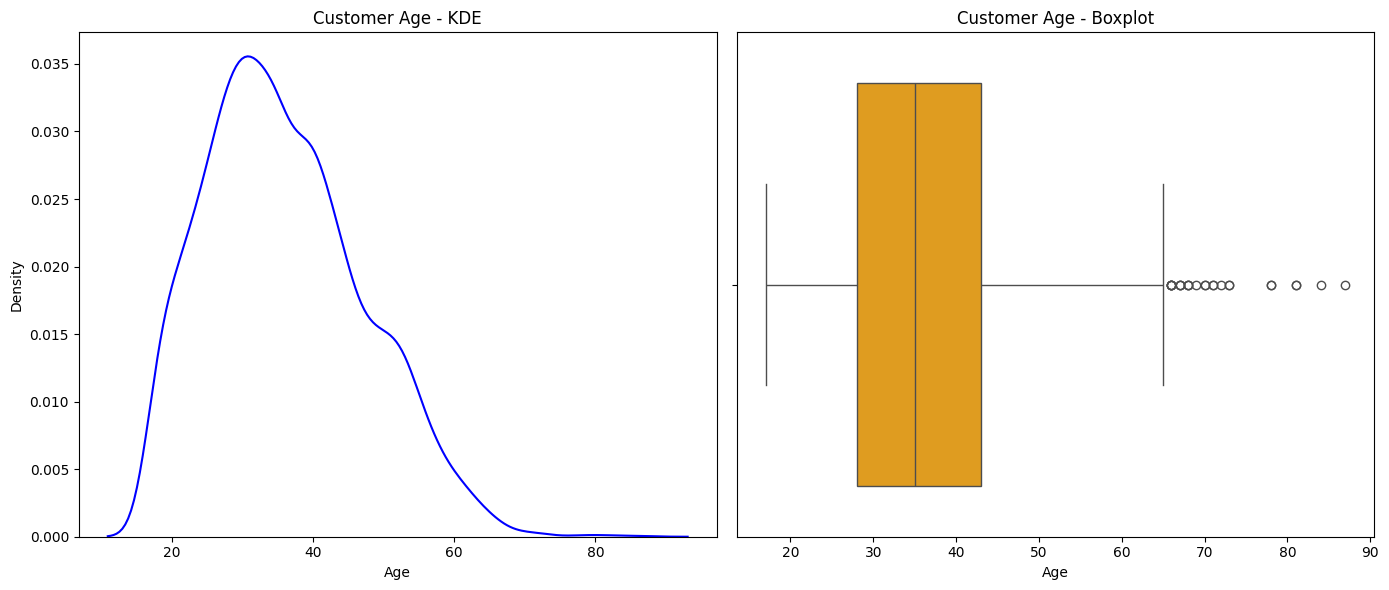

In [24]:
# Customer Age Analysis

# Calculate and print the average customer age
avg_age = sales['Customer_Age'].mean()
print(f"Average Customer Age: {avg_age:.2f}")

# Create subplots for Age KDE and Boxplot
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.kdeplot(sales['Customer_Age'], ax=axes[0], color='blue')
axes[0].set_title("Customer Age - KDE")
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Density")

sns.boxplot(x=sales['Customer_Age'], ax=axes[1], color='orange')
axes[1].set_title("Customer Age - Boxplot")
axes[1].set_xlabel("Age")
axes[1].set_ylabel("")

plt.tight_layout()
plt.show()

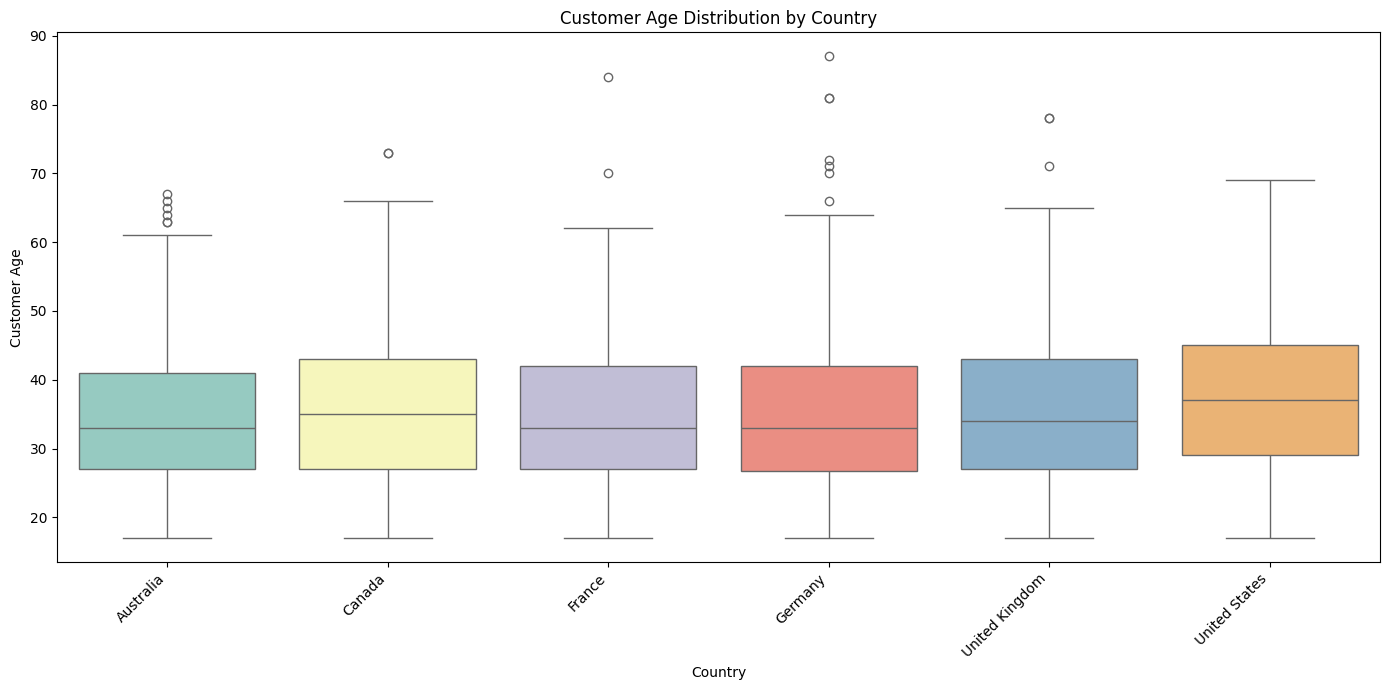

In [25]:
# Customer Age by Country
plt.figure(figsize=(14, 7))
sns.boxplot(x='Country', y='Customer_Age', data=sales, palette='Set3')
plt.xticks(rotation=45, ha='right')
plt.title("Customer Age Distribution by Country")
plt.xlabel("Country")
plt.ylabel("Customer Age")
plt.tight_layout()
plt.show()

Sales count by gender:
Customer_Gender
M    2563
F    2436
Name: count, dtype: int64
Most sales by gender: M


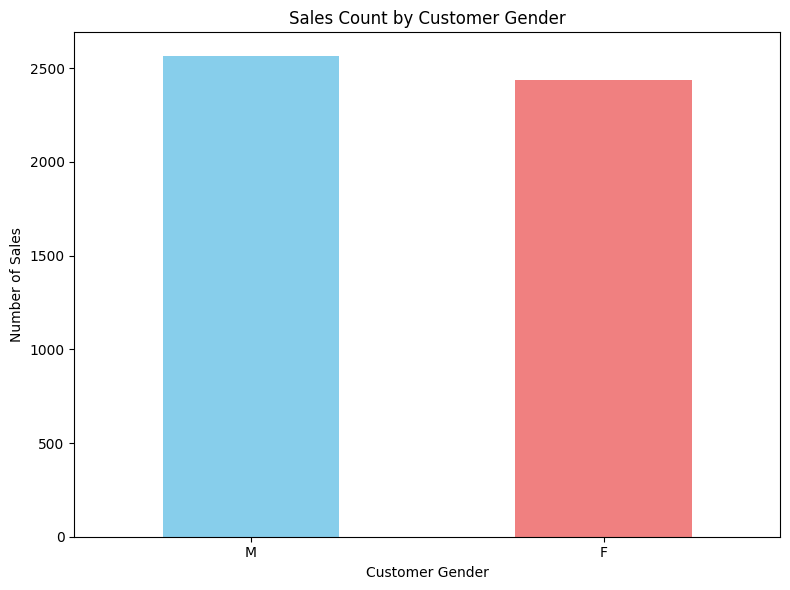

In [26]:
# Gender Sales Count
counts = sales['Customer_Gender'].value_counts()
print(f"Sales count by gender:\n{counts}\nMost sales by gender: {counts.idxmax()}")

plt.figure(figsize=(8, 6))
counts.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Sales Count by Customer Gender')
plt.xlabel('Customer Gender')
plt.ylabel('Number of Sales')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [27]:
# Count of Sales with Revenue > 500 by Male Customers
high_value_male_sales = sales[(sales['Revenue'] > 500) & (sales['Customer_Gender'] == 'M')].shape[0]
print("High-value male sales (Revenue > 500):", high_value_male_sales)

High-value male sales (Revenue > 500): 994


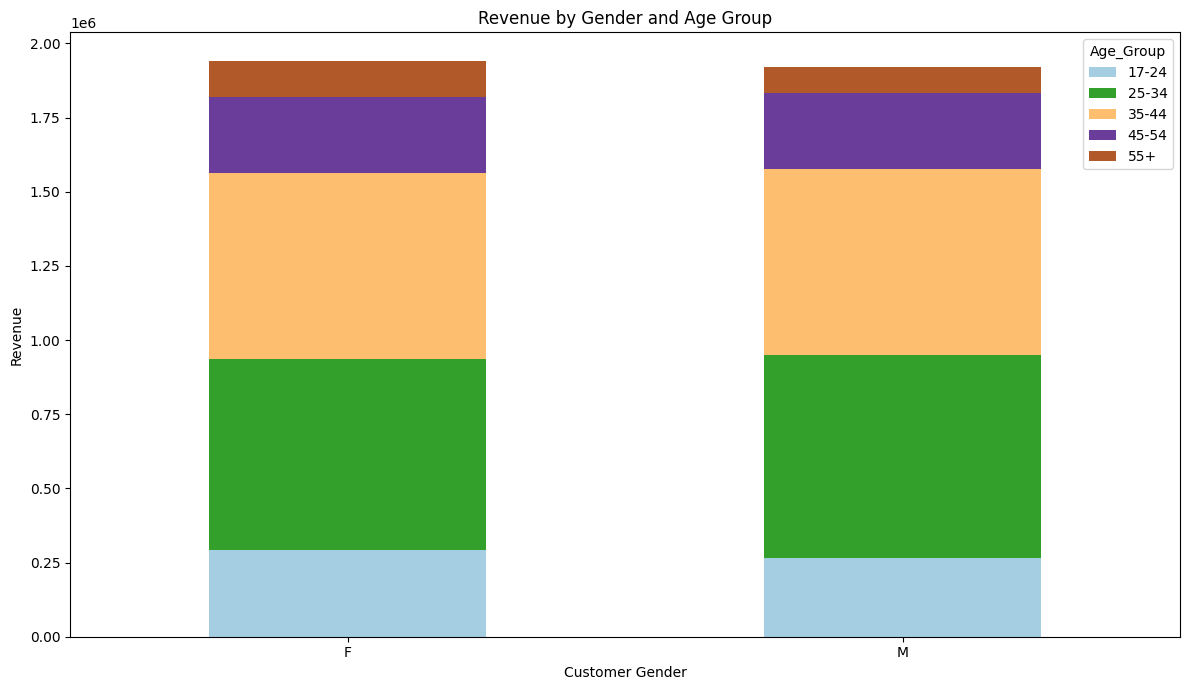

In [28]:
# Revenue by Gender and Age Group - stacked bar
age_gender_sales = sales.groupby(['Customer_Gender', 'Age_Group'])['Revenue'].sum().unstack()
age_gender_sales.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='Paired', title='Revenue by Gender and Age Group')
plt.ylabel('Revenue')
plt.xlabel('Customer Gender')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

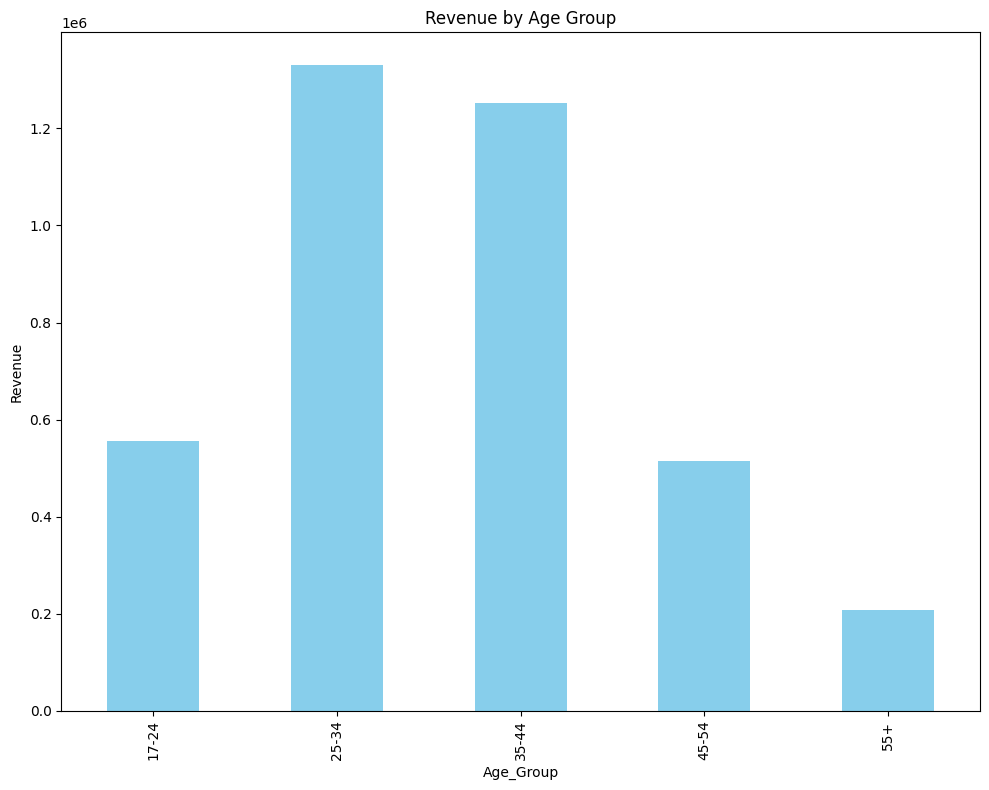

In [29]:
# Total Revenue by Age Group
plt.figure(figsize=(10, 8))
sales.groupby('Age_Group')['Revenue'].sum().plot(kind='bar', title='Revenue by Age Group', color='skyblue')
plt.ylabel('Revenue')
plt.tight_layout()
plt.show()

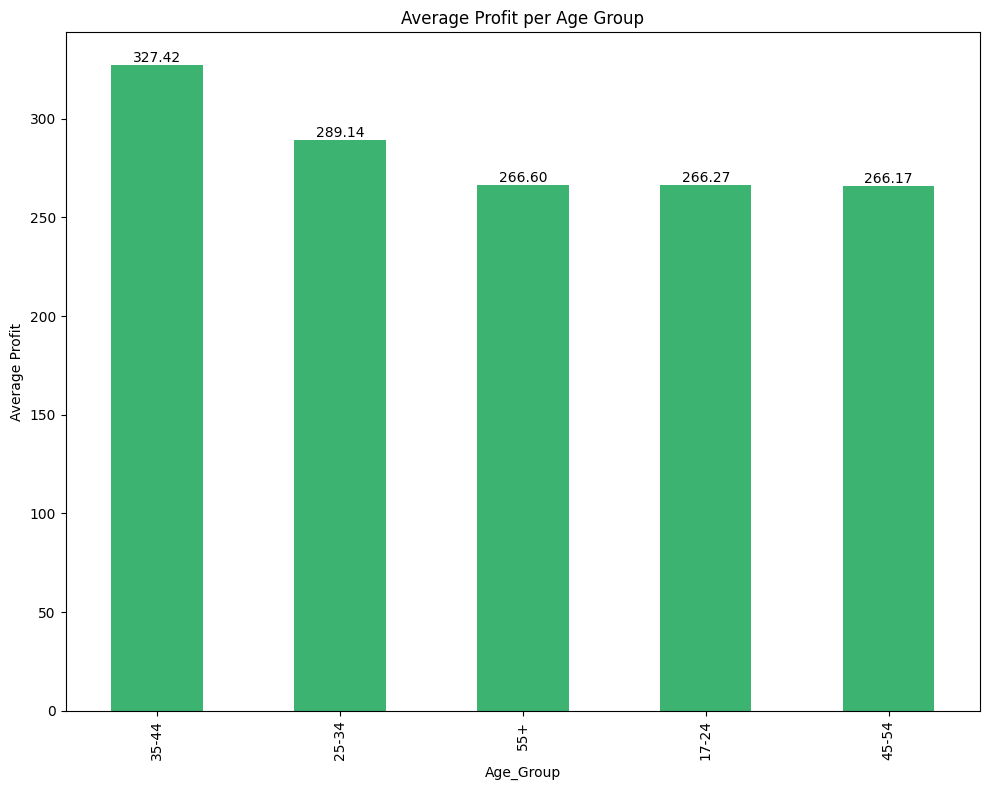

In [30]:
# Average Profit by Age Group
plt.figure(figsize=(10, 8))

profit_by_age = sales.groupby('Age_Group')['Profit'].mean().sort_values(ascending=False)

ax = profit_by_age.plot(kind='bar', title='Average Profit per Age Group', color='mediumseagreen')

# Add profit values above each bar

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

plt.ylabel('Average Profit')
plt.tight_layout()
plt.show()

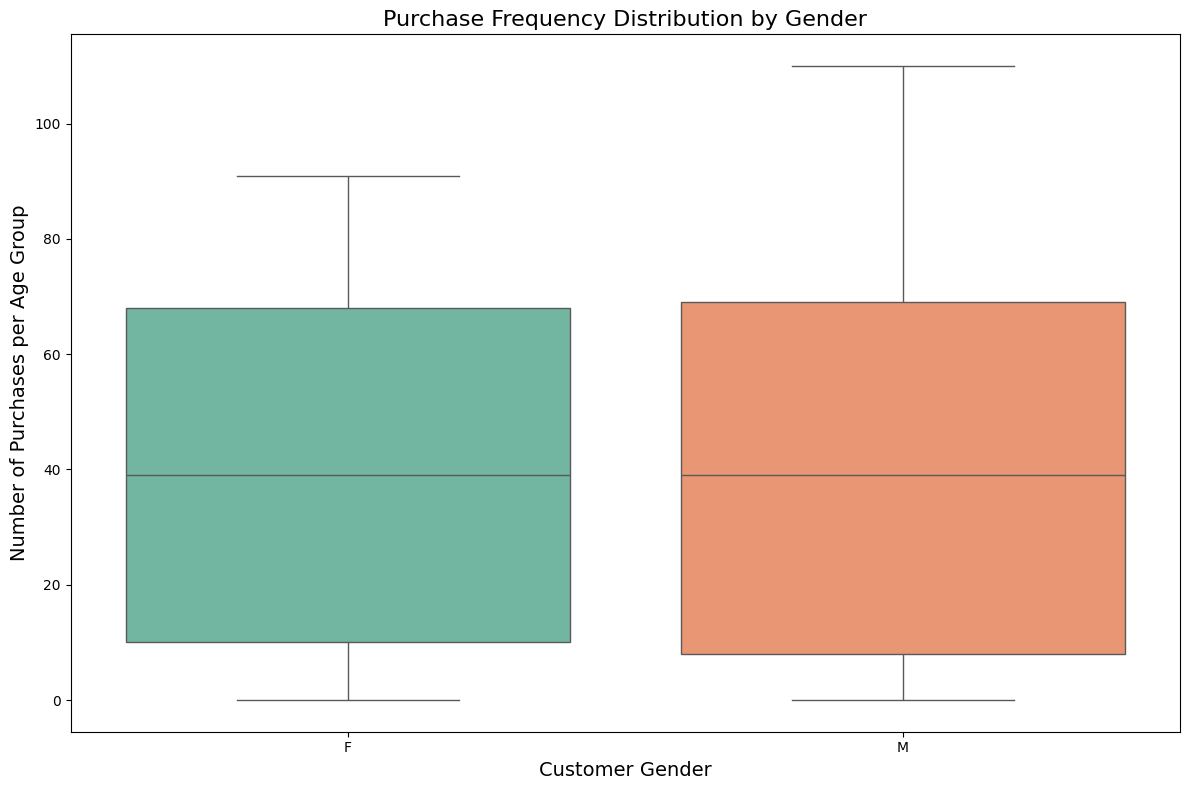

In [31]:
# Purchase Frequency by Gender

plt.figure(figsize=(12, 8))

# Calculate the number of purchases for each Customer Age and Gender group
purchase_freq = sales.groupby(['Customer_Age', 'Customer_Gender']).size().reset_index(name='Purchase_Count')

# Plot boxplot to show distribution of purchase counts by gender with a pleasant color palette
sns.boxplot(data=purchase_freq, x='Customer_Gender', y='Purchase_Count', palette='Set2')

plt.title('Purchase Frequency Distribution by Gender', fontsize=16)
plt.xlabel('Customer Gender', fontsize=14)
plt.ylabel('Number of Purchases per Age Group', fontsize=14)
plt.tight_layout()
plt.show()

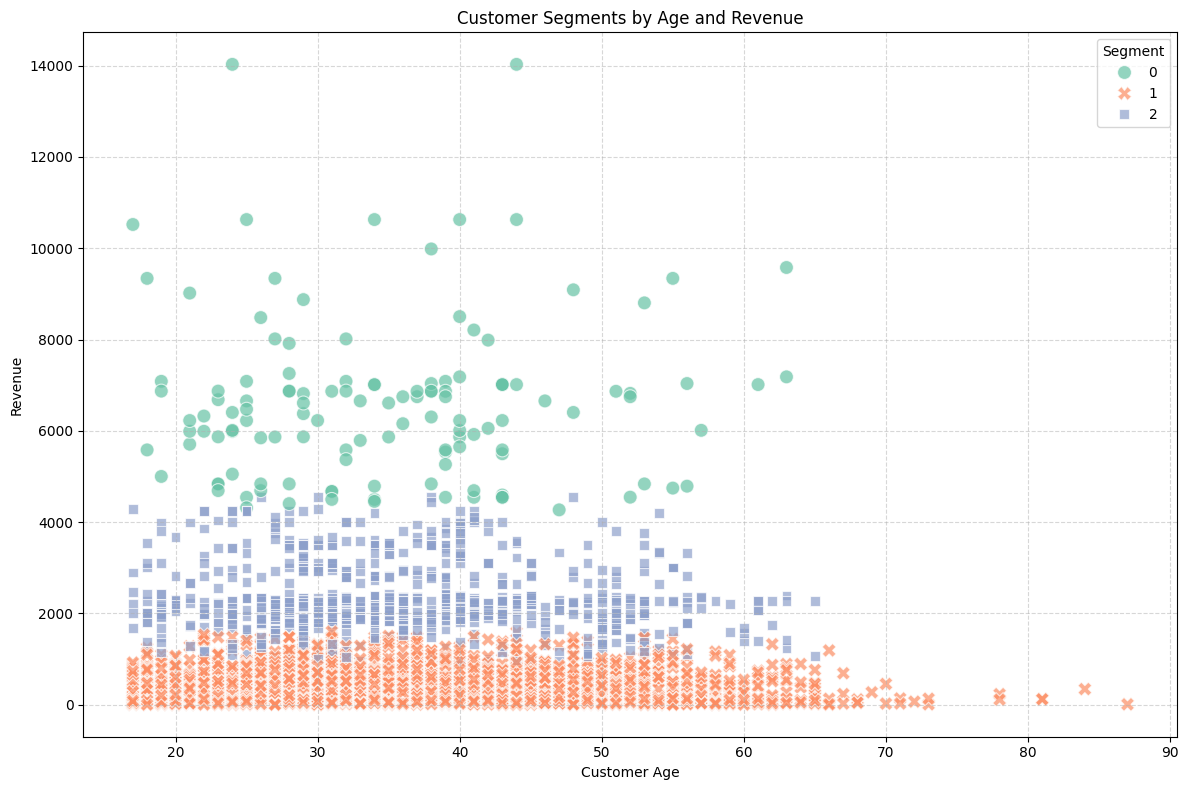

In [32]:
# Customer Segmentation using K-Means clustering based on Customer Age, Revenue, and Profit
# Visualizing Customer Segments by Age and Revenue (Profit used in clustering but not shown here)

plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=sales.dropna(subset=['Customer_Segment']),
    x='Customer_Age',
    y='Revenue',
    hue='Customer_Segment',
    palette='Set2',
    style='Customer_Segment',
    s=100,
    alpha=0.7
)
plt.title('Customer Segments by Age and Revenue')
plt.xlabel('Customer Age')
plt.ylabel('Revenue')
plt.legend(title='Segment')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

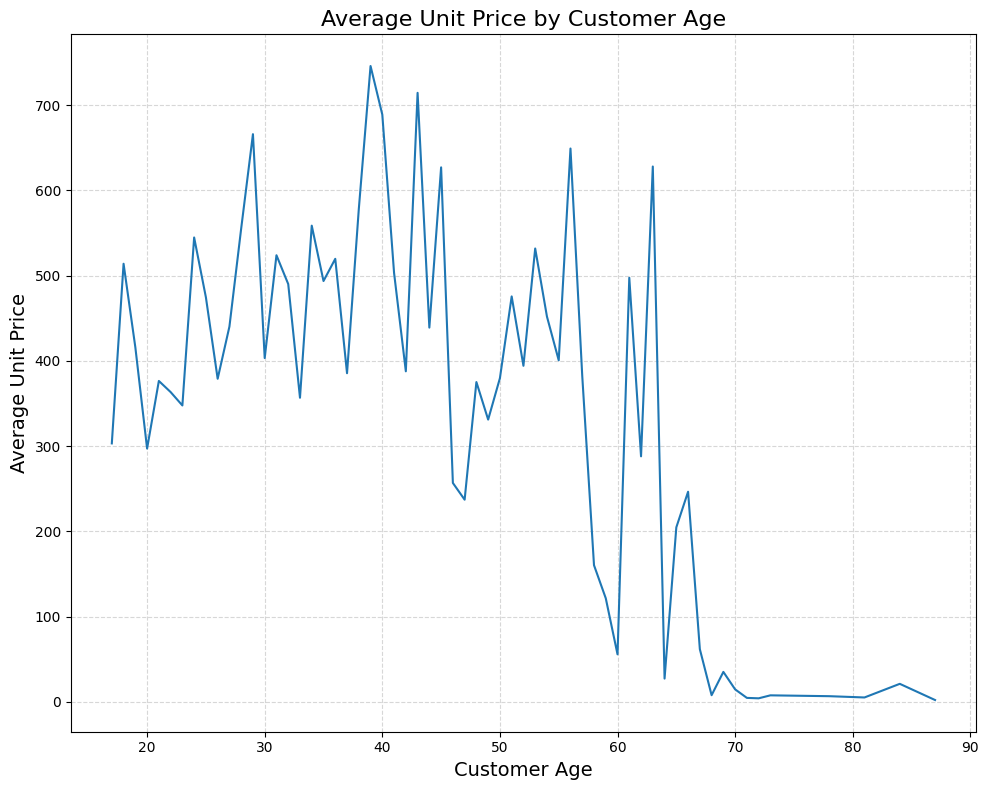

In [33]:
# Average Unit Price by Customer Age

plt.figure(figsize=(10, 8))
age_price = sales.groupby('Customer_Age')['Unit_Price'].mean().reset_index()
sns.lineplot(data=age_price, x='Customer_Age', y='Unit_Price')
plt.title('Average Unit Price by Customer Age', fontsize=16)
plt.xlabel('Customer Age', fontsize=14)
plt.ylabel('Average Unit Price', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

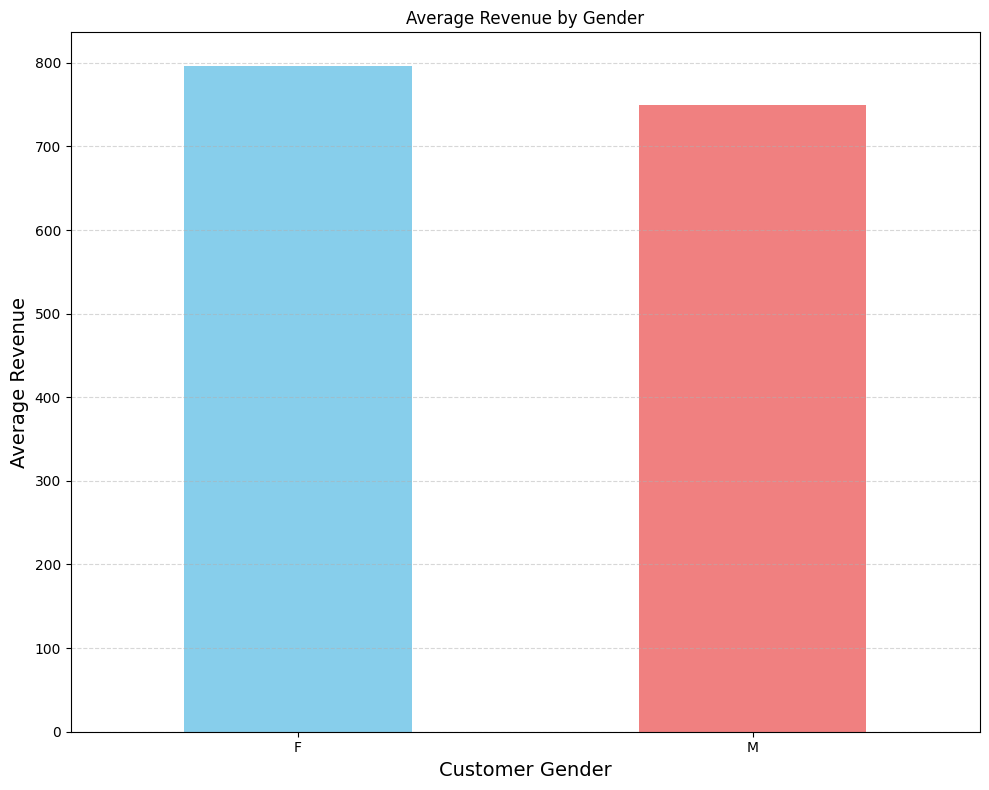

In [34]:
# Average Revenue by Gender

plt.figure(figsize=(10, 8))
gender_rev = sales.groupby('Customer_Gender')['Revenue'].mean()
gender_rev.plot(kind='bar', color=['skyblue', 'lightcoral'], title='Average Revenue by Gender')
plt.ylabel('Average Revenue', fontsize=14)
plt.xlabel('Customer Gender', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

  Age_Group                Product  Order_Quantity
0     17-24    Patch Kit/8 Patches            1466
1     25-34  Water Bottle - 30 oz.            2857
2     35-44  Water Bottle - 30 oz.            2172
3     45-54  Water Bottle - 30 oz.            1212
4       55+    Patch Kit/8 Patches             559


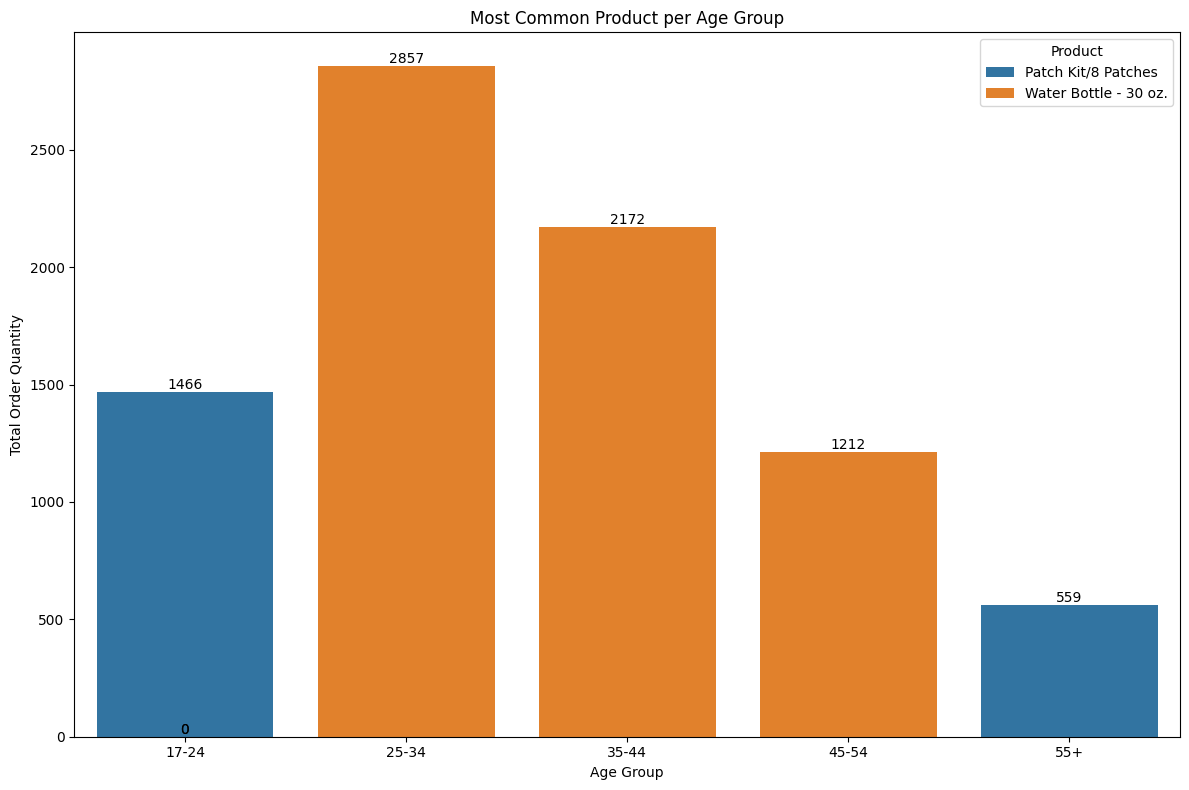

In [35]:
# Find and plot the single most common product per Age Group based on total order quantity

most_common_product = sales.groupby(['Age_Group', 'Product'], observed=False)['Order_Quantity'].sum().reset_index()
most_common_product = most_common_product.sort_values(['Age_Group', 'Order_Quantity'], ascending=[True, False])
top_products_per_group = most_common_product.groupby('Age_Group').first().reset_index()

print(top_products_per_group)

plt.figure(figsize=(12, 8))
ax = sns.barplot(data=top_products_per_group, x='Age_Group', y='Order_Quantity', hue='Product')
plt.title('Most Common Product per Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Order Quantity')

# Add value labels on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()

    Age_Group                Product  Order_Quantity
52      17-24    Patch Kit/8 Patches            1466
126     17-24  Water Bottle - 30 oz.             849
103     17-24      Touring Tire Tube             767
256     25-34  Water Bottle - 30 oz.            2857
182     25-34    Patch Kit/8 Patches            1881
153     25-34     Mountain Tire Tube            1698
386     35-44  Water Bottle - 30 oz.            2172
312     35-44    Patch Kit/8 Patches            1547
283     35-44     Mountain Tire Tube            1242
516     45-54  Water Bottle - 30 oz.            1212
442     45-54    Patch Kit/8 Patches            1095
413     45-54     Mountain Tire Tube             632
572       55+    Patch Kit/8 Patches             559
543       55+     Mountain Tire Tube             308
646       55+  Water Bottle - 30 oz.             304


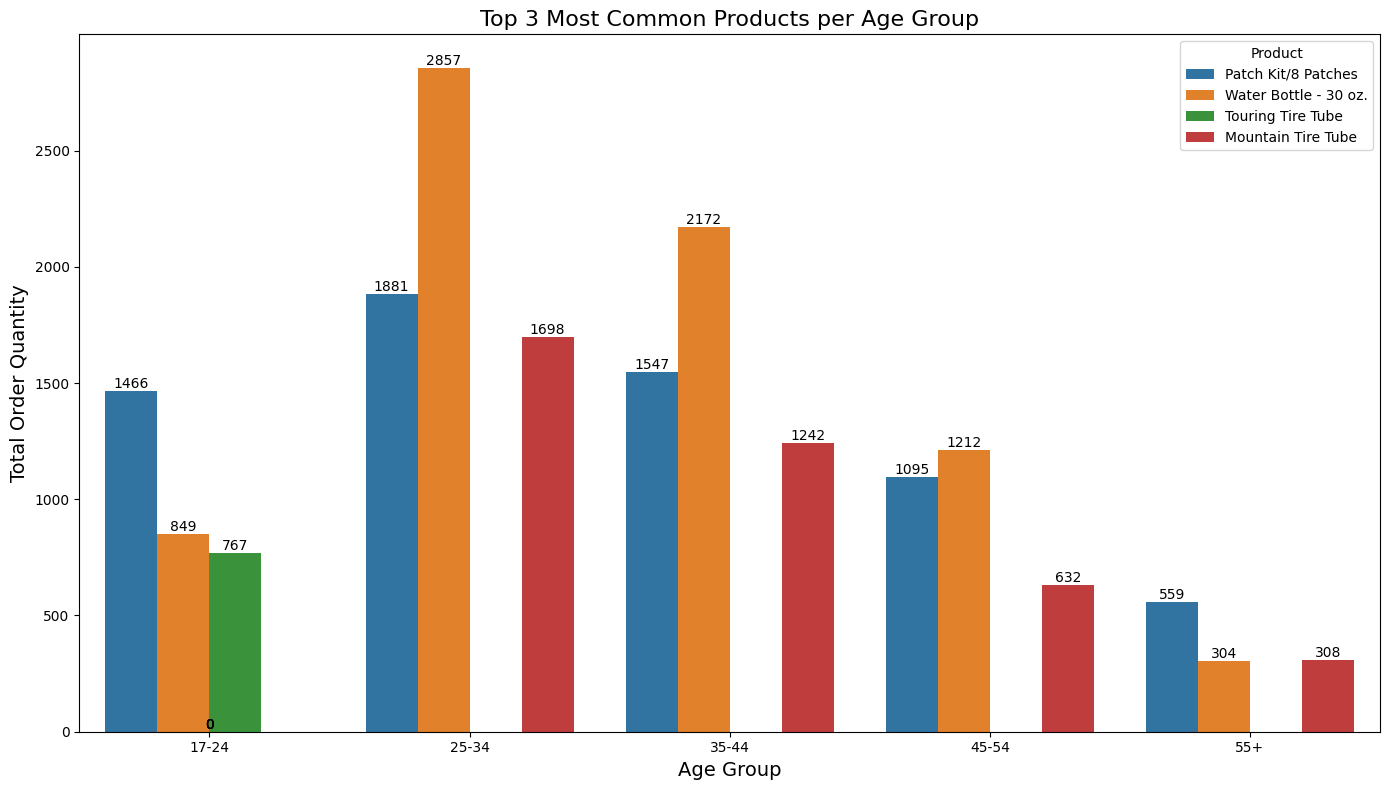

In [36]:
# Find and plot the top 3 most common products per Age Group based on total order quantity

most_common_product = sales.groupby(['Age_Group', 'Product'], observed=False)['Order_Quantity'].sum().reset_index()
most_common_product = most_common_product.sort_values(['Age_Group', 'Order_Quantity'], ascending=[True, False])

top_n_products = most_common_product.groupby('Age_Group').head(3)

print(top_n_products)

plt.figure(figsize=(14, 8))
ax = sns.barplot(data=top_n_products, x='Age_Group', y='Order_Quantity', hue='Product')

plt.title('Top 3 Most Common Products per Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Total Order Quantity', fontsize=14)

# Add value labels on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()

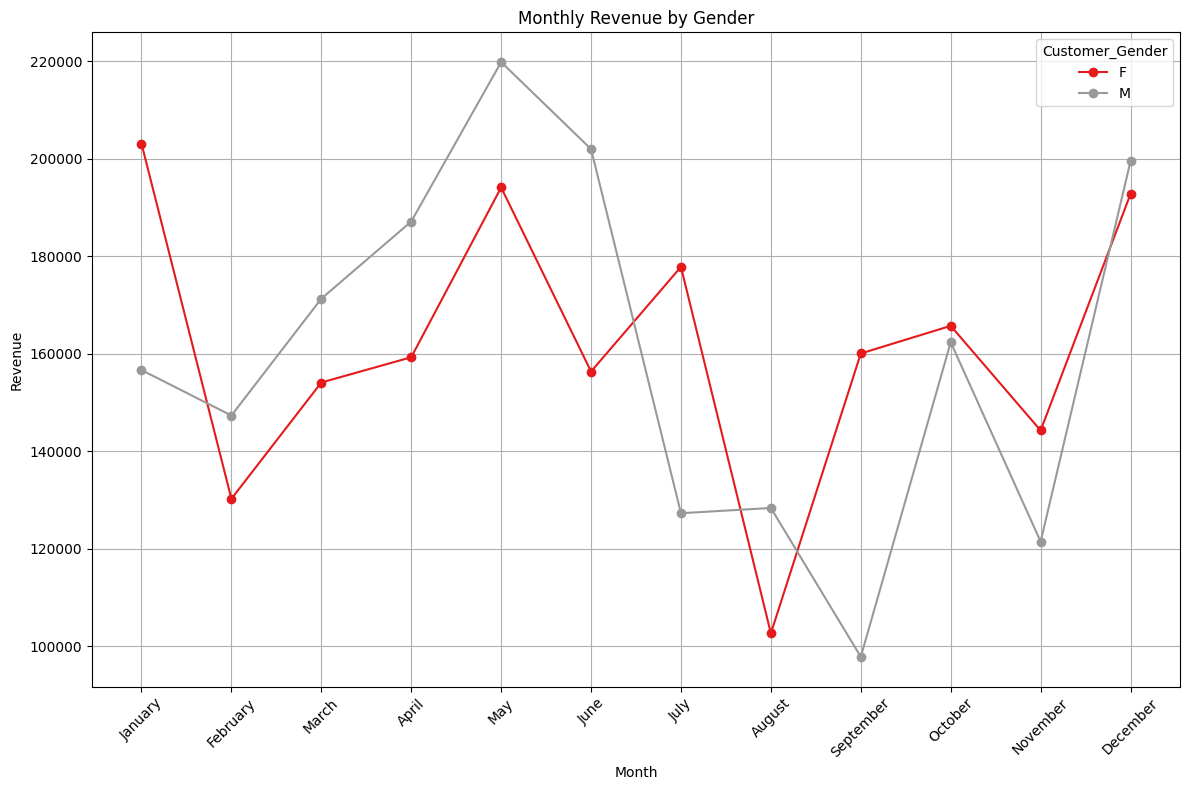

In [37]:
# Plot Monthly Revenue Trends by Customer Gender
import calendar

# Aggregate monthly revenue by gender
monthly_gender_sales = sales.groupby(['Month', 'Customer_Gender'], observed=False)['Revenue'].sum().unstack()

# Plot line chart
ax = monthly_gender_sales.plot(kind='line', figsize=(12, 8), title='Monthly Revenue by Gender', marker='o', colormap='Set1')

ax.set_xlabel('Month')
ax.set_ylabel('Revenue')
ax.grid(True)

# Improve x-axis by showing month names instead of numbers
months = range(1, 13)
month_names = [calendar.month_name[m] for m in months]
ax.set_xticks(months)
ax.set_xticklabels(month_names, rotation=45)

plt.tight_layout()
plt.show()

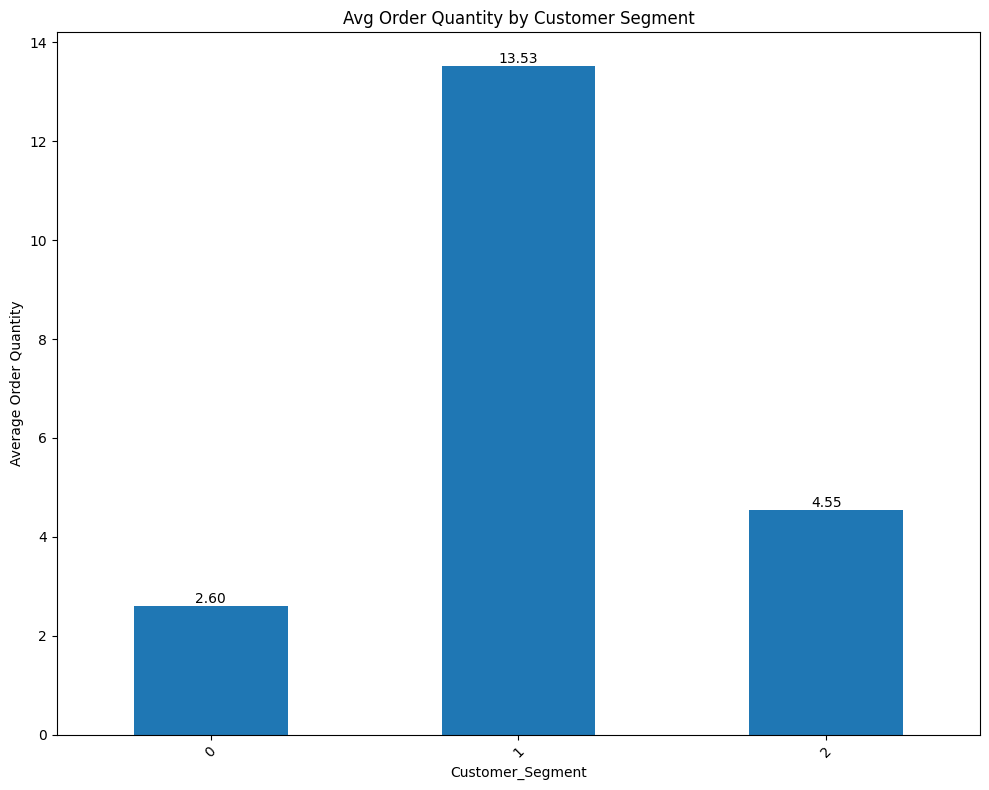

In [38]:
# Average Order Quantity per Customer Segment

plt.figure(figsize=(10, 8))
avg_order_qty = sales.groupby('Customer_Segment')['Order_Quantity'].mean()
ax = avg_order_qty.plot(kind='bar', title='Avg Order Quantity by Customer Segment')
plt.ylabel('Average Order Quantity')
plt.xticks(rotation=45)

# Add value labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

### Order Analysis
This section focuses on analyzing order quantities, distribution across Countries, and variations in ordering patterns among different customer segments and product categories. The insights help identify trends and opportunities to optimize inventory management and sales strategies.

Mean Order Quantity: 11.822164432886577


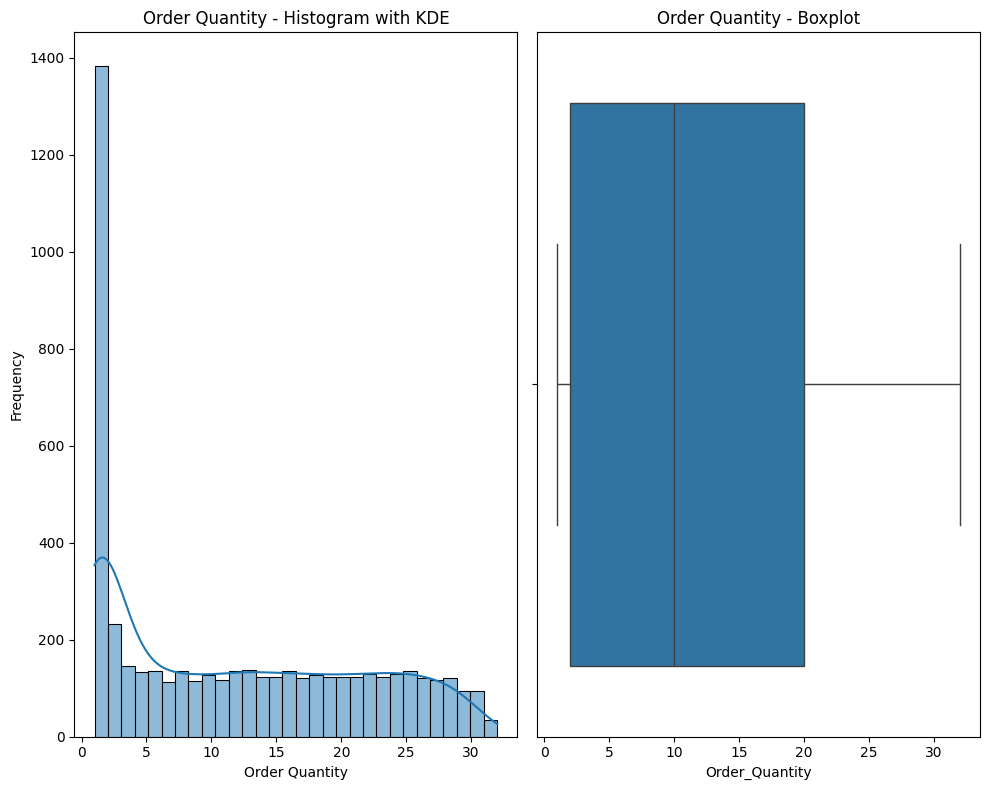

In [39]:
# What's the mean of Order Quantity?# Calculate and print the mean of Order Quantity

mean_order_qty = sales['Order_Quantity'].mean()
print("Mean Order Quantity:", mean_order_qty)

# Create subplots: Histogram with KDE and Boxplot side by side
fig, axs = plt.subplots(1, 2, figsize=(10, 8))

# Plot histogram with KDE to show distribution of order quantities
sns.histplot(data=sales, x='Order_Quantity', bins=30, kde=True, ax=axs[0])
axs[0].set_title("Order Quantity - Histogram with KDE")
axs[0].set_xlabel("Order Quantity")
axs[0].set_ylabel("Frequency")

# Plot boxplot to visualize order quantity distribution and detect outliers
sns.boxplot(x=sales['Order_Quantity'], ax=axs[1])
axs[1].set_title("Order Quantity - Boxplot")

plt.tight_layout()
plt.show()

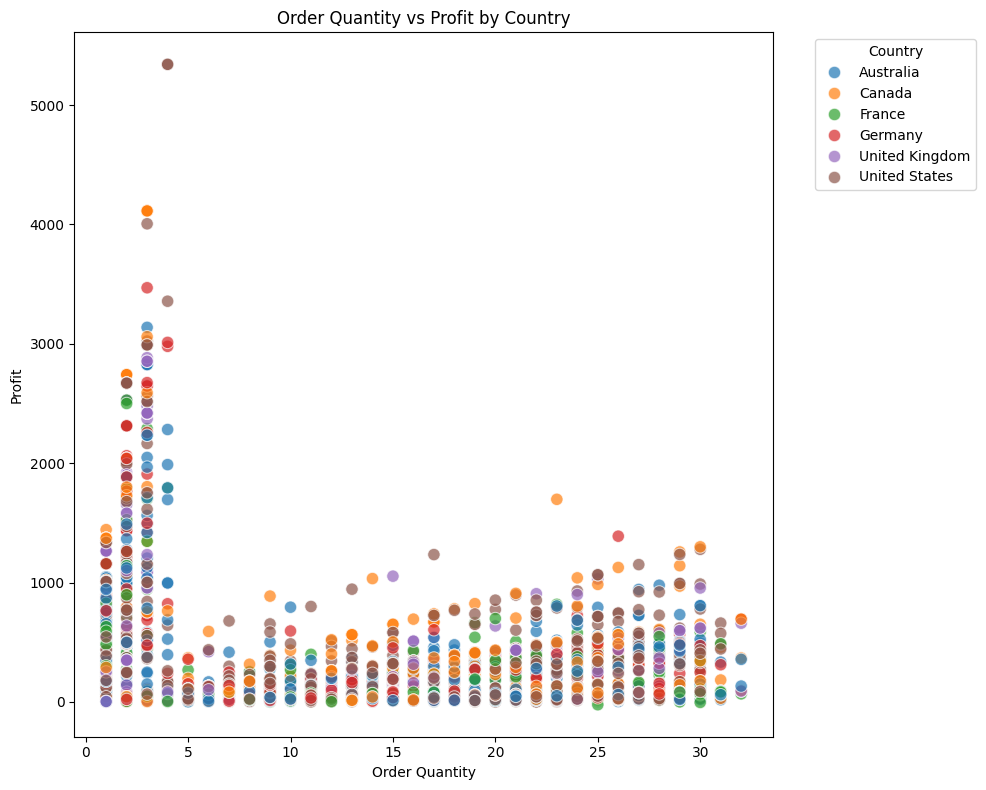

In [40]:
# Scatter plot showing relationship between Order Quantity and Profit, grouped by Country

plt.figure(figsize=(10, 8))

sns.scatterplot(
    x='Order_Quantity',
    y='Profit',
    hue='Country',           # Color points based on Country
    data=sales,
    palette='tab10',         # Use distinct color palette for up to 10 countries
    alpha=0.7,               # Set transparency to reduce point overlap
    edgecolor='w',           # Add white edge to points for better contrast
    s=80                     # Set size of each point
)

plt.title('Order Quantity vs Profit by Country')
plt.xlabel('Order Quantity')
plt.ylabel('Profit')

# Place legend outside plot to avoid overlapping with points
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [41]:
# Count of orders made in Canada or France

target_countries = ['Canada', 'France']
count_canada_france = sales[sales['Country'].isin(target_countries)].shape[0]
print(f"Number of orders from {', '.join(target_countries)}: {count_canada_france}")

Number of orders from Canada, France: 1146


In [42]:
# Number of Bike Racks orders from Canada

country = 'Canada'
subcategory = 'Bike Racks'
bike_racks_canada = sales[(sales['Country'] == country) & (sales['Sub_Category'] == subcategory)].shape[0]
print(f"Number of '{subcategory}' orders from {country}: {bike_racks_canada}")

Number of 'Bike Racks' orders from Canada: 3


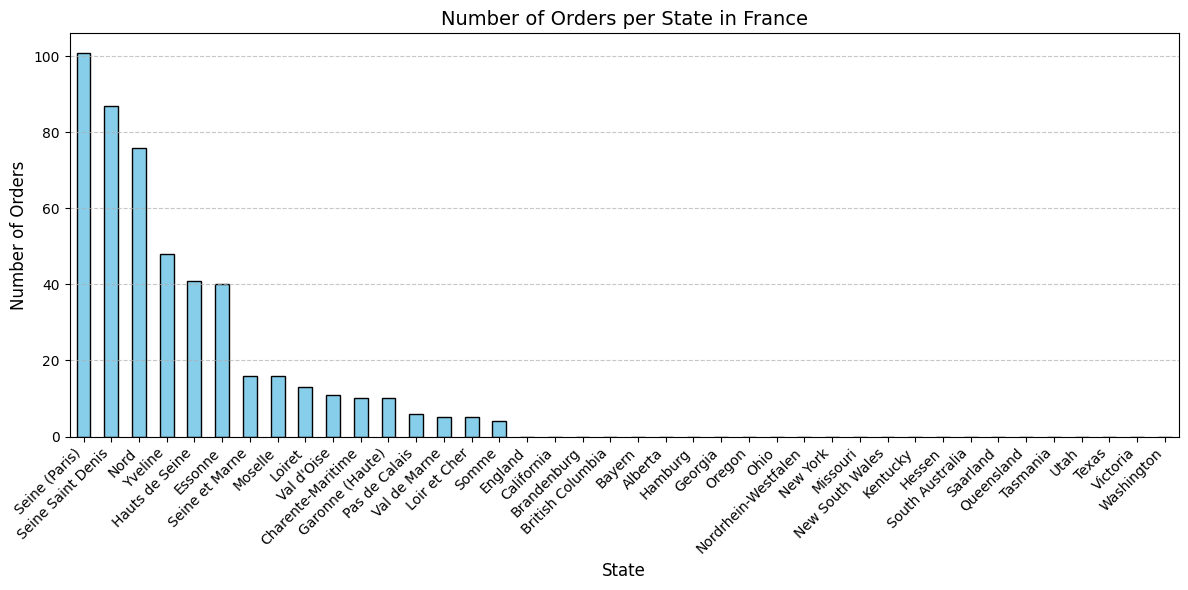

In [43]:
# Visualizing the number of orders placed in each state within France

# Filter and count the number of orders per state in France
france_states = sales[sales['Country'] == 'France']['State'].value_counts().sort_values(ascending=False)

# Set up the plot size
plt.figure(figsize=(12, 6))

# Create the bar plot
france_states.plot(
    kind='bar',
    color='skyblue',
    edgecolor='black'
)

# Customize the plot
plt.title('Number of Orders per State in France', fontsize=14)
plt.xlabel('State', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Display the plot
plt.show()

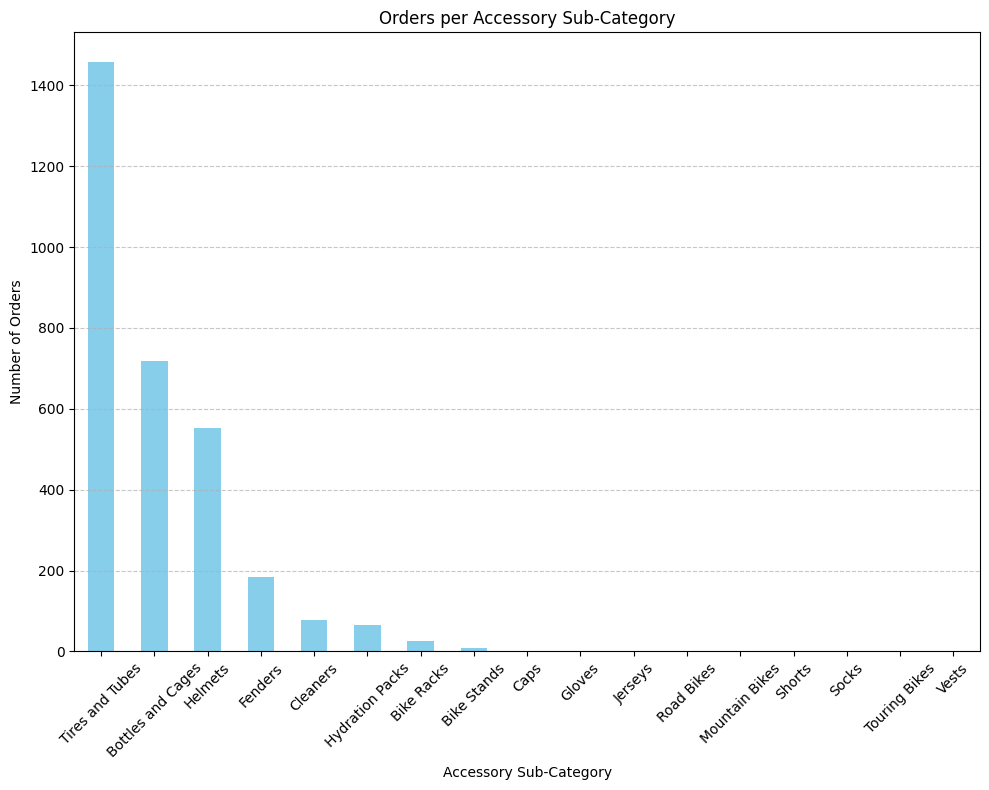

In [44]:
# Visualizing the number of orders for each sub-category within the 'Accessories' product category

# Filter sales data for 'Accessories' category and count orders per sub-category
accessory_sales = sales[sales['Product_Category'] == 'Accessories']['Sub_Category'].value_counts()

# Plotting
plt.figure(figsize=(10, 8))
accessory_sales.plot(kind='bar', color='skyblue')  # Add a color for visual appeal
plt.title('Orders per Accessory Sub-Category')
plt.xlabel('Accessory Sub-Category')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal gridlines
plt.tight_layout()
plt.show()

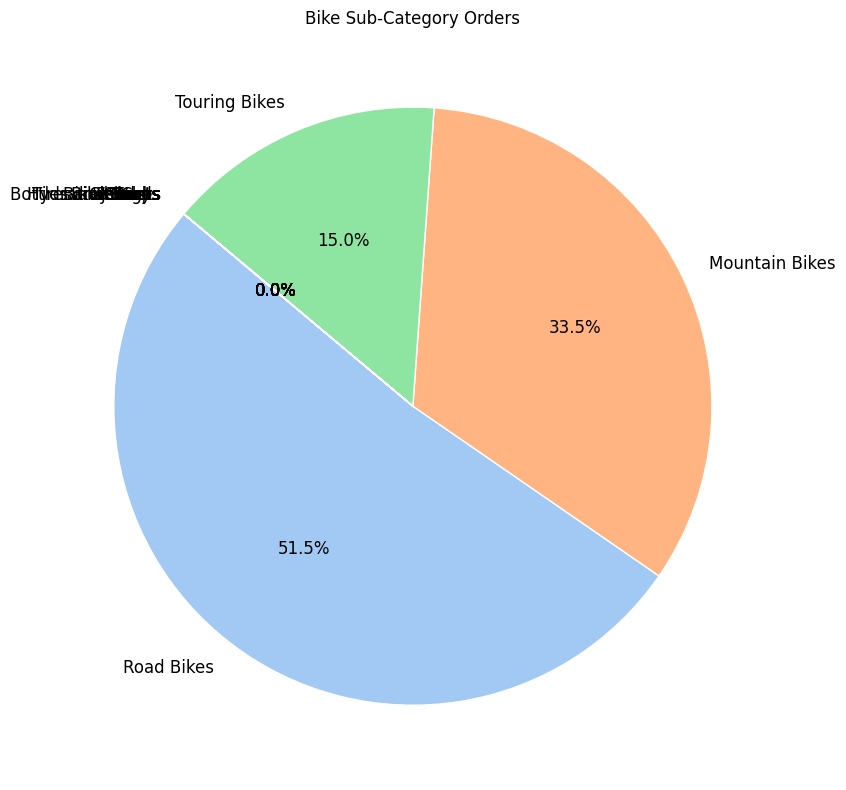

In [45]:
# Count of Bike Sub-Category Orders

bike_sales = sales[sales['Product_Category'] == 'Bikes']['Sub_Category'].value_counts()

# Plot using matplotlib directly
plt.figure(figsize=(10, 8))
plt.pie(
    bike_sales.values,
    labels=bike_sales.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('pastel'),
    wedgeprops={'edgecolor': 'white'},
    textprops={'fontsize': 12}
)
plt.title('Bike Sub-Category Orders')
plt.tight_layout()
plt.show()

In [46]:
# Mean Order Quantity for orders with revenue > 10K

high_revenue_orders = sales[sales['Revenue'] > 10000]['Order_Quantity'].dropna()
mean_high_revenue_orders = high_revenue_orders.mean()
print(f"Mean Order Quantity for orders with revenue > 10K: {mean_high_revenue_orders:.2f}")

Mean Order Quantity for orders with revenue > 10K: 3.29


In [47]:
# Mean Order Quantity for orders with revenue < 10K

low_revenue_orders = sales[sales['Revenue'] < 10000]['Order_Quantity'].dropna()
mean_low_revenue_orders = low_revenue_orders.mean()
print(f"Mean Order Quantity for orders with revenue < 10K: {mean_low_revenue_orders:.2f}")

Mean Order Quantity for orders with revenue < 10K: 11.83


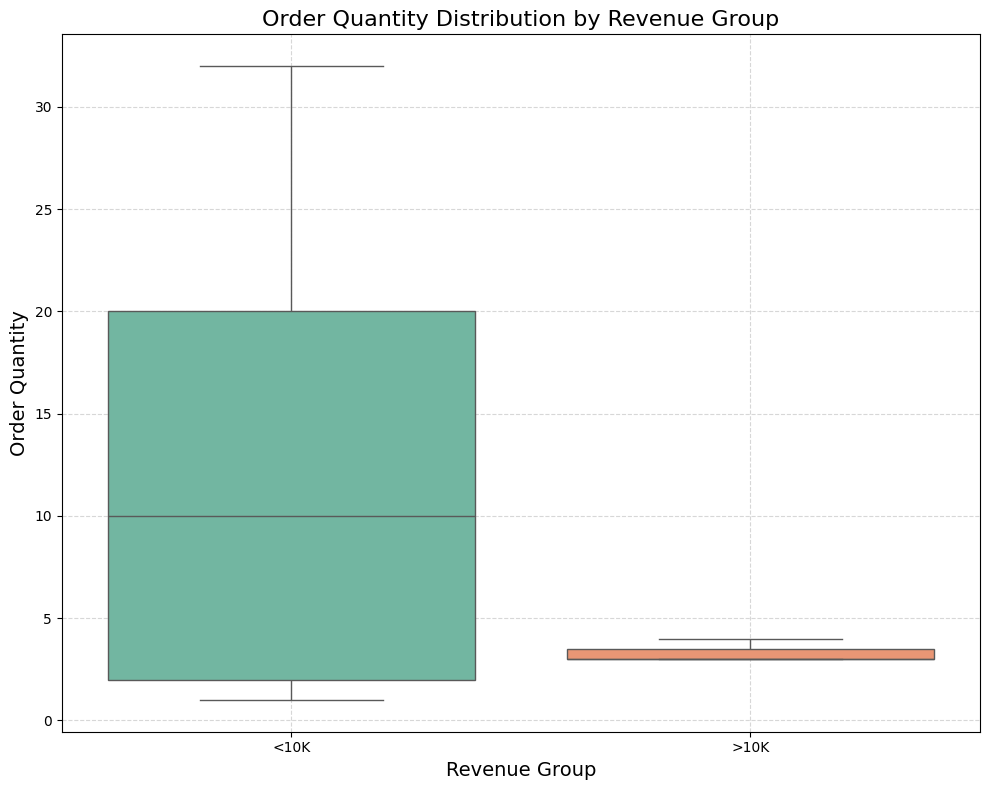

In [48]:
# Distribution of Order Quantity for Revenue Groups (>10K vs <10K)

if 'Revenue_Group' not in sales.columns:
    sales['Revenue_Group'] = np.where(sales['Revenue'] > 10000, '>10K', '<10K')

plt.figure(figsize=(10, 8))
sns.boxplot(x='Revenue_Group', y='Order_Quantity', data=sales, palette='Set2')
plt.title('Order Quantity Distribution by Revenue Group', fontsize=16)
plt.xlabel('Revenue Group', fontsize=14)
plt.ylabel('Order Quantity', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [49]:
# Count orders made in May 2016

may_2016_orders = sales[(sales['Date'].dt.year == 2016) & (sales['Date'].dt.month == 5)].shape[0]
print("Number of orders made in May 2016:", may_2016_orders)

Number of orders made in May 2016: 214


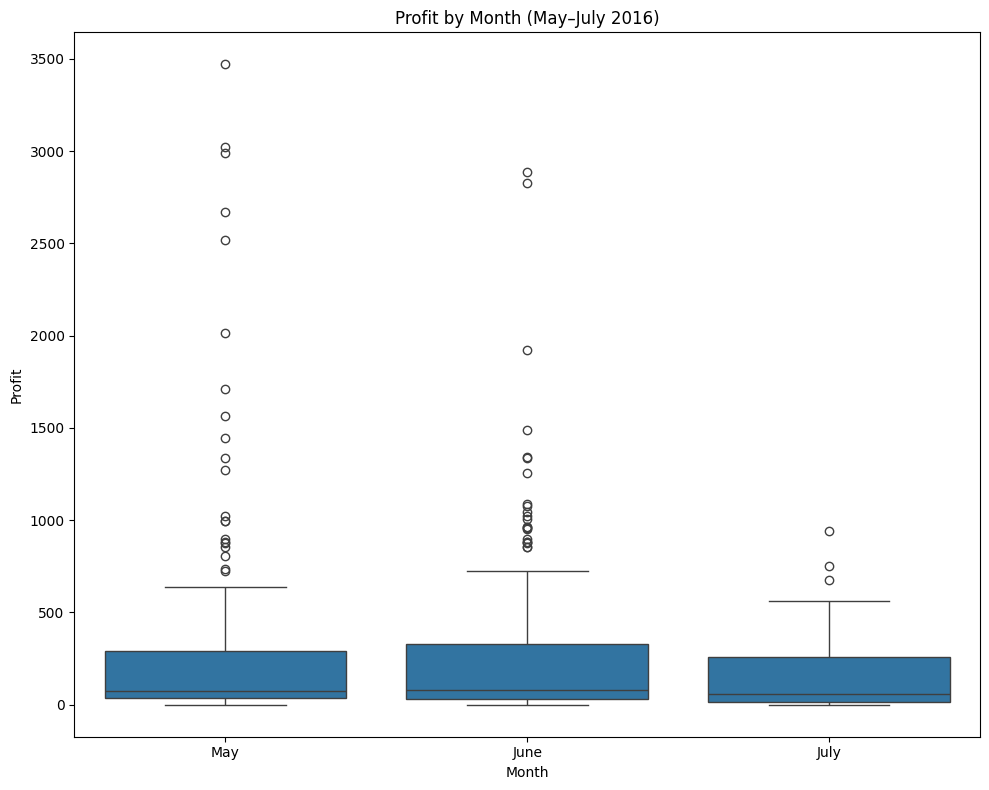

In [50]:
# Orders made between May and July 2016

# Filter data between May and July 2016
mask = (sales['Date'] >= '2016-05-01') & (sales['Date'] <= '2016-07-31')
filtered_sales = sales[mask].copy()

# Define correct month order
month_order = ['May', 'June', 'July']
filtered_sales['Month_Name'] = pd.Categorical(filtered_sales['Month_Name'], categories=month_order, ordered=True)

# Boxplot
plt.figure(figsize=(10, 8))
sns.boxplot(x='Month_Name', y='Profit', data=filtered_sales)
plt.title('Profit by Month (May–July 2016)')
plt.xlabel('Month')
plt.ylabel('Profit')
plt.tight_layout()
plt.show()

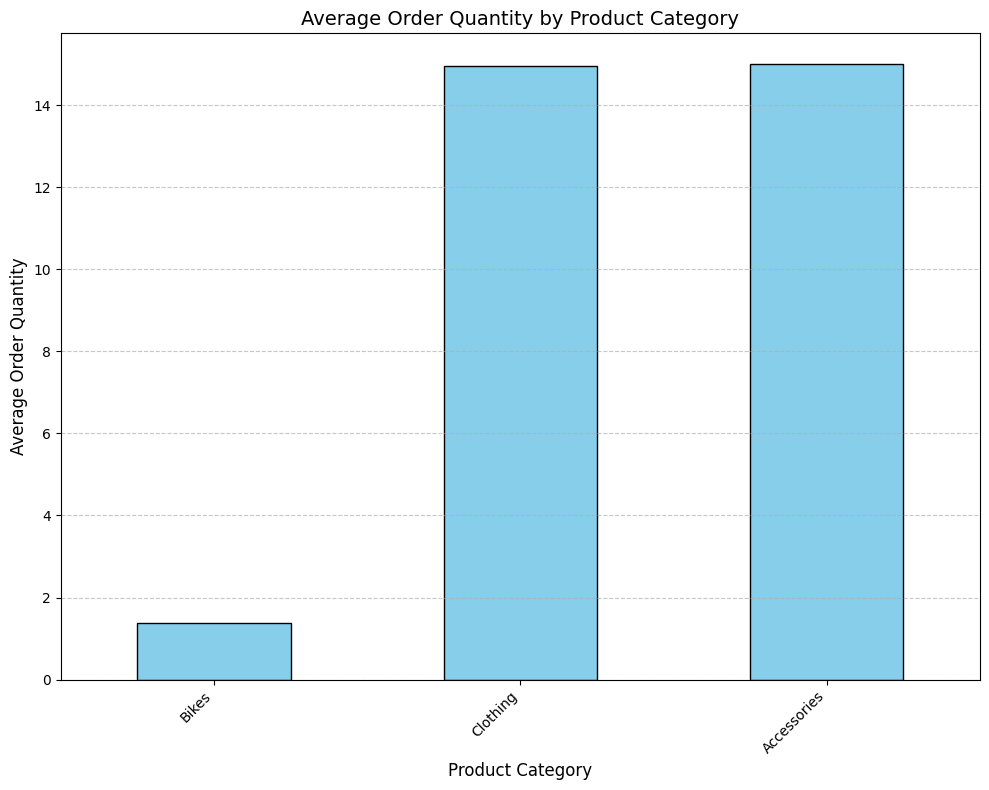

In [51]:
# Average Order Quantity per Product Category (sorted)
# Group and sort data
avg_order_qty = sales.groupby('Product_Category')['Order_Quantity'].mean().sort_values()

# Plot
plt.figure(figsize=(10, 8))
avg_order_qty.plot(
    kind='bar',
    color='skyblue',
    edgecolor='black'
)
plt.title('Average Order Quantity by Product Category', fontsize=14)
plt.ylabel('Average Order Quantity', fontsize=12)
plt.xlabel('Product Category', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

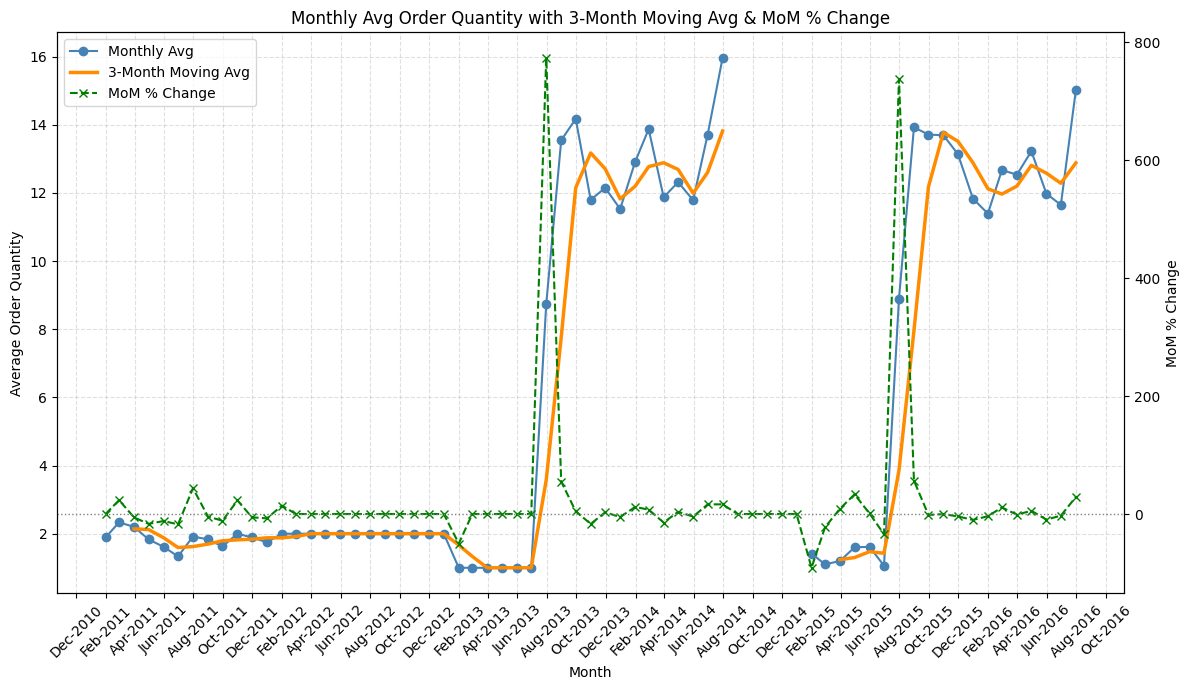

In [52]:
# Monthly Trend of Average Order Quantity

# Set 'Date' as index for time-based resampling
sales.set_index('Date', inplace=True)

# Calculate monthly average order quantity
monthly_qty = sales['Order_Quantity'].resample('M').mean()

# Calculate 3-month moving average
moving_avg = monthly_qty.rolling(window=3).mean()

# Calculate Month-over-Month percentage change
monthly_change = monthly_qty.pct_change().fillna(0) * 100  # Fill NaN with 0 to keep timeline consistent

# Start plotting
fig, ax1 = plt.subplots(figsize=(12, 7))  # Slightly wider figure

# Primary Y-axis: Monthly average and moving average
ax1.plot(monthly_qty.index, monthly_qty.values, label='Monthly Avg', marker='o', linestyle='-', color='steelblue')
ax1.plot(moving_avg.index, moving_avg.values, label='3-Month Moving Avg', color='darkorange', linewidth=2.5)

# Axis labels and formatting
ax1.set_ylabel('Average Order Quantity')
ax1.set_xlabel('Month')
ax1.set_title('Monthly Avg Order Quantity with 3-Month Moving Avg & MoM % Change')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True, linestyle='--', alpha=0.4)

# Secondary Y-axis: Month-over-Month percentage change
ax2 = ax1.twinx()
ax2.plot(monthly_change.index, monthly_change.values, label='MoM % Change', color='green', linestyle='--', marker='x')
ax2.set_ylabel('MoM % Change')
ax2.axhline(0, color='gray', linewidth=1, linestyle=':')  # Reference zero line
ax2.grid(False)

# Improve x-axis date formatting
import matplotlib.dates as mdates
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=2))  # Less crowded x-axis

# Combine legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.tight_layout()
plt.show()

# Restore original DataFrame index (optional)
sales.reset_index(inplace=True)

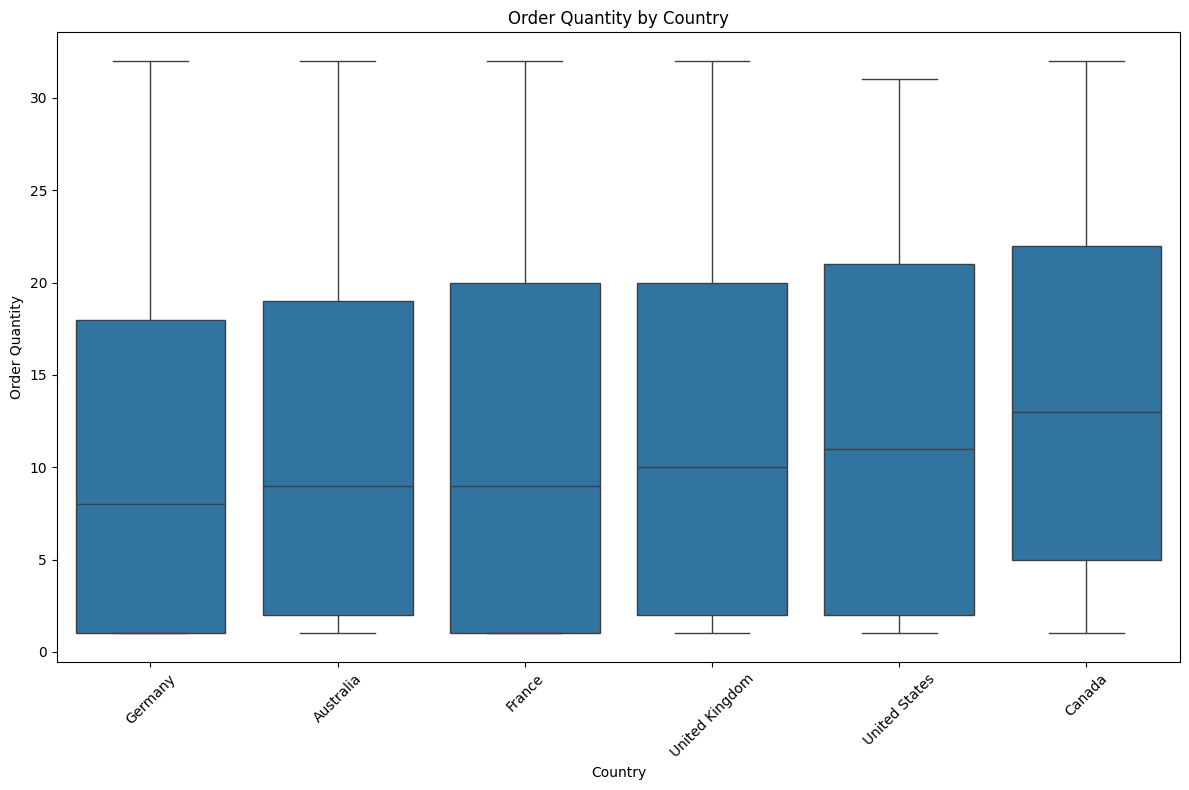

In [53]:
# Boxplot of Order Quantity by Country (Sorted by Median)

plt.figure(figsize=(12, 8))

# Sort countries by median order quantity to make plot easier to read
ordered_countries = sales.groupby('Country')['Order_Quantity'].median().sort_values().index

# Create boxplot with ordered countries
sns.boxplot(x='Country', y='Order_Quantity', data=sales, order=ordered_countries)

plt.title('Order Quantity by Country')
plt.xlabel('Country')
plt.ylabel('Order Quantity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

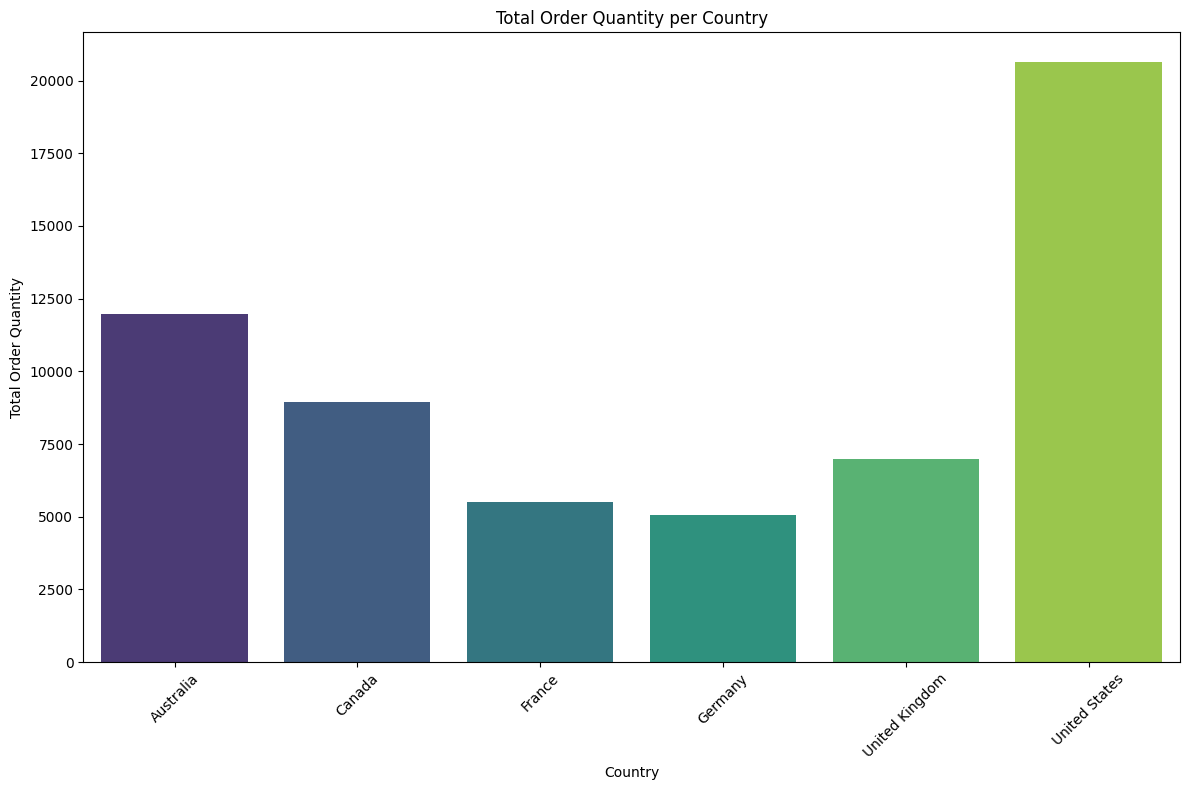

In [54]:
# Top Countries by Sales Quantity
country_sales = sales.groupby('Country')['Order_Quantity'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=country_sales.index, y=country_sales.values, palette='viridis')

plt.title('Total Order Quantity per Country')
plt.xlabel('Country')
plt.ylabel('Total Order Quantity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

List of unique products sold:
['Fender Set - Mountain' 'Classic Vest, L' 'Touring-1000 Yellow, 54'
 'LL Road Tire' 'Mountain Tire Tube' 'Road Bottle Cage'
 'Patch Kit/8 Patches' 'Road-150 Red, 62' 'Road Tire Tube'
 'Road-650 Black, 62' 'Mountain-100 Silver, 48' 'Hydration Pack - 70 oz.'
 'Water Bottle - 30 oz.' 'Road-550-W Yellow, 42' 'Road-150 Red, 56'
 'Road-250 Black, 44' 'Mountain-200 Black, 46' 'Road-250 Black, 52'
 'Sport-100 Helmet, Black' 'Mountain-200 Silver, 38' 'Road-750 Black, 44'
 'Long-Sleeve Logo Jersey, S' 'ML Mountain Tire' 'Mountain-200 Black, 38'
 'Sport-100 Helmet, Blue' 'Long-Sleeve Logo Jersey, M' 'Road-150 Red, 48'
 'Long-Sleeve Logo Jersey, XL' 'Sport-100 Helmet, Red'
 "Women's Mountain Shorts, M" 'Touring Tire Tube' 'HL Mountain Tire'
 'Bike Wash - Dissolver' 'Road-250 Red, 44' 'AWC Logo Cap'
 'Mountain-200 Silver, 42' 'Mountain Bottle Cage'
 'Short-Sleeve Classic Jersey, XL' 'Touring Tire' 'Road-550-W Yellow, 44'
 'HL Road Tire' 'Road-750 Black, 52' 'Road-550-

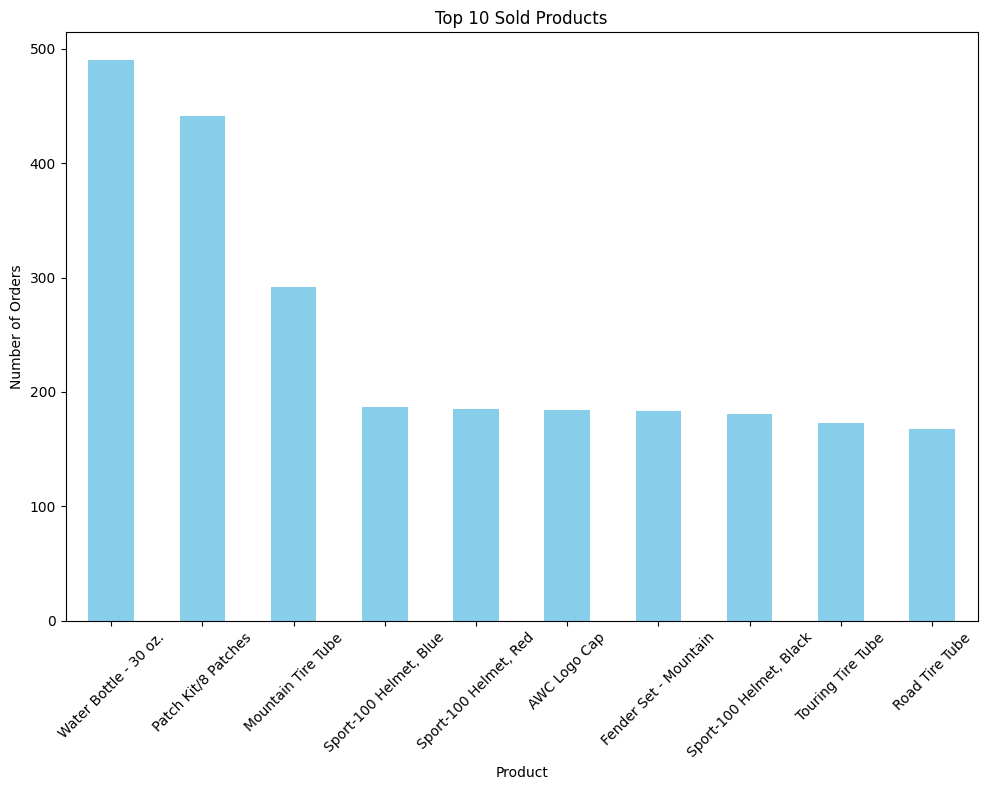

List of unique sub-categories sold:
['Fenders', 'Vests', 'Touring Bikes', 'Tires and Tubes', 'Bottles and Cages', ..., 'Caps', 'Gloves', 'Socks', 'Bike Racks', 'Bike Stands']
Length: 17
Categories (17, object): ['Bike Racks', 'Bike Stands', 'Bottles and Cages', 'Caps', ..., 'Socks',
                          'Tires and Tubes', 'Touring Bikes', 'Vests']

Total unique sub-categories sold: 17



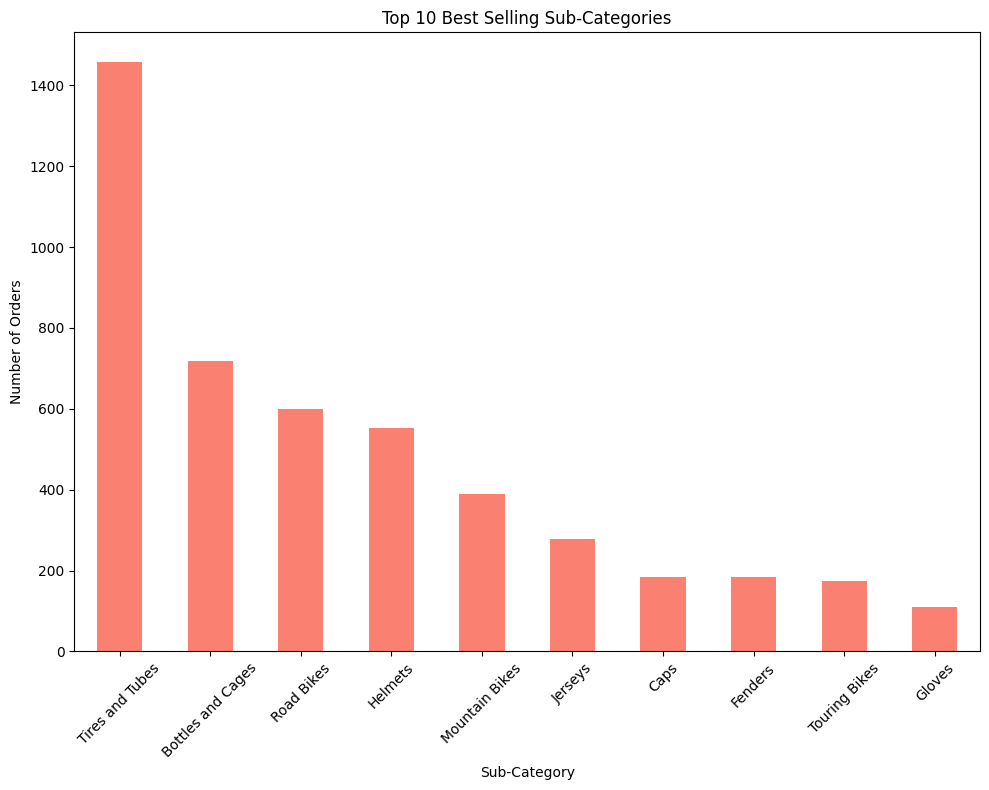

In [55]:
# List and plot unique Products and Sub-Categories sold

# Unique Products
unique_products = sales['Product'].unique()
print("List of unique products sold:")
print(unique_products)
print(f"\nTotal unique products sold: {len(unique_products)}\n")

# Top 10 Sold Products
product_sales = sales['Product'].value_counts().head(10)
product_sales.plot(kind='bar', figsize=(10,8), color='skyblue', title='Top 10 Sold Products')
plt.xlabel('Product')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Unique Sub-Categories
unique_subcat = sales['Sub_Category'].unique()
print("List of unique sub-categories sold:")
print(unique_subcat)
print(f"\nTotal unique sub-categories sold: {len(unique_subcat)}\n")

# Top 10 Best Selling Sub-Categories
subcat_sales = sales['Sub_Category'].value_counts().head(10)
subcat_sales.plot(kind='bar', figsize=(10,8), color='salmon', title='Top 10 Best Selling Sub-Categories')
plt.xlabel('Sub-Category')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Revenue & Profit Analysis

In this section, we explore the financial performance of the bicycle store through a multi-angle analysis of revenue and profit. We investigate trends over years and months, evaluate product and category profitability, and assess customer purchasing behavior across countries, genders, and weekdays. The goal is to uncover patterns that inform data-driven business strategies.

In [78]:
# In which countries were sales made?

print("Countries where sales were made:")
print(sales['Country'].unique())

Countries where sales were made:
['Australia', 'Canada', 'United Kingdom', 'France', 'United States', 'Germany']
Categories (6, object): ['Australia', 'Canada', 'France', 'Germany', 'United Kingdom',
                         'United States']


In [79]:
# Sort sales data by Year (Descending)

sorted_sales = sales.sort_values('Year', ascending=False)
sorted_sales.head()

Date  Day  Month  Year  Customer_Age Customer_Gender  \
4980 2016-07-24   24      7  2016            45               F   
4998 2016-07-31   31      7  2016            40               F   
4997 2016-07-31   31      7  2016            48               F   
4996 2016-07-31   31      7  2016            47               F   
4995 2016-07-30   30      7  2016            41               F   

             Country             State Product_Category       Sub_Category  \
4980   United States            Oregon         Clothing             Shorts   
4998   United States        Washington      Accessories    Tires and Tubes   
4997  United Kingdom           England         Clothing               Caps   
4996  United Kingdom           England      Accessories    Tires and Tubes   
4995          Canada  British Columbia      Accessories  Bottles and Cages   

      ...  Season  Profit_per_Unit  Total_Cost  Order_Value  \
4980  ...  Summer        34.000000          26           70   
4998  ...  Summer         0.562500          16           32   
4997  ...  Summer         1.625000         112          144   
4996  ...  Summer        16.846154         286          754   
4995  ...  Summer         3.000000          20           50   

      Gross_Profit_Margin  Age_Group Customer_Segment Revenue_Group  \
4980             0.566667      45-54                1          <10K   
4998             0.360000      35-44                1          <10K   
4997             0.188406      45-54                1          <10K   
4996             0.604972      45-54                1          <10K   
4995             0.600000      35-44                1          <10K   

     Unit_Price_Taxed  Profit_Margin  
4980           75.040      30.909091  
4998            2.144      12.000000  
4997            9.000      13.829787  
4996           29.000      56.589147  
4995            5.000      30.000000  

[5 rows x 30 columns]

In [80]:
# Sorting and Index Reset

sales = sales.sort_values(by='Date', ascending=True).reset_index(drop=True)
sales.head()

Date  Day  Month  Year  Customer_Age Customer_Gender         Country  \
0 2011-01-03    3      1  2011            42               F       Australia   
1 2011-01-09    9      1  2011            17               F          Canada   
2 2011-01-14   14      1  2011            31               F  United Kingdom   
3 2011-01-17   17      1  2011            32               F          France   
4 2011-01-17   17      1  2011            46               M       Australia   

               State Product_Category Sub_Category  ...  Season  \
0           Victoria            Bikes   Road Bikes  ...  Winter   
1   British Columbia            Bikes   Road Bikes  ...  Winter   
2            England            Bikes   Road Bikes  ...  Winter   
3  Seine Saint Denis            Bikes   Road Bikes  ...  Winter   
4    New South Wales            Bikes   Road Bikes  ...  Winter   

   Profit_per_Unit  Total_Cost  Order_Value  Gross_Profit_Margin  Age_Group  \
0            83.00         344          540             0.194379      35-44   
1           601.00        1083         1701             0.356888      17-24   
2           174.00         344          540             0.335907      25-34   
3           448.25        6220         9772             0.223761      25-34   
4           126.00         344          540             0.268085      45-54   

  Customer_Segment Revenue_Group Unit_Price_Taxed  Profit_Margin  
0                1          <10K            540.0      17.400419  
1                2          <10K           1701.0      34.659746  
2                1          <10K            540.0      30.633803  
3                0          <10K           2443.0      22.237381  
4                1          <10K            540.0      24.230769  

[5 rows x 30 columns]

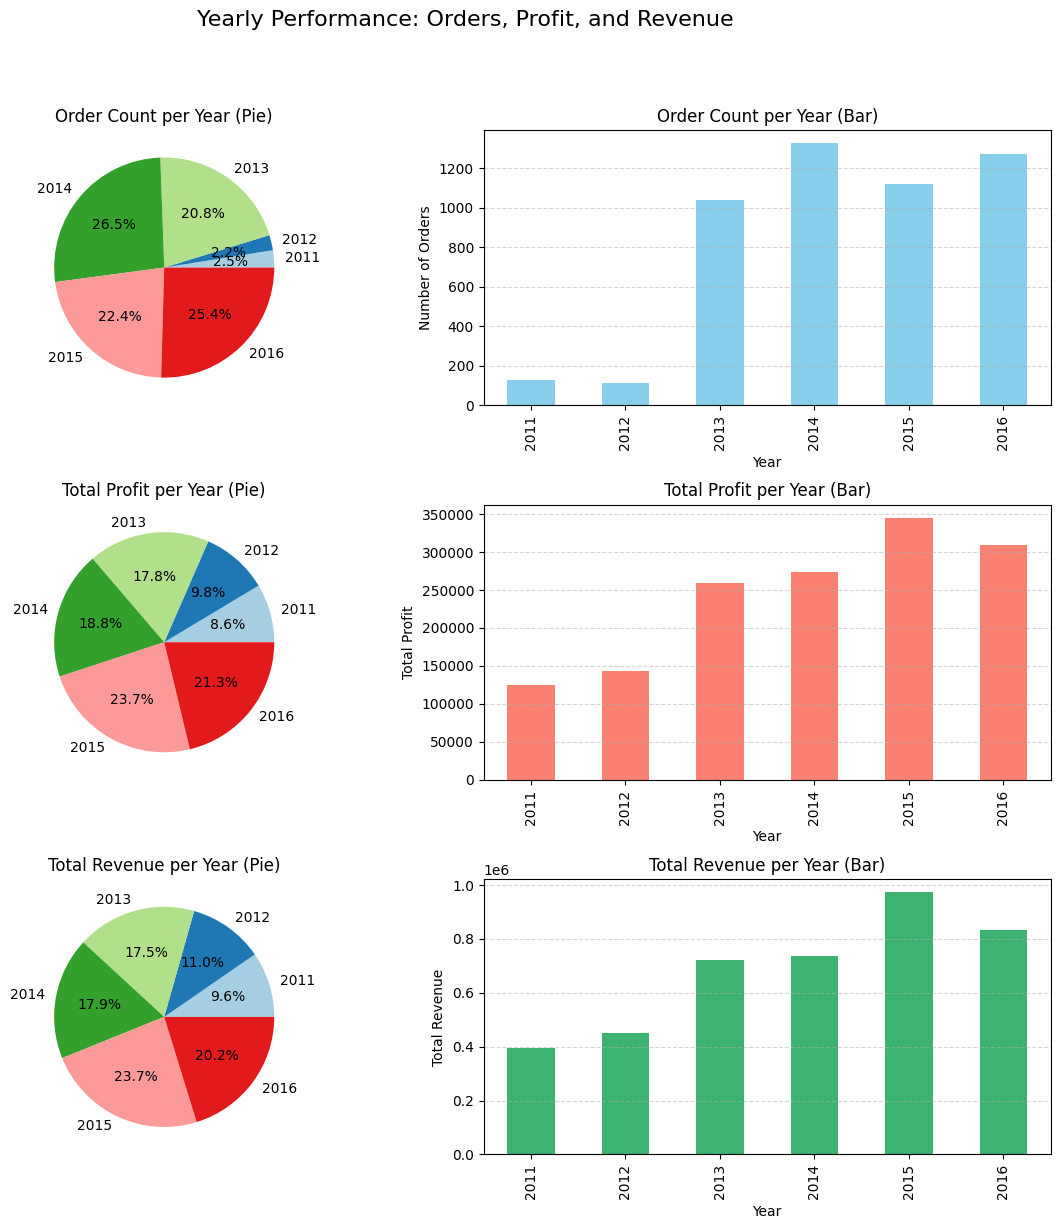

In [81]:
# Visual Analysis of Yearly Sales Metrics (Orders, Profit, Revenue)

# Calculate yearly orders count, total profit, and total revenue
yearly_orders = sales['Year'].value_counts().sort_index()
yearly_profit = sales.groupby('Year')['Profit'].sum()
yearly_revenue = sales.groupby('Year')['Revenue'].sum().sort_index()

# Create subplots: 3 rows x 2 columns for pie and bar charts
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

# --- Row 1: Order Counts ---
# Pie chart of orders per year
yearly_orders.plot.pie(
    ax=axes[0, 0],
    autopct='%1.1f%%',
    title='Order Count per Year (Pie)',
    ylabel='',
    colors=plt.cm.Paired.colors
)
# Bar chart of orders per year
yearly_orders.plot.bar(
    ax=axes[0, 1],
    title='Order Count per Year (Bar)',
    color='skyblue'
)
axes[0, 1].set_xlabel('Year')
axes[0, 1].set_ylabel('Number of Orders')
axes[0, 1].grid(axis='y', linestyle='--', alpha=0.5)

# --- Row 2: Profits ---
# Pie chart of total profit per year
yearly_profit.plot.pie(
    ax=axes[1, 0],
    autopct='%1.1f%%',
    title='Total Profit per Year (Pie)',
    ylabel='',
    colors=plt.cm.Paired.colors
)
# Bar chart of total profit per year
yearly_profit.plot.bar(
    ax=axes[1, 1],
    title='Total Profit per Year (Bar)',
    color='salmon'
)
axes[1, 1].set_xlabel('Year')
axes[1, 1].set_ylabel('Total Profit')
axes[1, 1].grid(axis='y', linestyle='--', alpha=0.5)

# --- Row 3: Revenues ---
# Pie chart of total revenue per year
yearly_revenue.plot.pie(
    ax=axes[2, 0],
    autopct='%1.1f%%',
    title='Total Revenue per Year (Pie)',
    ylabel='',
    colors=plt.cm.Paired.colors
)
# Bar chart of total revenue per year
yearly_revenue.plot.bar(
    ax=axes[2, 1],
    title='Total Revenue per Year (Bar)',
    color='mediumseagreen'
)
axes[2, 1].set_xlabel('Year')
axes[2, 1].set_ylabel('Total Revenue')
axes[2, 1].grid(axis='y', linestyle='--', alpha=0.5)

# Adjust layout and add a main title
plt.suptitle("Yearly Performance: Orders, Profit, and Revenue", fontsize=16, y=1.02)
plt.tight_layout()
plt.subplots_adjust(top=0.92)  # Adjust top to fit main title nicely

plt.show()

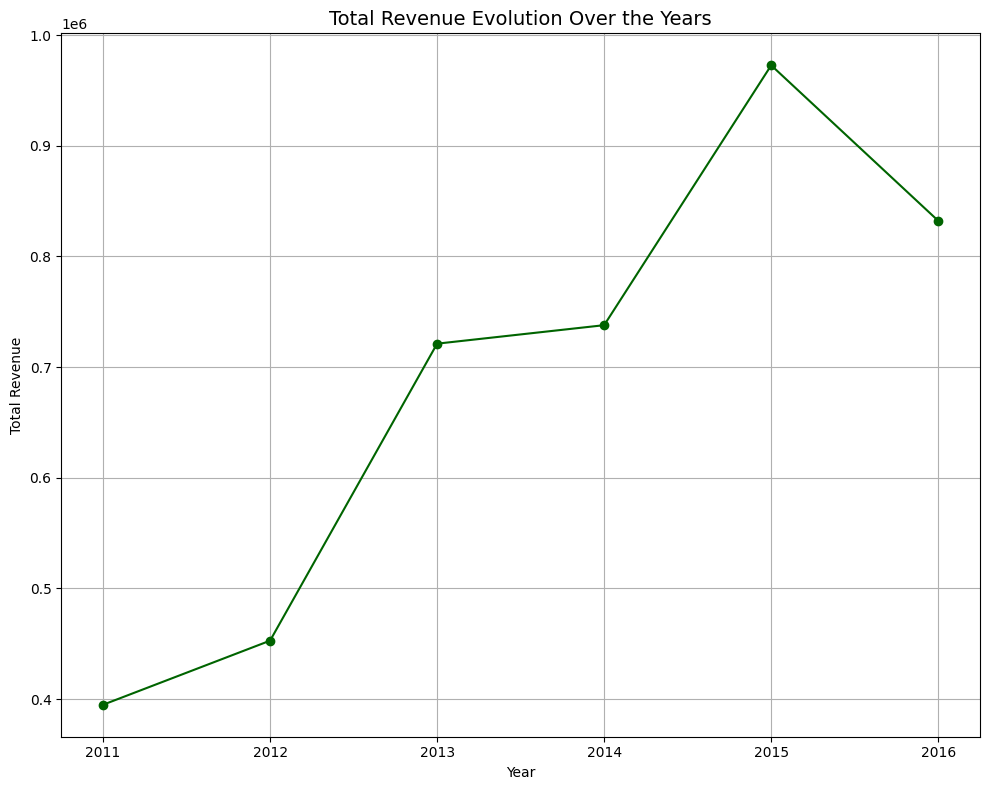

In [82]:
# --- How has total revenue evolved over the years? ---

# Create a line plot to visualize the trend of total revenue over the years
plt.figure(figsize=(10, 8))
plt.plot(
    yearly_revenue.index,
    yearly_revenue.values,
    marker='o',
    linestyle='-',
    color='darkgreen'
)

# Add plot title and axis labels
plt.title('Total Revenue Evolution Over the Years', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Total Revenue')

# Enable grid for easier readability
plt.grid(True)

# Set x-axis ticks to show each year explicitly
plt.xticks(yearly_revenue.index)

# Adjust layout to prevent overlap and improve appearance
plt.tight_layout()

# Show the plot
plt.show()

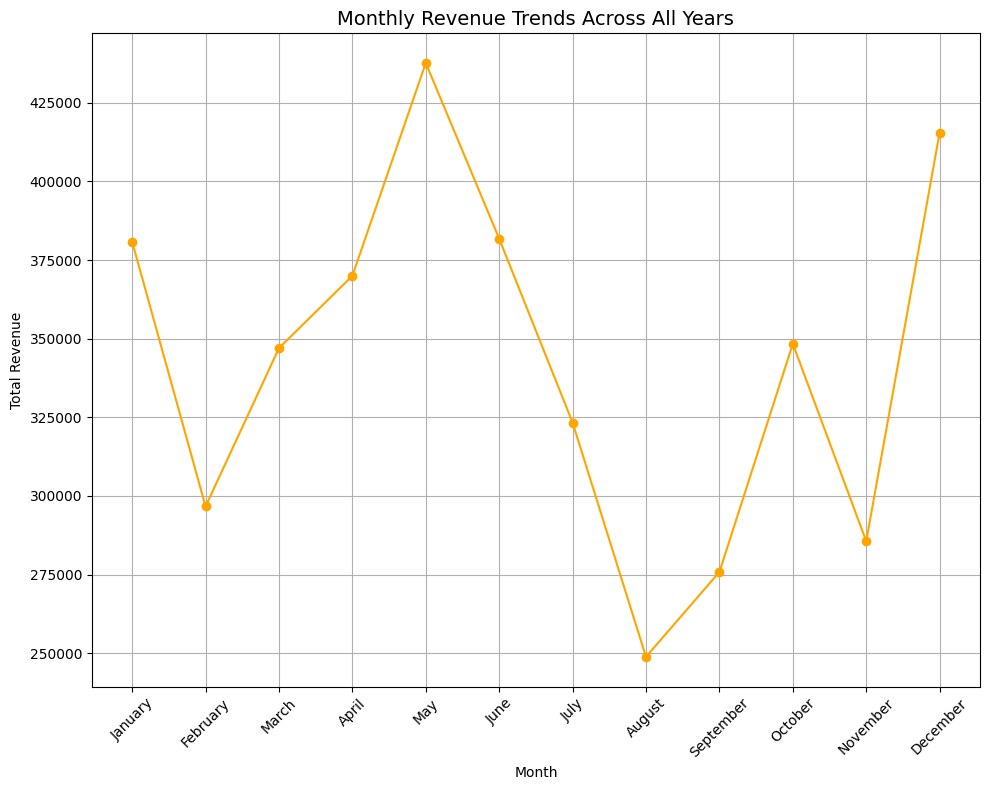

In [83]:
# --- Monthly Revenue Trends Across All Years ---

# Define mapping of month numbers to month names
month_map = {
    1: 'January',  2: 'February', 3: 'March',     4: 'April',
    5: 'May',      6: 'June',     7: 'July',      8: 'August',
    9: 'September',10: 'October',11: 'November', 12: 'December'
}

# Aggregate total revenue grouped by month number
monthly_revenue = sales.groupby('Month')['Revenue'].sum()

# Reindex to ensure all months from 1 to 12 are present, filling missing with 0
monthly_revenue = monthly_revenue.reindex(range(1, 13), fill_value=0)

# Create x-axis positions for plotting (0 to 11)
x = np.arange(12)

# Map month numbers to their corresponding names for labeling
month_names_ordered = [month_map[m] for m in range(1, 13)]

# Plot the monthly revenue trend
plt.figure(figsize=(10, 8))
plt.plot(
    x,
    monthly_revenue.values,
    marker='o',
    linestyle='-',
    color='orange'
)

# Set x-axis ticks to month names with rotation for readability
plt.xticks(x, month_names_ordered, rotation=45)

# Add plot title and axis labels
plt.title('Monthly Revenue Trends Across All Years', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Total Revenue')

# Enable grid for better visual guidance
plt.grid(True)

# Adjust layout to avoid overlap and ensure neat display
plt.tight_layout()

# Display the plot
plt.show()

In [84]:
# Increase revenue of every sale by $50

sales['Revenue'] += 50

In [85]:
# Get the top 5 sales records with the highest revenue

top_5_sales = sales.sort_values(by='Revenue', ascending=False).head(5)
print(top_5_sales)

           Date  Day  Month  Year  Customer_Age Customer_Gender  \
5    2011-01-17   17      1  2011            44               F   
29   2011-03-27   27      3  2011            24               M   
3901 2016-01-28   28      1  2016            34               M   
3761 2016-01-09    9      1  2016            40               F   
3556 2015-12-11   11     12  2015            44               M   

            Country             State Product_Category Sub_Category  ...  \
5     United States        California            Bikes   Road Bikes  ...   
29    United States        California            Bikes   Road Bikes  ...   
3901         Canada  British Columbia            Bikes   Road Bikes  ...   
3761         Canada  British Columbia            Bikes   Road Bikes  ...   
3556         Canada  British Columbia            Bikes   Road Bikes  ...   

      Season  Profit_per_Unit  Total_Cost  Order_Value  Gross_Profit_Margin  \
5     Winter      1335.500000        8684        14312       

In [86]:
# Get the sale record with the highest revenue

highest_revenue_sale = sales.loc[sales['Revenue'].idxmax()]
print(highest_revenue_sale)

Date                   2011-01-17 00:00:00
Day                                     17
Month                                    1
Year                                  2011
Customer_Age                            44
Customer_Gender                          F
Country                      United States
State                           California
Product_Category                     Bikes
Sub_Category                    Road Bikes
Product                   Road-150 Red, 62
Order_Quantity                           4
Unit_Cost                             2171
Unit_Price                            3578
Profit                                5342
Revenue                              14126
YearMonth                          2011-01
Month_Name                         January
Weekday                             Monday
Is_Weekend                               0
Season                              Winter
Profit_per_Unit                     1335.5
Total_Cost                            8684
Order_Value

In [87]:
# Add 7.2% TAX on Unit_Price for sales within the United States

us_mask = sales['Country'] == 'United States'
sales['Unit_Price_Taxed'] = sales['Unit_Price']
sales.loc[us_mask, 'Unit_Price_Taxed'] *= 1.072

sales.head()

Date  Day  Month  Year  Customer_Age Customer_Gender         Country  \
0 2011-01-03    3      1  2011            42               F       Australia   
1 2011-01-09    9      1  2011            17               F          Canada   
2 2011-01-14   14      1  2011            31               F  United Kingdom   
3 2011-01-17   17      1  2011            32               F          France   
4 2011-01-17   17      1  2011            46               M       Australia   

               State Product_Category Sub_Category  ...  Season  \
0           Victoria            Bikes   Road Bikes  ...  Winter   
1   British Columbia            Bikes   Road Bikes  ...  Winter   
2            England            Bikes   Road Bikes  ...  Winter   
3  Seine Saint Denis            Bikes   Road Bikes  ...  Winter   
4    New South Wales            Bikes   Road Bikes  ...  Winter   

   Profit_per_Unit  Total_Cost  Order_Value  Gross_Profit_Margin  Age_Group  \
0            83.00         344          540             0.194379      35-44   
1           601.00        1083         1701             0.356888      17-24   
2           174.00         344          540             0.335907      25-34   
3           448.25        6220         9772             0.223761      25-34   
4           126.00         344          540             0.268085      45-54   

  Customer_Segment Revenue_Group Unit_Price_Taxed  Profit_Margin  
0                1          <10K            540.0      17.400419  
1                2          <10K           1701.0      34.659746  
2                1          <10K            540.0      30.633803  
3                0          <10K           2443.0      22.237381  
4                1          <10K            540.0      24.230769  

[5 rows x 30 columns]

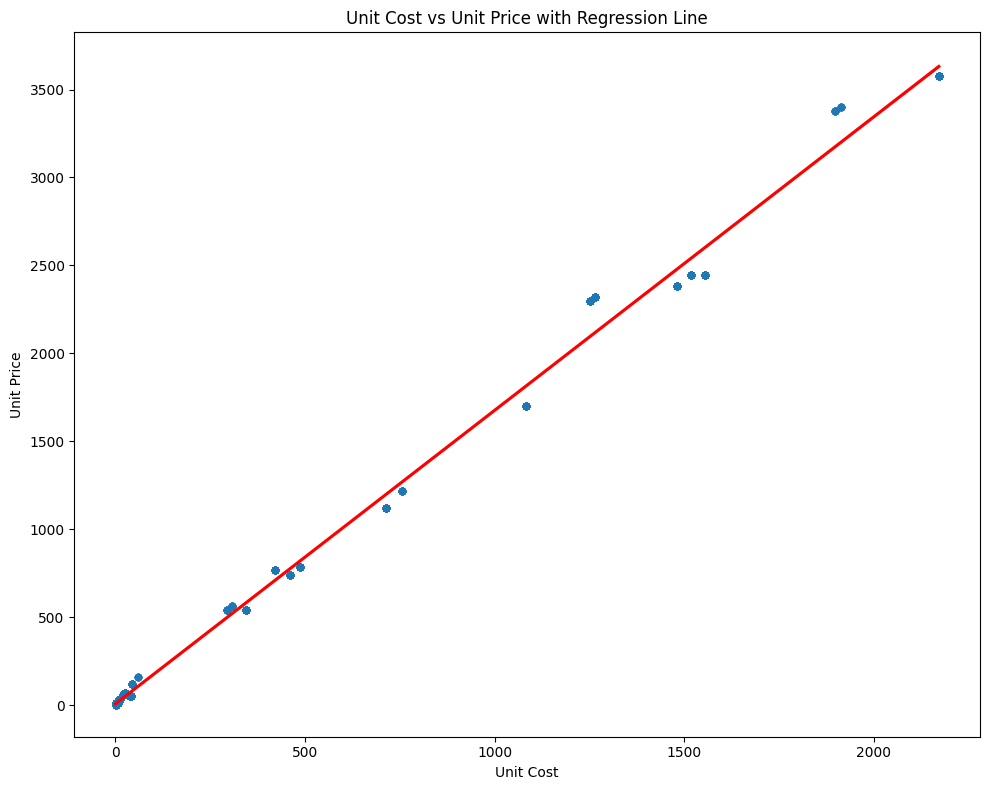

Slope: 1.67
Intercept: 5.78
R-squared: 1.00
P-value: 0.0000


In [88]:
# Plot the relationship between Unit Cost and Unit Price with a regression line

plt.figure(figsize=(10, 8))
sns.regplot(
    x='Unit_Cost',
    y='Unit_Price',
    data=sales,
    scatter_kws={'s': 20},
    line_kws={'color': 'red'}
)
plt.title('Unit Cost vs Unit Price with Regression Line')
plt.xlabel('Unit Cost')
plt.ylabel('Unit Price')
plt.tight_layout()
plt.show()

# Perform linear regression analysis to quantify relationship
slope, intercept, r_value, p_value, std_err = linregress(sales['Unit_Cost'], sales['Unit_Price'])

# Print regression results with formatting
print(f"Slope: {slope:.2f}")
print(f"Intercept: {intercept:.2f}")
print(f"R-squared: {r_value**2:.2f}")
print(f"P-value: {p_value:.4f}")

Top 10 Losing Products (Profit <= 0):
Product
AWC Logo Cap                      17
Long-Sleeve Logo Jersey, M         1
Long-Sleeve Logo Jersey, S         1
Short-Sleeve Classic Jersey, S     1
Short-Sleeve Classic Jersey, M     1
Name: count, dtype: int64

Top 10 Low Profit Products (0 < Profit < 50):
Product
Patch Kit/8 Patches        441
Water Bottle - 30 oz.      331
Mountain Tire Tube         201
AWC Logo Cap               160
Road Tire Tube             113
Touring Tire Tube          106
Mountain Bottle Cage        38
Road Bottle Cage            35
Sport-100 Helmet, Black     24
Bike Wash - Dissolver       23
Name: count, dtype: int64

Top 10 High Profit Products (Profit >= 1000):
Product
Road-150 Red, 62           59095
Road-150 Red, 52           50383
Mountain-200 Black, 42     37820
Mountain-200 Black, 38     36164
Road-150 Red, 56           34932
Mountain-200 Silver, 38    30223
Mountain-200 Silver, 42    24354
Mountain-200 Silver, 46    19466
Road-150 Red, 44           17552


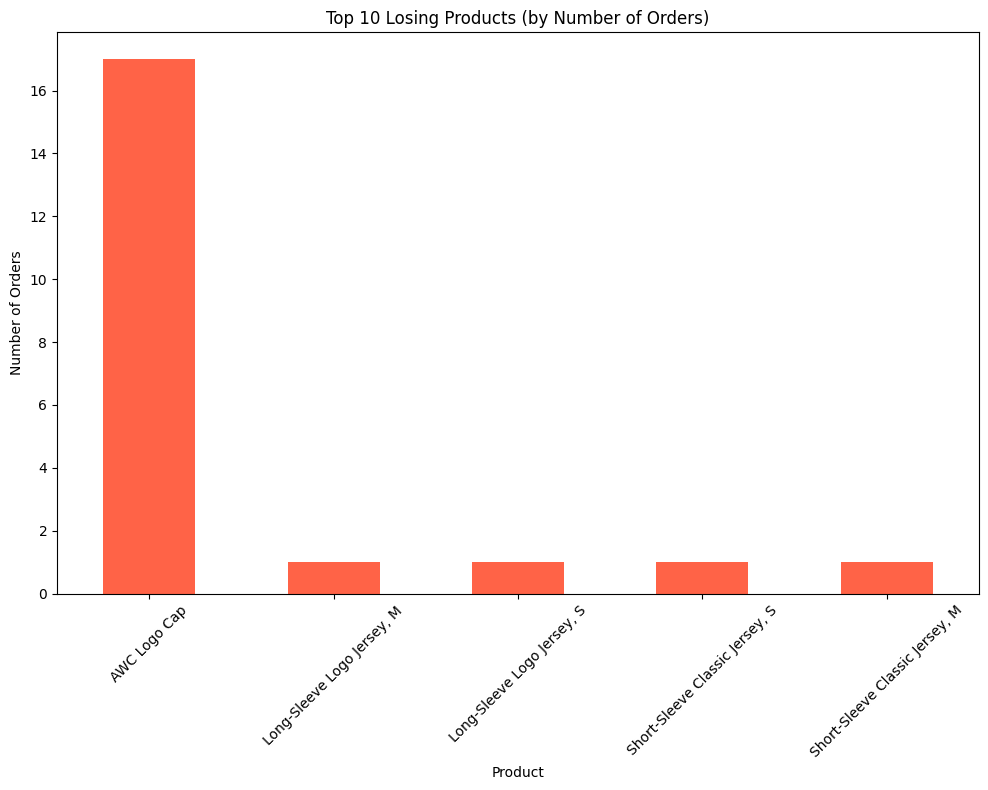

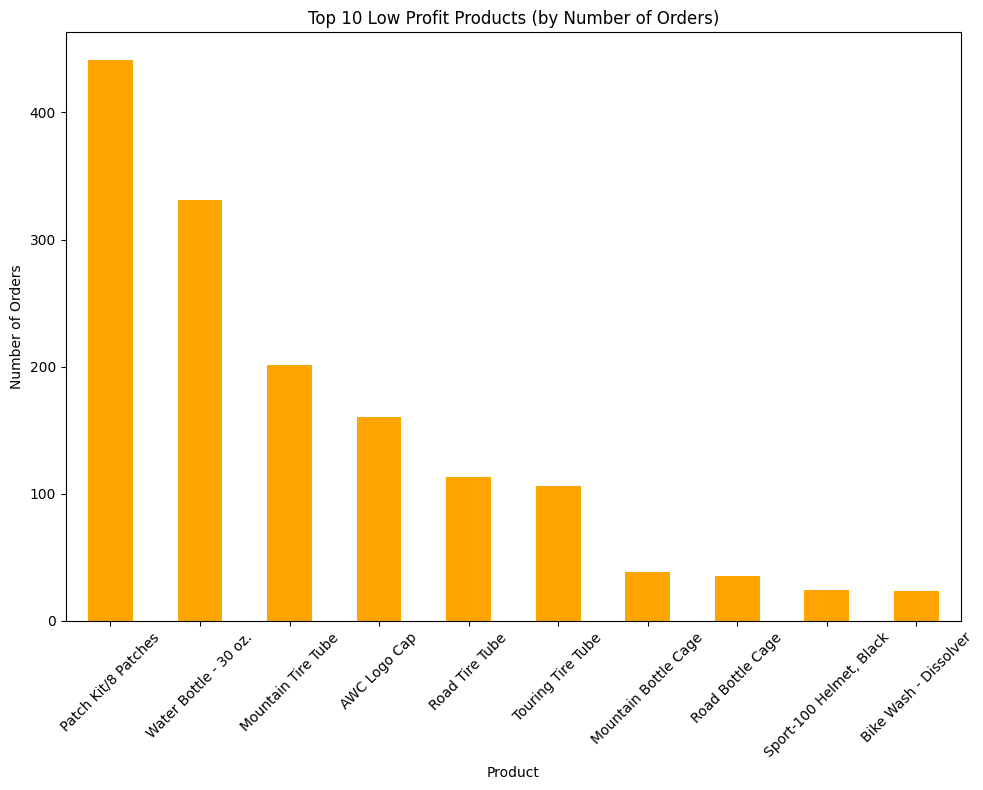

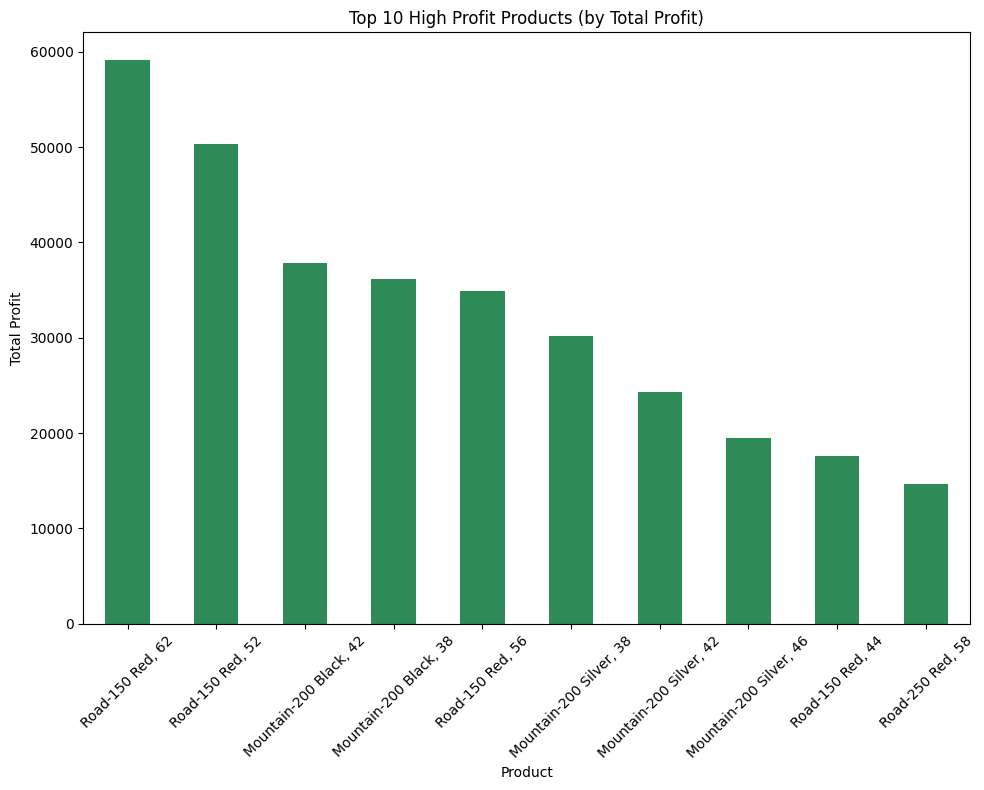

In [89]:
# Identify Top 10 Losing Products (Profit <= 0)

losing_products = sales[sales['Profit'] <= 0]['Product'].value_counts().head(10)

# Identify Top 10 Low Profit Products (0 < Profit < 50)
low_profit_products = sales[(sales['Profit'] > 0) & (sales['Profit'] < 50)]['Product'].value_counts().head(10)

# Identify Top 10 High Profit Products (Profit >= 1000)
high_profit_products = sales[sales['Profit'] >= 1000].groupby('Product')['Profit'].sum().sort_values(ascending=False).head(10)

# Display the results in console
print("Top 10 Losing Products (Profit <= 0):")
print(losing_products)

print("\nTop 10 Low Profit Products (0 < Profit < 50):")
print(low_profit_products)

print("\nTop 10 High Profit Products (Profit >= 1000):")
print(high_profit_products)

# Plot Top 10 Losing Products by number of orders
plt.figure(figsize=(10, 8))
losing_products.plot(kind='bar', color='tomato')
plt.title('Top 10 Losing Products (by Number of Orders)')
plt.xlabel('Product')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot Top 10 Low Profit Products by number of orders
plt.figure(figsize=(10, 8))
low_profit_products.plot(kind='bar', color='orange')
plt.title('Top 10 Low Profit Products (by Number of Orders)')
plt.xlabel('Product')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot Top 10 High Profit Products by total profit
plt.figure(figsize=(10, 8))
high_profit_products.plot(kind='bar', color='seagreen')
plt.title('Top 10 High Profit Products (by Total Profit)')
plt.xlabel('Product')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

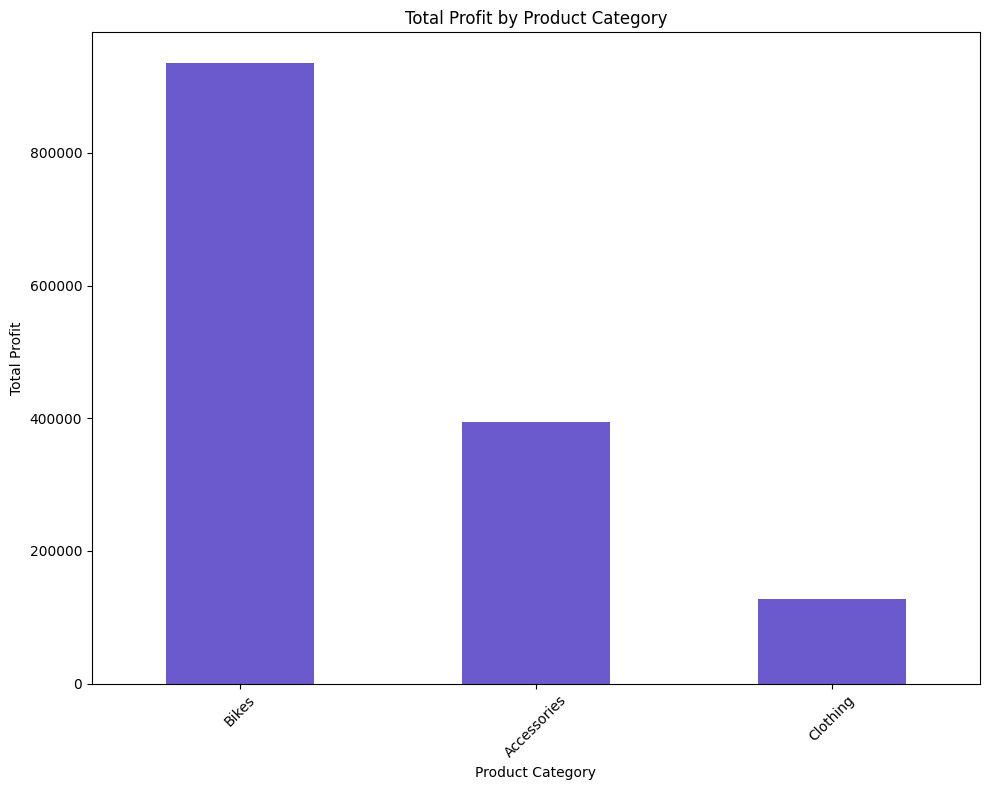

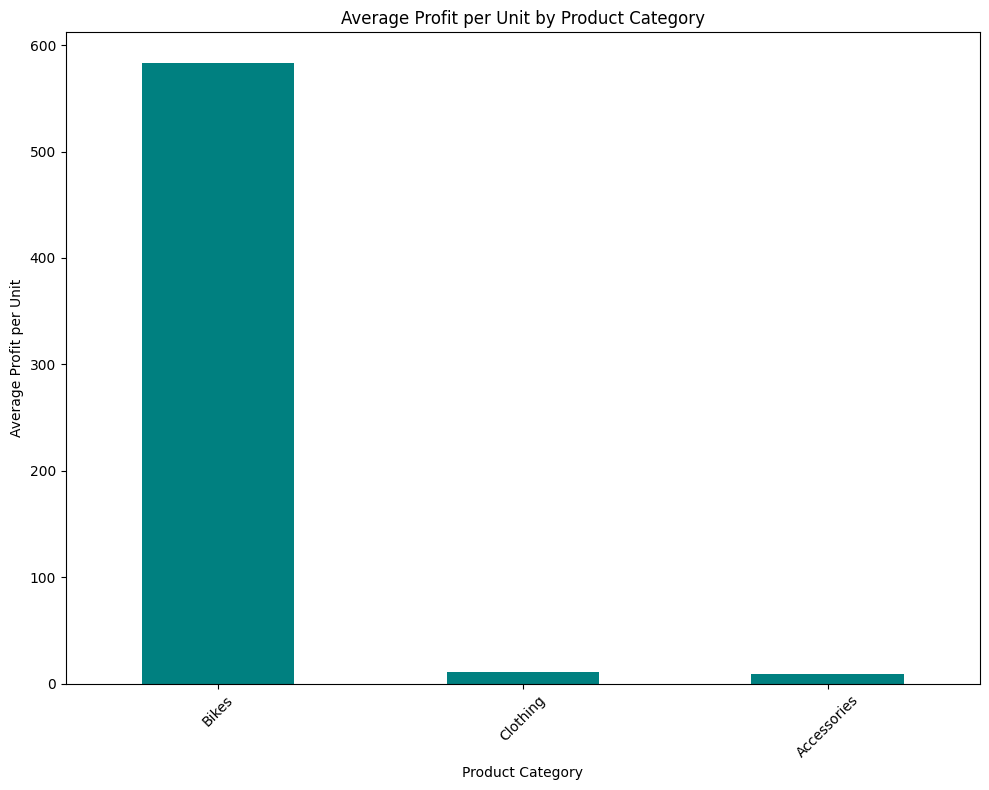

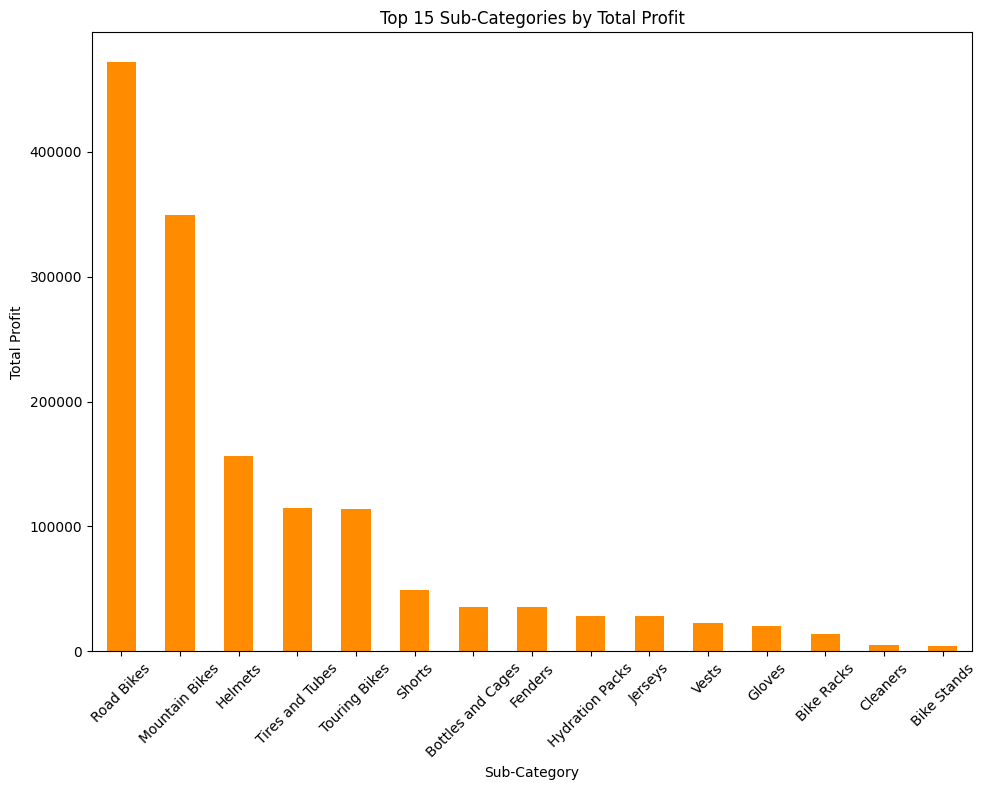

In [90]:
# Analysis of Total Profit and Average Profit per Unit by Product Category and Sub-Category

# Calculate total profit by product category and sort descending
category_profit = sales.groupby('Product_Category')['Profit'].sum().sort_values(ascending=False)

# Calculate average profit per unit by product category and sort descending
category_unit_profit = sales.groupby('Product_Category')['Profit_per_Unit'].mean().sort_values(ascending=False)

# Plot total profit per product category
plt.figure(figsize=(10, 8))
category_profit.plot(kind='bar', color='slateblue')
plt.title('Total Profit by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot average profit per unit by product category
plt.figure(figsize=(10, 8))
category_unit_profit.plot(kind='bar', color='teal')
plt.title('Average Profit per Unit by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average Profit per Unit')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculate total profit by sub-category and select top 15
subcat_profit = sales.groupby('Sub_Category')['Profit'].sum().sort_values(ascending=False).head(15)

# Plot total profit for top 15 sub-categories
plt.figure(figsize=(10, 8))
subcat_profit.plot(kind='bar', color='darkorange')
plt.title('Top 15 Sub-Categories by Total Profit')
plt.xlabel('Sub-Category')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

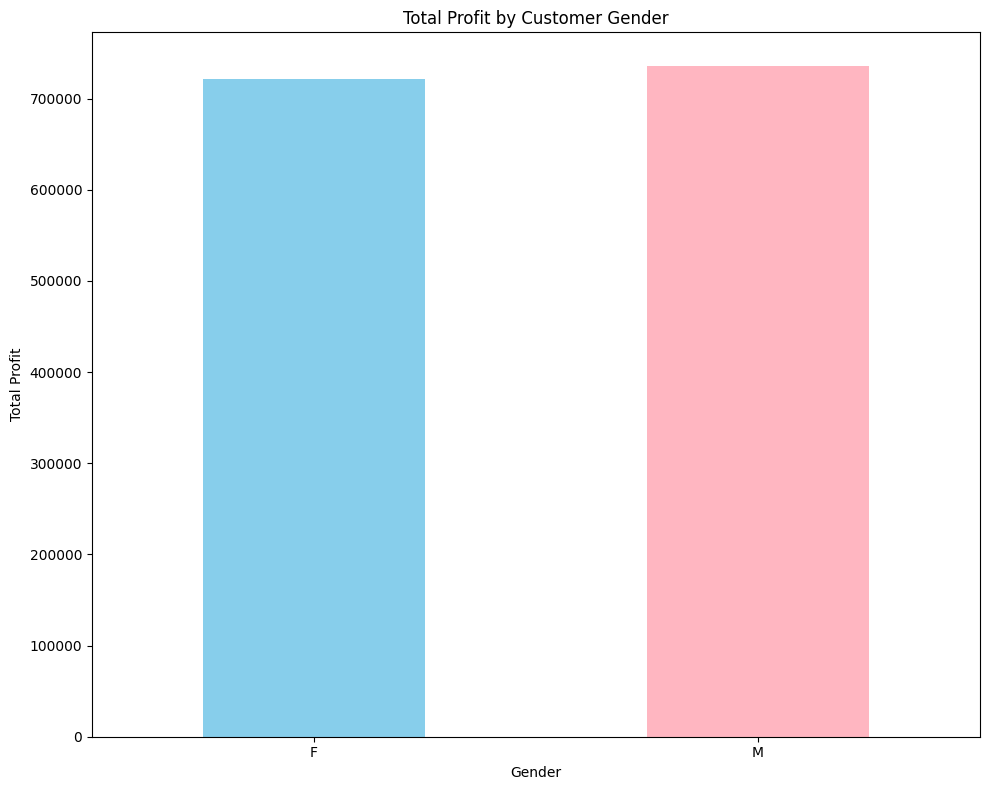

In [91]:
# Calculate total profit grouped by customer gender

gender_profit = sales.groupby('Customer_Gender')['Profit'].sum()

# Plot total profit by gender using a bar chart
plt.figure(figsize=(10, 8))
gender_profit.plot(kind='bar', color=['skyblue', 'lightpink'])
plt.title('Total Profit by Customer Gender')
plt.xlabel('Gender')
plt.ylabel('Total Profit')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

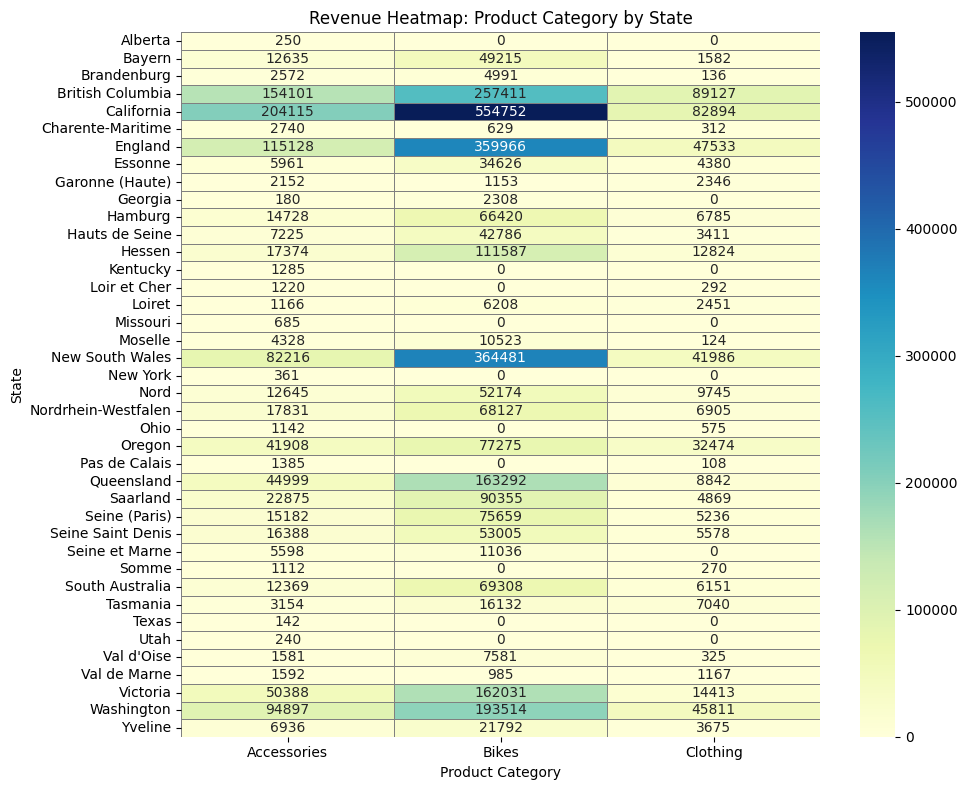

In [92]:
# Group revenue by State and Product Category, then reshape the data for heatmap

sales_by_state_category = sales.groupby(['State', 'Product_Category'])['Revenue'].sum().unstack().fillna(0)

# Plot heatmap to visualize revenue distribution across states and product categories
plt.figure(figsize=(10, 8))
sns.heatmap(
    sales_by_state_category,
    cmap='YlGnBu',
    linewidths=0.5,
    linecolor='gray',
    annot=True,
    fmt='.0f'
)
plt.title('Revenue Heatmap: Product Category by State')
plt.xlabel('Product Category')
plt.ylabel('State')
plt.tight_layout()
plt.show()

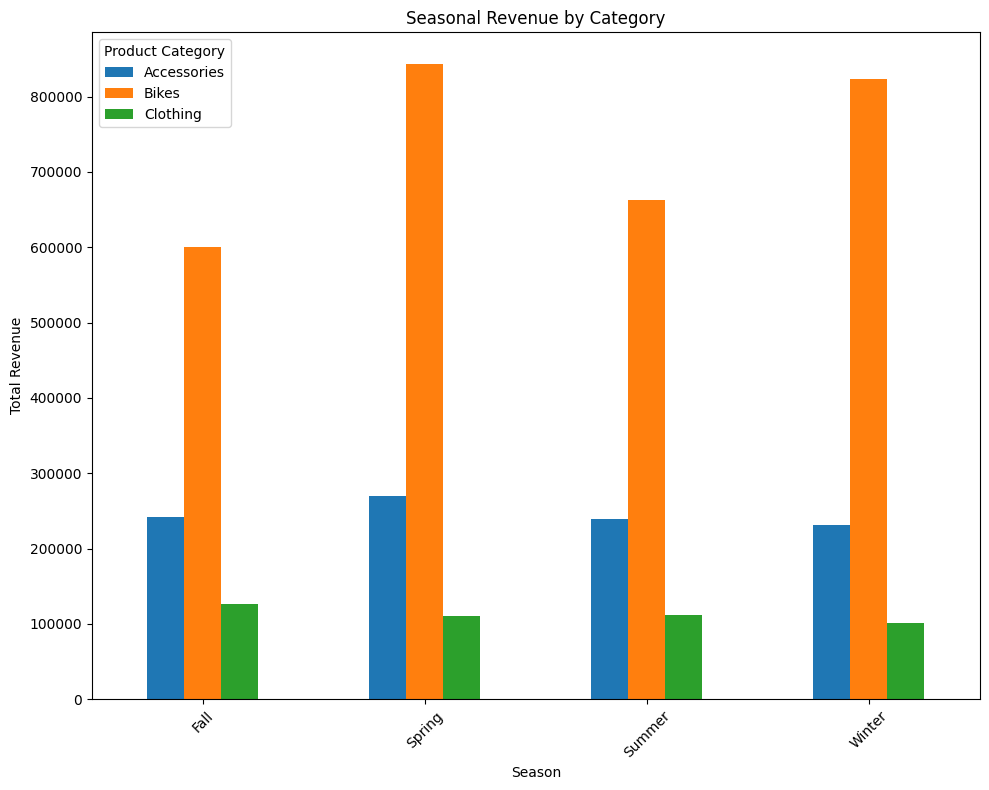

In [93]:
# Group revenue by Season and Product Category, then reshape the data for plotting

season_category_sales = sales.groupby(['Season', 'Product_Category'])['Revenue'].sum().unstack()

# Plot a grouped bar chart showing total revenue for each product category across seasons
ax = season_category_sales.plot(
    kind='bar',
    figsize=(10, 8),
    title='Seasonal Revenue by Category'
)
plt.xlabel('Season')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.legend(title='Product Category')
plt.tight_layout()
plt.show()

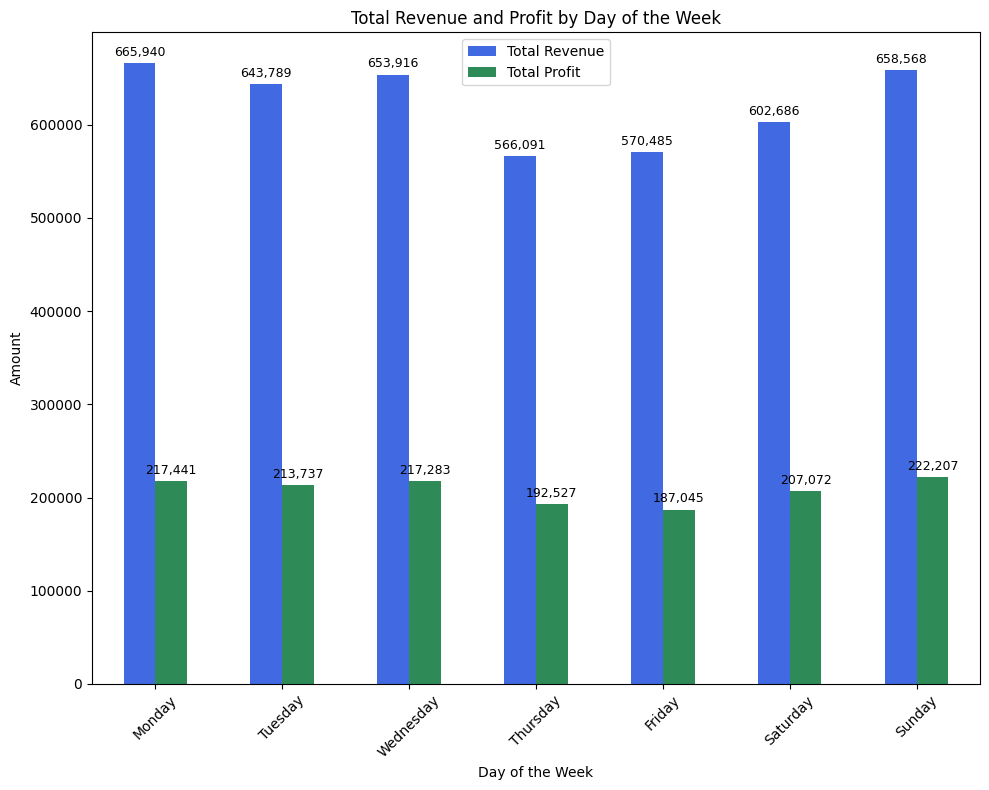

In [94]:
# Revenue & Profit Analysis: Focus on Total Revenue and Profit by Weekday

# Define the order of weekdays for consistent plotting
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Group the sales data by weekday and aggregate total revenue and profit
revenue_profit_stats = sales.groupby('Weekday').agg({
    'Revenue': 'sum',
    'Profit': 'sum'
}).reindex(weekday_order)

# Plot a bar chart for total revenue and profit per weekday
ax = revenue_profit_stats.plot(
    kind='bar',
    figsize=(10, 8),
    color=['royalblue', 'seagreen'],
    title='Total Revenue and Profit by Day of the Week'
)

# Set labels and rotate x-axis ticks for readability
plt.xlabel('Day of the Week')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.legend(['Total Revenue', 'Total Profit'])
plt.tight_layout()

# Annotate each bar with its height value
for p in ax.patches:
    height = p.get_height()
    if height != 0 and not np.isnan(height):
        ax.annotate(
            f'{height:,.0f}',
            (p.get_x() + p.get_width() / 2, height),
            ha='center',
            va='bottom' if height > 0 else 'top',
            fontsize=9,
            rotation=0,
            xytext=(0, 3) if height > 0 else (0, -10),  #
            textcoords='offset points'
        )

plt.show()

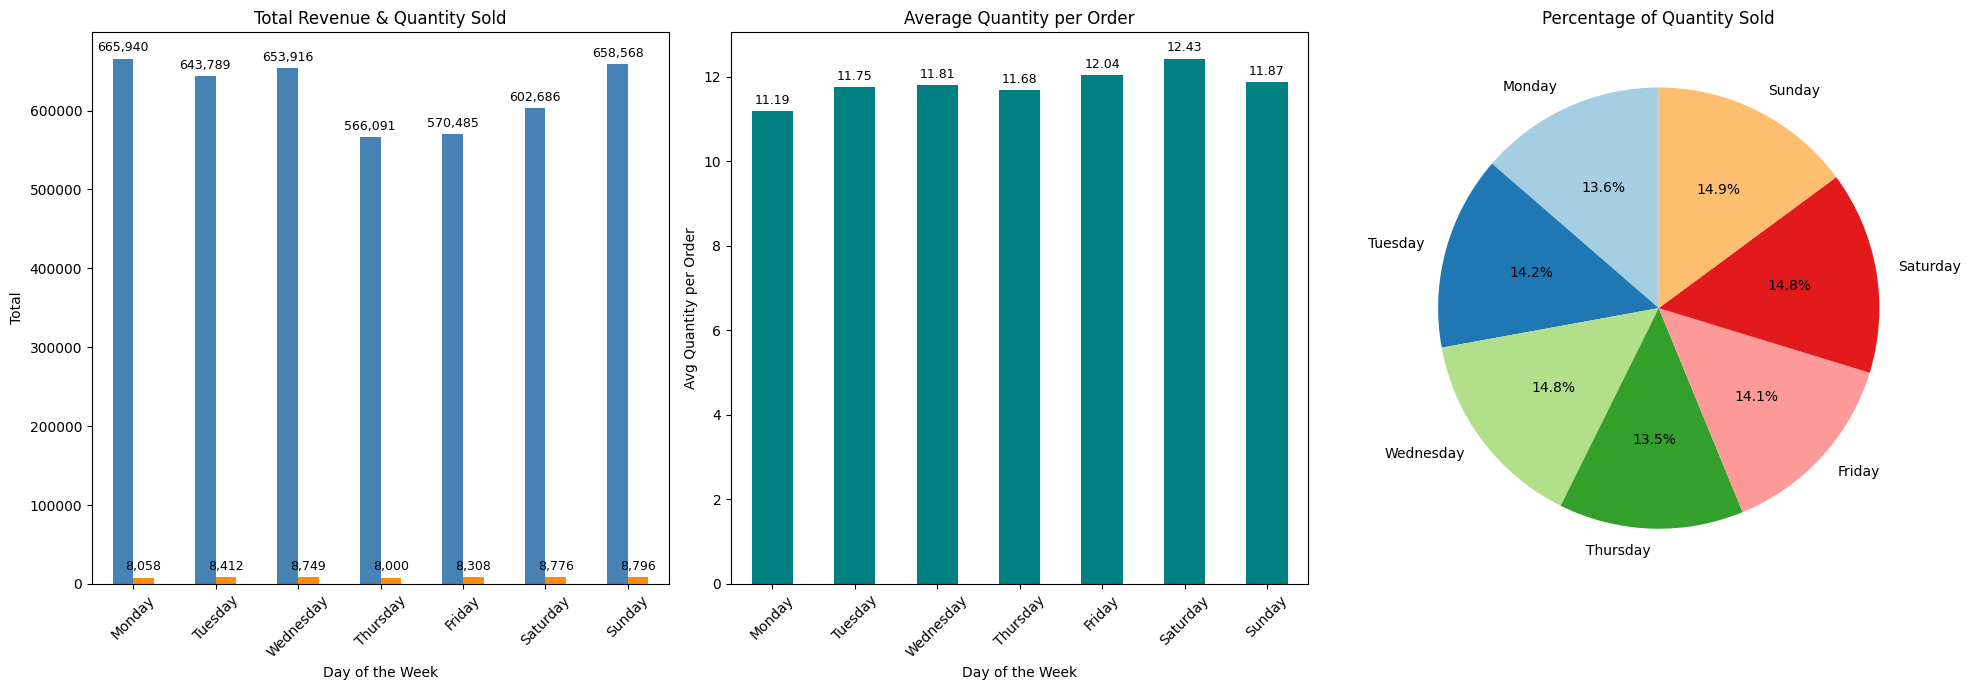

In [95]:
# Revenue & Quantity Sold by Weekday with Avg Quantity per Order and Pie Chart

# Define the weekday order to maintain consistency in plots
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# 1. Calculate total revenue and total quantity sold by weekday
weekday_stats = sales.groupby('Weekday').agg({
    'Revenue': 'sum',
    'Order_Quantity': 'sum'  # Total quantity sold
}).reindex(weekday_order)  # Ensure correct weekday order

# Create a figure with 3 subplots arranged horizontally
plt.figure(figsize=(20, 7))

# Plot 1: Total Revenue and Quantity Sold by Weekday
ax1 = plt.subplot(1, 3, 1)
weekday_stats.plot(
    kind='bar',
    color=['steelblue', 'darkorange'],
    ax=ax1,
    legend=False,
    title='Total Revenue & Quantity Sold'
)
ax1.set_xlabel('Day of the Week')
ax1.set_ylabel('Total')
ax1.tick_params(axis='x', rotation=45)

# Annotate bars with their height values for clarity
for p in ax1.patches:
    height = p.get_height()
    if height != 0 and not np.isnan(height):
        ax1.annotate(
            f'{height:,.0f}',
            (p.get_x() + p.get_width() / 2, height),
            ha='center',
            va='bottom',
            fontsize=9,
            rotation=0,
            xytext=(0, 3),
            textcoords='offset points'
        )

# 2. Calculate average quantity sold per order by weekday
avg_order_stats = sales.groupby('Weekday').agg(
    Total_Quantity=('Order_Quantity', 'sum'),
    Number_of_Orders=('Order_Quantity', 'count')
).assign(
    Avg_Quantity_Per_Order=lambda df: df['Total_Quantity'] / df['Number_of_Orders']
).reindex(weekday_order)

# Plot 2: Average Quantity per Order by Weekday
ax2 = plt.subplot(1, 3, 2)
avg_order_stats['Avg_Quantity_Per_Order'].plot(
    kind='bar',
    color='teal',
    ax=ax2,
    title='Average Quantity per Order'
)
ax2.set_xlabel('Day of the Week')
ax2.set_ylabel('Avg Quantity per Order')
ax2.tick_params(axis='x', rotation=45)

# Annotate bars with average quantity values
for p in ax2.patches:
    height = p.get_height()
    if height != 0 and not np.isnan(height):
        ax2.annotate(
            f'{height:.2f}',
            (p.get_x() + p.get_width() / 2, height),
            ha='center',
            va='bottom',
            fontsize=9,
            rotation=0,
            xytext=(0, 3),
            textcoords='offset points'
        )

# 3. Calculate percentage of total quantity sold by weekday for pie chart
weekday_qty_pct = sales.groupby('Weekday')['Order_Quantity'].sum().reindex(weekday_order)
weekday_qty_pct = weekday_qty_pct / weekday_qty_pct.sum() * 100  # Convert to percentage

# Plot 3: Pie chart for quantity sold distribution by weekday
ax3 = plt.subplot(1, 3, 3)
ax3.pie(
    weekday_qty_pct,
    labels=weekday_qty_pct.index,
    autopct='%1.1f%%',
    colors=plt.cm.Paired.colors,
    startangle=90
)
ax3.set_title('Percentage of Quantity Sold')

# Adjust layout for clean display
plt.tight_layout()
plt.show()

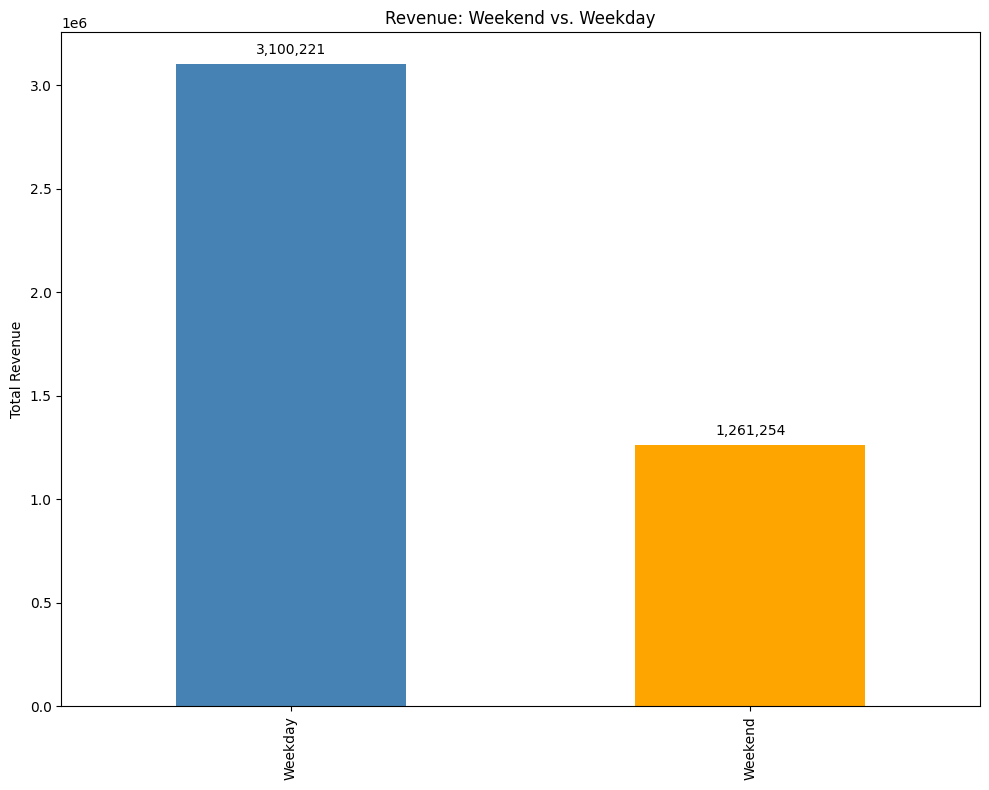

In [96]:
# Group sales data by weekend vs. weekday and calculate total revenue

weekend_comparison = sales.groupby('Is_Weekend')['Revenue'].sum()

# Rename index for better readability (False = Weekday, True = Weekend)
weekend_comparison.index = ['Weekday', 'Weekend']

# Plot the total revenue comparison as a bar chart
ax = weekend_comparison.plot(
    kind='bar',
    title='Revenue: Weekend vs. Weekday',
    color=['steelblue', 'orange'],
    figsize=(10, 8)
)

# Set y-axis label and adjust layout for better appearance
plt.ylabel('Total Revenue')
plt.tight_layout()

# Annotate bars with their revenue values for clarity
for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        f'{height:,.0f}',
        (p.get_x() + p.get_width() / 2, height),
        ha='center',
        va='bottom',
        fontsize=10,
        xytext=(0, 5),
        textcoords='offset points'
    )

plt.show()

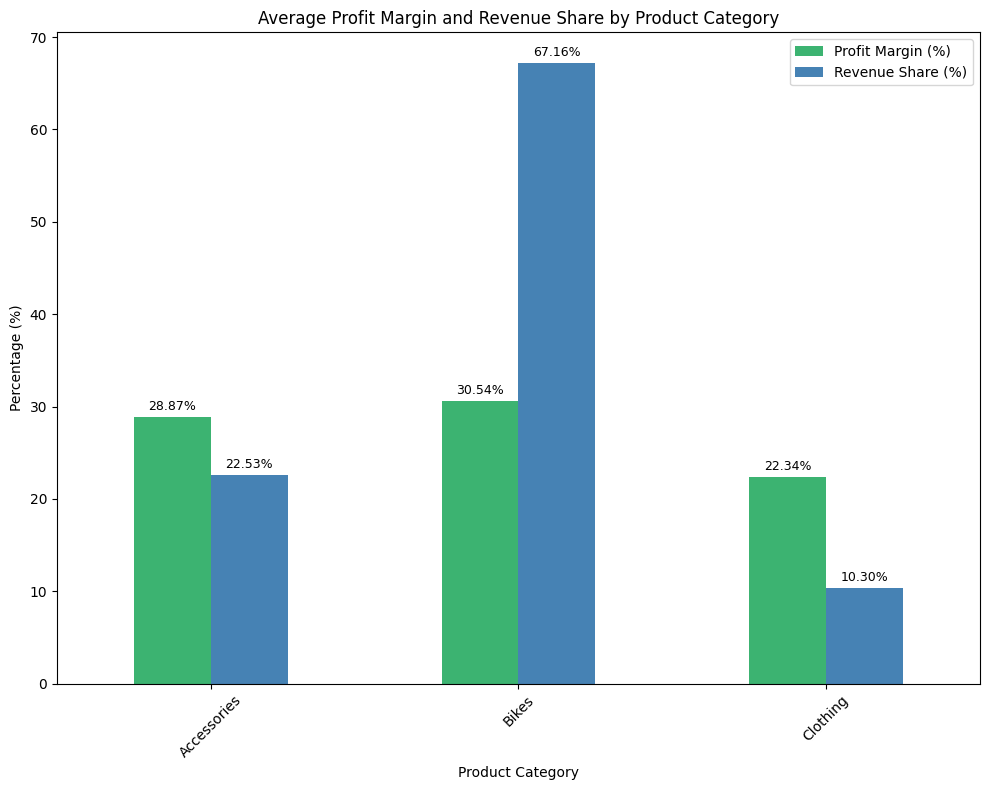

In [97]:
# Calculate profit margin as a percentage to understand profitability relative to revenue

sales['Profit_Margin'] = (sales['Profit'] / (sales['Revenue'] + 1e-9)) * 100  # Add small epsilon to avoid division by zero

# Aggregate data by Product Category to find average profit margin and total revenue
category_stats = sales.groupby('Product_Category').agg({
    'Profit_Margin': 'mean',  # Average profit margin across all sales in the category
    'Revenue': 'sum'          # Total revenue generated by the category
})

# Calculate the revenue share percentage of each product category relative to overall revenue
total_revenue = category_stats['Revenue'].sum()
category_stats['Revenue_Share'] = (category_stats['Revenue'] / total_revenue) * 100

# Plot side-by-side bar chart comparing Profit Margin and Revenue Share by Product Category
ax = category_stats[['Profit_Margin', 'Revenue_Share']].plot(
    kind='bar',
    figsize=(10, 8),
    color=['mediumseagreen', 'steelblue']
)

plt.title('Average Profit Margin and Revenue Share by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.legend(['Profit Margin (%)', 'Revenue Share (%)'])
plt.tight_layout()

# Annotate each bar with its exact percentage value for clarity
for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        f'{height:.2f}%',
        (p.get_x() + p.get_width() / 2, height),
        ha='center',
        va='bottom',
        fontsize=9,
        xytext=(0, 3),
        textcoords='offset points'
    )

plt.show()

###Trend Analysis & Forecasting

This section delves into a comprehensive monthly and seasonal analysis of sales performance, including total orders, revenue, and profit. We explore growth trends over time with rolling averages, analyze seasonal revenue variations, and implement forecasting models using both Prophet and Random Forest techniques. A comparison of these models' forecasting performance provides insights into their relative effectiveness. Visualizations throughout aid in interpreting the temporal dynamics and trends within the sales data.


In [99]:
# Monthly Summary Preparation

monthly_summary = sales.groupby('YearMonth').agg({
    'Order_Quantity': 'sum',
    'Revenue': 'sum',
    'Profit': 'sum'
}).reset_index()

monthly_summary.rename(columns={'Order_Quantity': 'Orders'}, inplace=True)
monthly_summary['YearMonth'] = pd.to_datetime(monthly_summary['YearMonth'], format='%Y-%m')
monthly_summary.set_index('YearMonth', inplace=True)
monthly_summary = monthly_summary.sort_index()

monthly_summary['Revenue'] = pd.to_numeric(monthly_summary['Revenue'], errors='coerce').fillna(0)
monthly_summary['Profit'] = pd.to_numeric(monthly_summary['Profit'], errors='coerce').fillna(0)

monthly_summary['Cumulative_Revenue'] = monthly_summary['Revenue'].cumsum()
monthly_summary['Cumulative_Profit'] = monthly_summary['Profit'].cumsum()

monthly_summary['Revenue_MoM_Growth'] = monthly_summary['Revenue'].pct_change().fillna(0) * 100
monthly_summary['Profit_MoM_Growth'] = monthly_summary['Profit'].pct_change().fillna(0) * 100

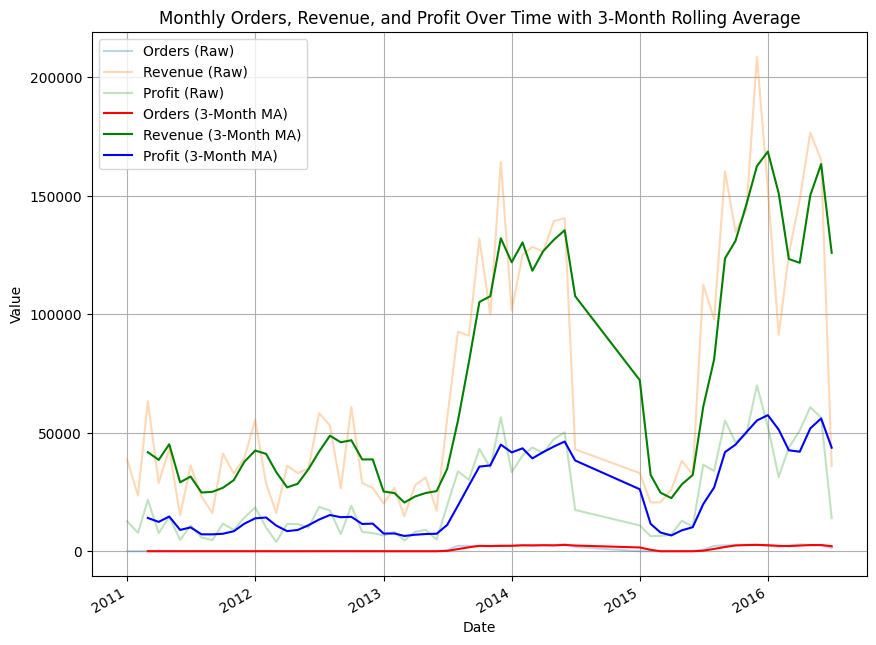

In [100]:
# Monthly Trend Analysis: Orders, Revenue, and Profit with 3-Month Rolling Average

monthly_summary = monthly_summary.sort_index()

# Calculate 3-month rolling average
rolling_summary = monthly_summary[['Orders', 'Revenue', 'Profit']].rolling(window=3).mean()

plt.figure(figsize=(10, 8))

# Plot raw values with transparency
ax = monthly_summary[['Orders', 'Revenue', 'Profit']].plot(alpha=0.3, legend=False, ax=plt.gca())

# Plot rolling averages with distinct colors
rolling_summary.plot(ax=ax, color=['red', 'green', 'blue'])

plt.title('Monthly Orders, Revenue, and Profit Over Time with 3-Month Rolling Average')
plt.ylabel('Value')
plt.xlabel('Date')
plt.grid(True)

# Update legend to reflect raw vs rolling average data
handles, labels = ax.get_legend_handles_labels()
new_labels = [f'{label} (Raw)' for label in labels[:3]] + [f'{label} (3-Month MA)' for label in labels[3:]]
plt.legend(handles, new_labels)

plt.show()

Season
Winter    1156455
Spring    1223583
Summer    1013456
Fall       967981
Name: Revenue, dtype: int64


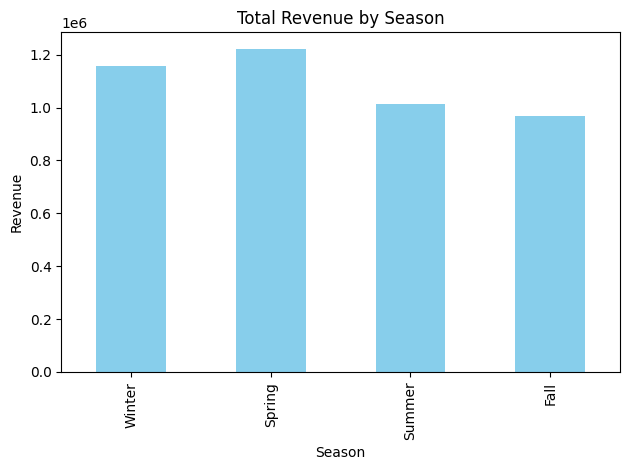

In [101]:
# Seasonal Sales Trend

# Define the desired order of seasons for consistent plotting
season_order = ['Winter', 'Spring', 'Summer', 'Fall']

# Aggregate total revenue by season and reorder according to season_order
seasonal_sales = sales.groupby('Season')['Revenue'].sum().reindex(season_order)

# Print the total revenue per season to console for review
print(seasonal_sales)

# Plot a bar chart showing total revenue for each season
seasonal_sales.plot(kind='bar', color='skyblue')

# Set chart title and axis labels
plt.title('Total Revenue by Season')
plt.ylabel('Revenue')
plt.xlabel('Season')

# Adjust layout to prevent overlapping elements
plt.tight_layout()

# Display the plot
plt.show()

**Note:**

The following comparison between **Prophet** and **Random Forest** highlights general performance trends rather than serving as a strict benchmark.

**Prophet** is trained on the full sequential time series data and forecasts future values by modeling temporal patterns and seasonality.

**Random Forest** is trained and evaluated using randomly shuffled train/test splits, relying on feature-based learning without explicitly modeling time dependencies.

Therefore, this evaluation provides an illustrative overview of each model’s forecasting accuracy and ability to recognize trends — not a direct apples-to-apples comparison.

In [104]:
# General function to perform forecasting using Prophet and visualize results

def prophet_forecast(monthly_df, column_name, periods=6):
    # Prepare data in the format Prophet expects: columns 'ds' (date) and 'y' (value to forecast)
    df_prophet = monthly_df[[column_name]].reset_index().rename(columns={'YearMonth': 'ds', column_name: 'y'})

    # Initialize the Prophet model
    model = Prophet()
    # Fit the model on historical data
    model.fit(df_prophet)

    # Create a DataFrame to hold future dates for forecasting
    future = model.make_future_dataframe(periods=periods, freq='ME')  # 'ME' means Month End frequency

    # Generate forecast for the future dates
    forecast = model.predict(future)

    # Plot the forecasted values along with historical data
    model.plot(forecast)
    plt.title(f'Forecasted {column_name}')
    plt.tight_layout()
    plt.show()

    # Plot forecast components such as trend and seasonality
    model.plot_components(forecast)
    plt.tight_layout()
    plt.show()

    # Combine actual historical data and predicted values for evaluation
    df_merged = df_prophet.merge(forecast[['ds', 'yhat']], on='ds')

    # Calculate Mean Absolute Error (MAE) to measure average absolute errors
    mae = mean_absolute_error(df_merged['y'], df_merged['yhat'])
    # Calculate Root Mean Squared Error (RMSE) to measure standard deviation of prediction errors
    rmse = np.sqrt(mean_squared_error(df_merged['y'], df_merged['yhat']))

    # Print evaluation metrics to assess forecast accuracy
    print(f"Forecast Evaluation for {column_name}: MAE={mae:.2f}, RMSE={rmse:.2f}")

    # Return the full forecast DataFrame and merged actual vs predicted DataFrame
    return forecast, df_merged

In [106]:
import logging

# Disable logging for 'prophet' and 'cmdstanpy' to suppress INFO and DEBUG messages
logging.getLogger('prophet').setLevel(logging.WARNING)
logging.getLogger('cmdstanpy').setLevel(logging.WARNING)

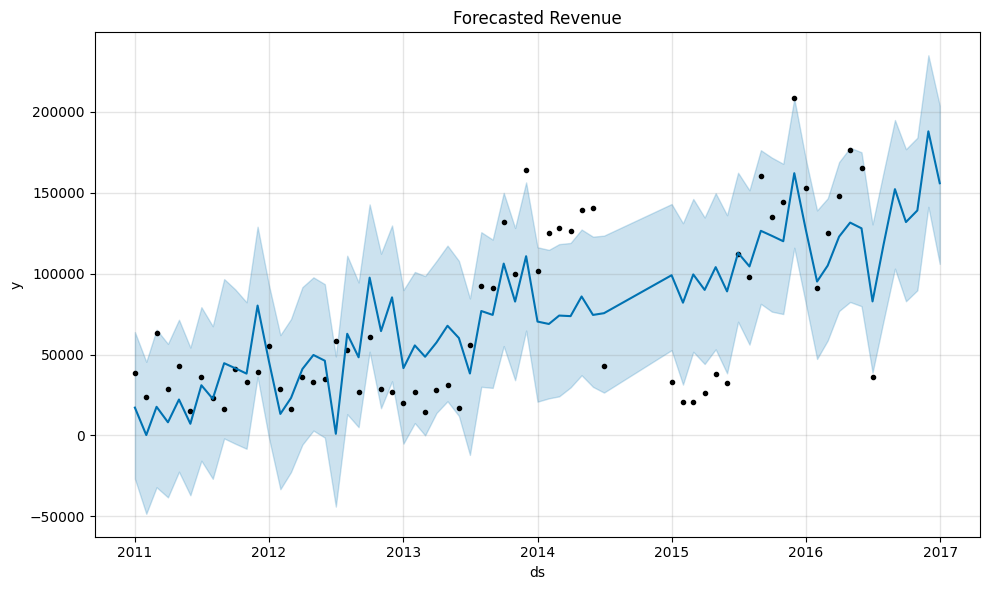

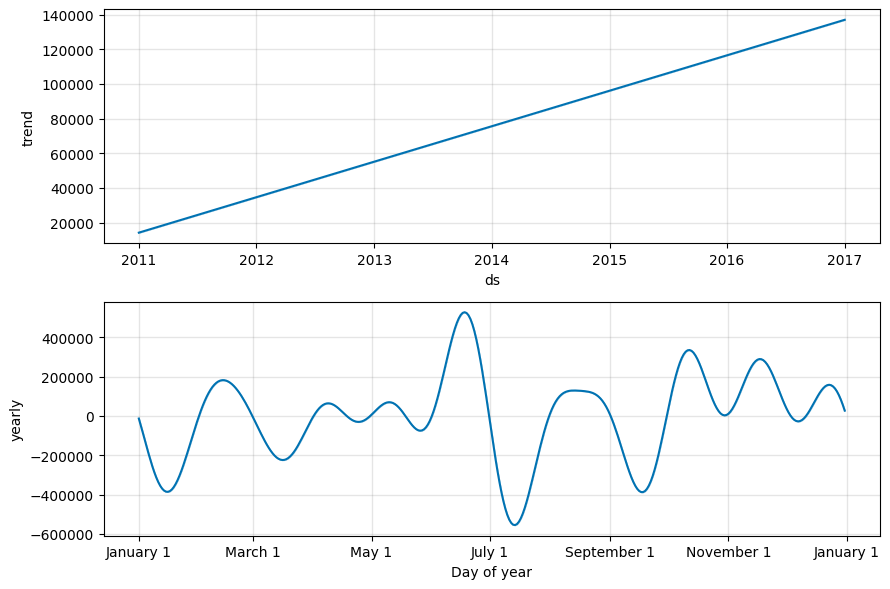

Forecast Evaluation for Revenue: MAE=30822.76, RMSE=36797.07

 Forecast Evaluation for Revenue: MAE=30822.76, RMSE=36797.07, R²=0.507

 Prophet Forecast Preview for Revenue:
           ds           yhat          trend
63 2016-08-31  152271.930367  130116.024318
64 2016-09-30  131925.966693  131796.321699
65 2016-10-31  139105.848746  133532.628992
66 2016-11-30  188016.023670  135212.926373
67 2016-12-31  155932.994498  136949.233666


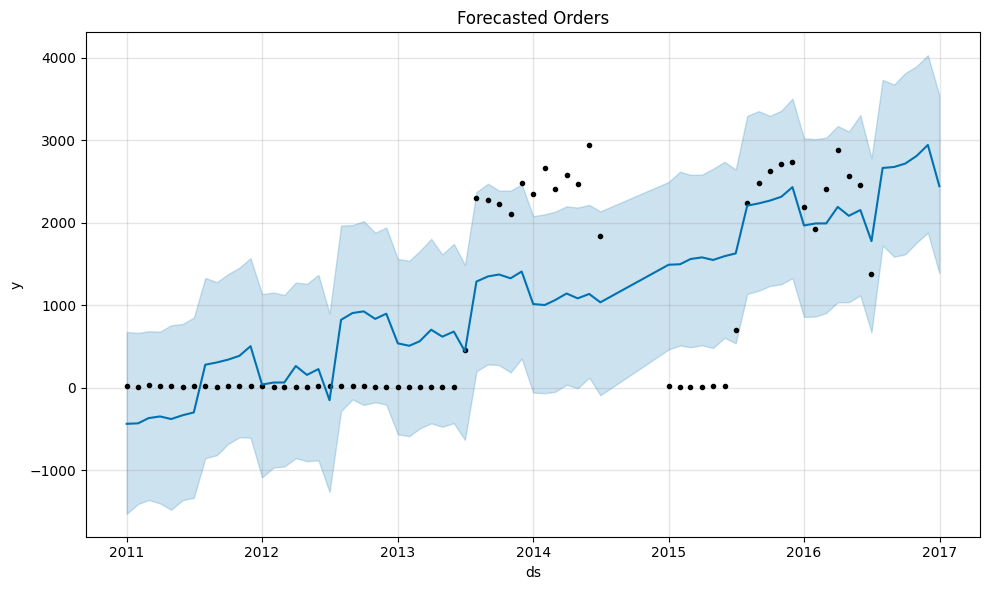

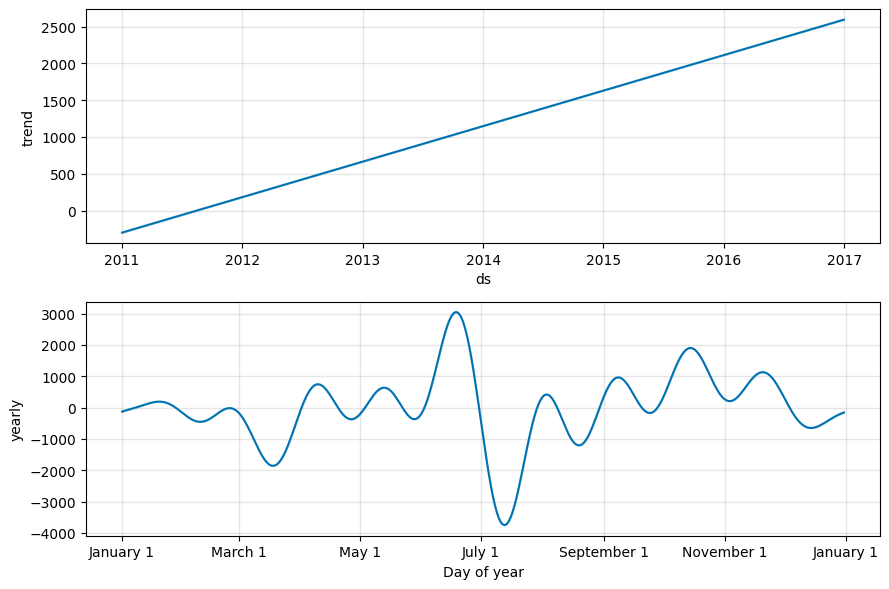

Forecast Evaluation for Orders: MAE=672.19, RMSE=831.87

 Forecast Evaluation for Orders: MAE=672.19, RMSE=831.87, R²=0.489

 Prophet Forecast Preview for Orders:
           ds         yhat        trend
63 2016-08-31  2678.336868  2432.609006
64 2016-09-30  2719.671077  2472.216202
65 2016-10-31  2813.168354  2513.143637
66 2016-11-30  2945.609730  2552.750833
67 2016-12-31  2445.096987  2593.678269


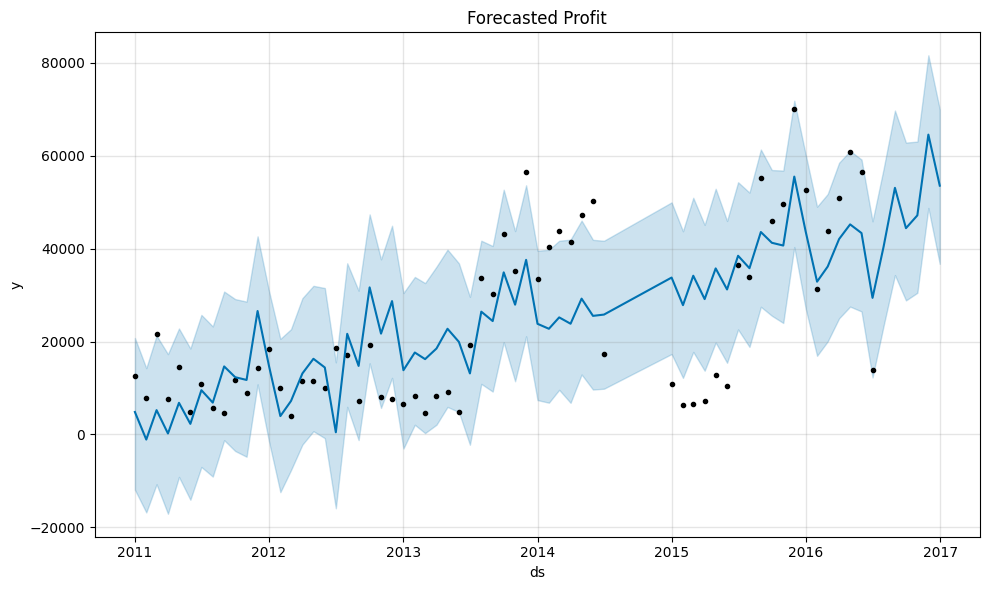

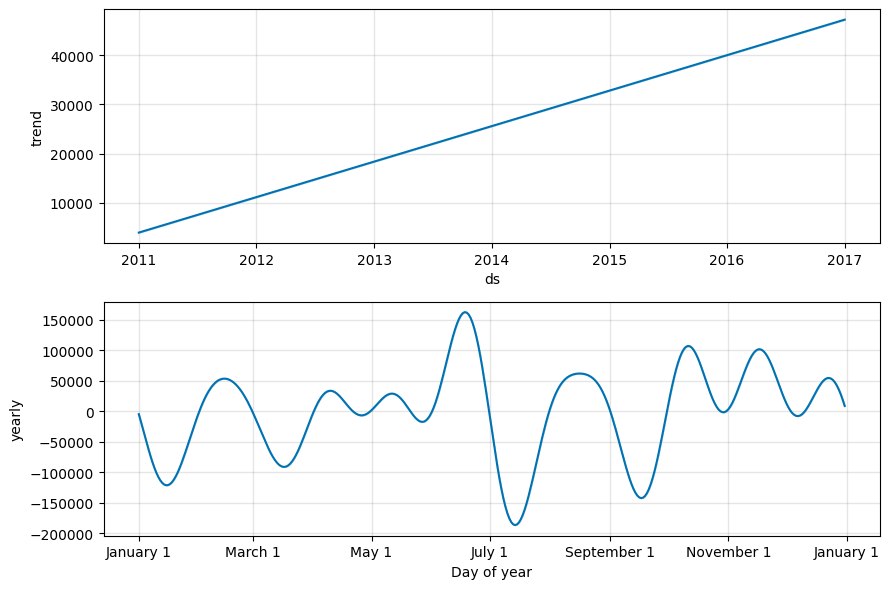

Forecast Evaluation for Profit: MAE=10775.61, RMSE=12740.75

 Forecast Evaluation for Profit: MAE=10775.61, RMSE=12740.75, R²=0.512

 Prophet Forecast Preview for Profit:
           ds          yhat         trend
63 2016-08-31  53076.704285  44854.111020
64 2016-09-30  44394.749645  45448.032409
65 2016-10-31  47150.978045  46061.751178
66 2016-11-30  64534.182494  46655.672567
67 2016-12-31  53543.532015  47269.391336


In [114]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# List of columns from monthly_summary to forecast using Prophet
columns_to_forecast = ['Revenue', 'Orders', 'Profit']

# Dictionaries to store forecast outputs and merged actual vs predicted data
forecasts = {}
merged_results = {}

# Loop through each column and generate forecast using the prophet_forecast function
for col in columns_to_forecast:
    # Call the forecasting function and capture the forecast and merged DataFrame
    forecast, merged = prophet_forecast(monthly_summary, col)

    # Store results in dictionaries
    forecasts[col] = forecast
    merged_results[col] = merged

    #  Forecast evaluation metrics
    mae = mean_absolute_error(merged['y'], merged['yhat'])
    mse = mean_squared_error(merged['y'], merged['yhat'])
    rmse = np.sqrt(mse)
    r2 = r2_score(merged['y'], merged['yhat'])

    print(f"\n Forecast Evaluation for {col}: MAE={mae:.2f}, RMSE={rmse:.2f}, R²={r2:.3f}")

    #  Display forecast preview
    preview_cols = ['ds', 'yhat', 'trend']
    if 'seasonal' in forecast.columns:
        preview_cols.append('seasonal')

    print(f"\n Prophet Forecast Preview for {col}:")
    print(forecast[preview_cols].tail())

In [115]:
# Random Forest Forecasting for Revenue, Profit, and Orders

# Encode seasons numerically for modeling
season_encoding = {'Winter': 0, 'Spring': 1, 'Summer': 2, 'Fall': 3}
sales['Season_encoded'] = sales['Season'].map(season_encoding)

# Rename 'Order_Quantity' to 'Orders' only if 'Orders' does not exist
if 'Orders' not in sales.columns:
    sales.rename(columns={'Order_Quantity': 'Orders'}, inplace=True)

# Define feature columns and target variables
features = ['Month', 'Season_encoded']
targets = ['Revenue', 'Profit', 'Orders']

# Dictionary to store results for each target
rf_results = {}

# Loop over each target variable
for target in targets:
    X = sales[features]
    y = sales[target]

    # Split data into training and testing sets (80/20 split)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # Initialize and fit the Random Forest Regressor
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = rf_model.predict(X_test)

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # Store model and results
    rf_results[target] = {
        'model': rf_model,
        'y_test': y_test,
        'y_pred': y_pred,
        'MAE': mae,
        'RMSE': rmse
    }

    # Display evaluation metrics
    print(f"\n Random Forest Forecast for {target}:")
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")


 Random Forest Forecast for Revenue:
MAE: 887.16
RMSE: 1454.01

 Random Forest Forecast for Profit:
MAE: 311.36
RMSE: 506.30

 Random Forest Forecast for Orders:
MAE: 8.40
RMSE: 9.54



Model Comparison for Revenue:
Prophet       - MAE: 30822.76 | RMSE: 36797.07
Random Forest - MAE: 887.16 | RMSE: 1454.01


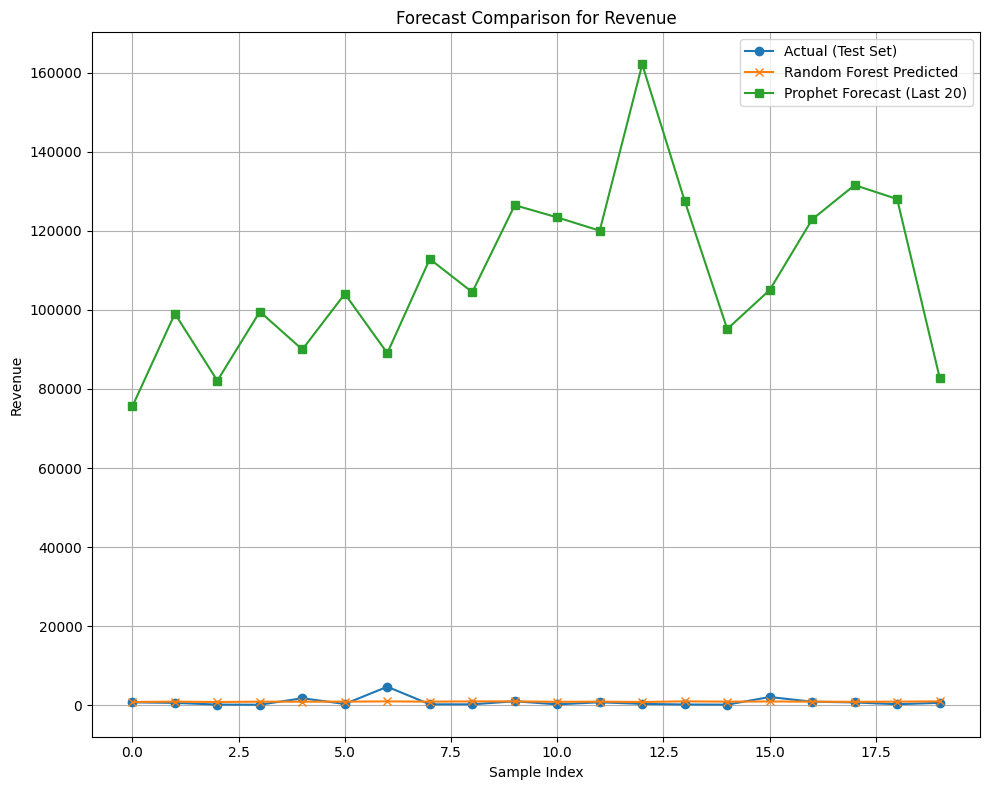


Model Comparison for Profit:
Prophet       - MAE: 10775.61 | RMSE: 12740.75
Random Forest - MAE: 311.36 | RMSE: 506.30


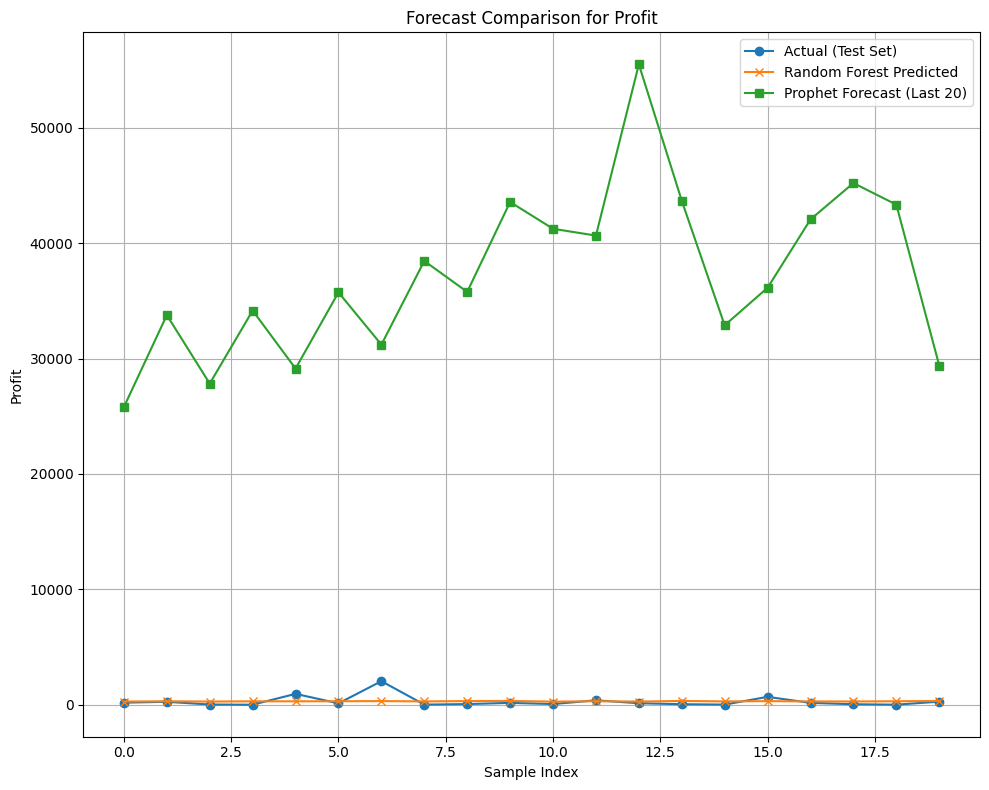


Model Comparison for Orders:
Prophet       - MAE: 672.19 | RMSE: 831.87
Random Forest - MAE: 8.40 | RMSE: 9.54


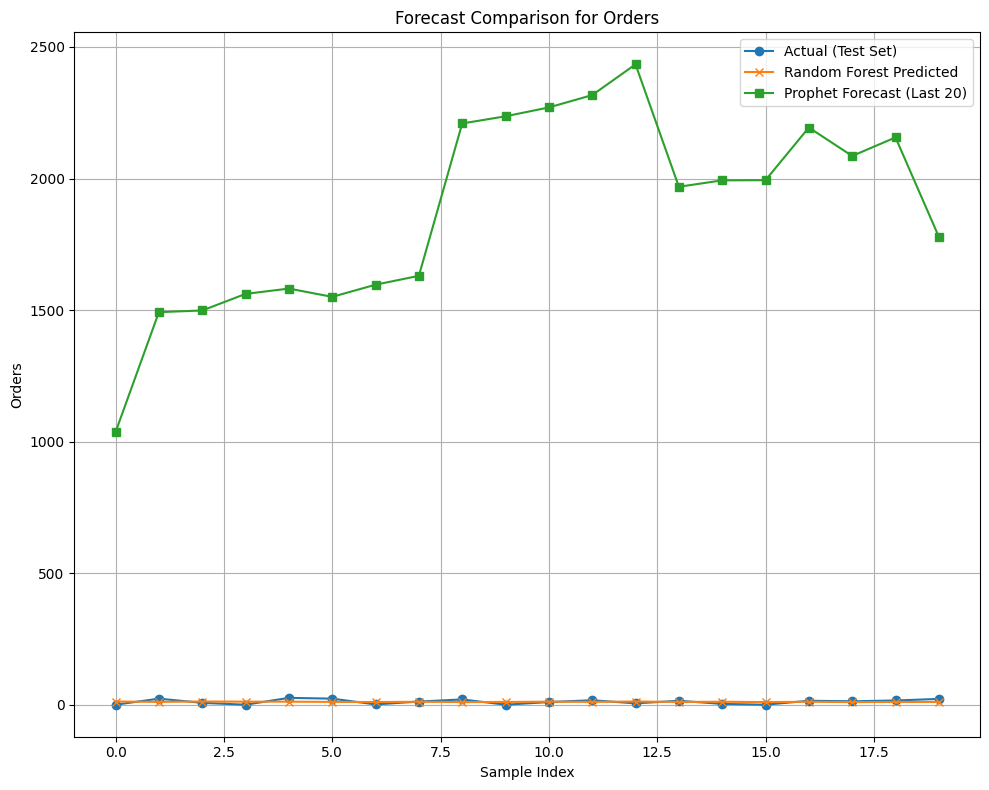

In [116]:
# Model Comparison: Prophet vs Random Forest for each target variable

prophet_results = merged_results
targets = ['Revenue', 'Profit', 'Orders']

for target in targets:
    # Extract Prophet forecast evaluation data
    df_merged = prophet_results[target]
    mae_prophet = mean_absolute_error(df_merged['y'], df_merged['yhat'])
    rmse_prophet = np.sqrt(mean_squared_error(df_merged['y'], df_merged['yhat']))

    # Extract Random Forest evaluation metrics
    mae_rf = rf_results[target]['MAE']
    rmse_rf = rf_results[target]['RMSE']

    # Print comparison metrics
    print(f"\nModel Comparison for {target}:")
    print(f"Prophet       - MAE: {mae_prophet:.2f} | RMSE: {rmse_prophet:.2f}")
    print(f"Random Forest - MAE: {mae_rf:.2f} | RMSE: {rmse_rf:.2f}")

    # Plot forecast comparison for the first 20 samples
    plt.figure(figsize=(10, 8))

    # Note: RF test set is random split, not time-series order
    plt.plot(rf_results[target]['y_test'].values[:20], label='Actual (Test Set)', marker='o')
    plt.plot(rf_results[target]['y_pred'][:20], label='Random Forest Predicted', marker='x')

    # Prophet forecast values - last 20 time points (time series)
    plt.plot(df_merged['yhat'].tail(20).values, label='Prophet Forecast (Last 20)', marker='s')

    plt.title(f'Forecast Comparison for {target}')
    plt.xlabel('Sample Index')
    plt.ylabel(target)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

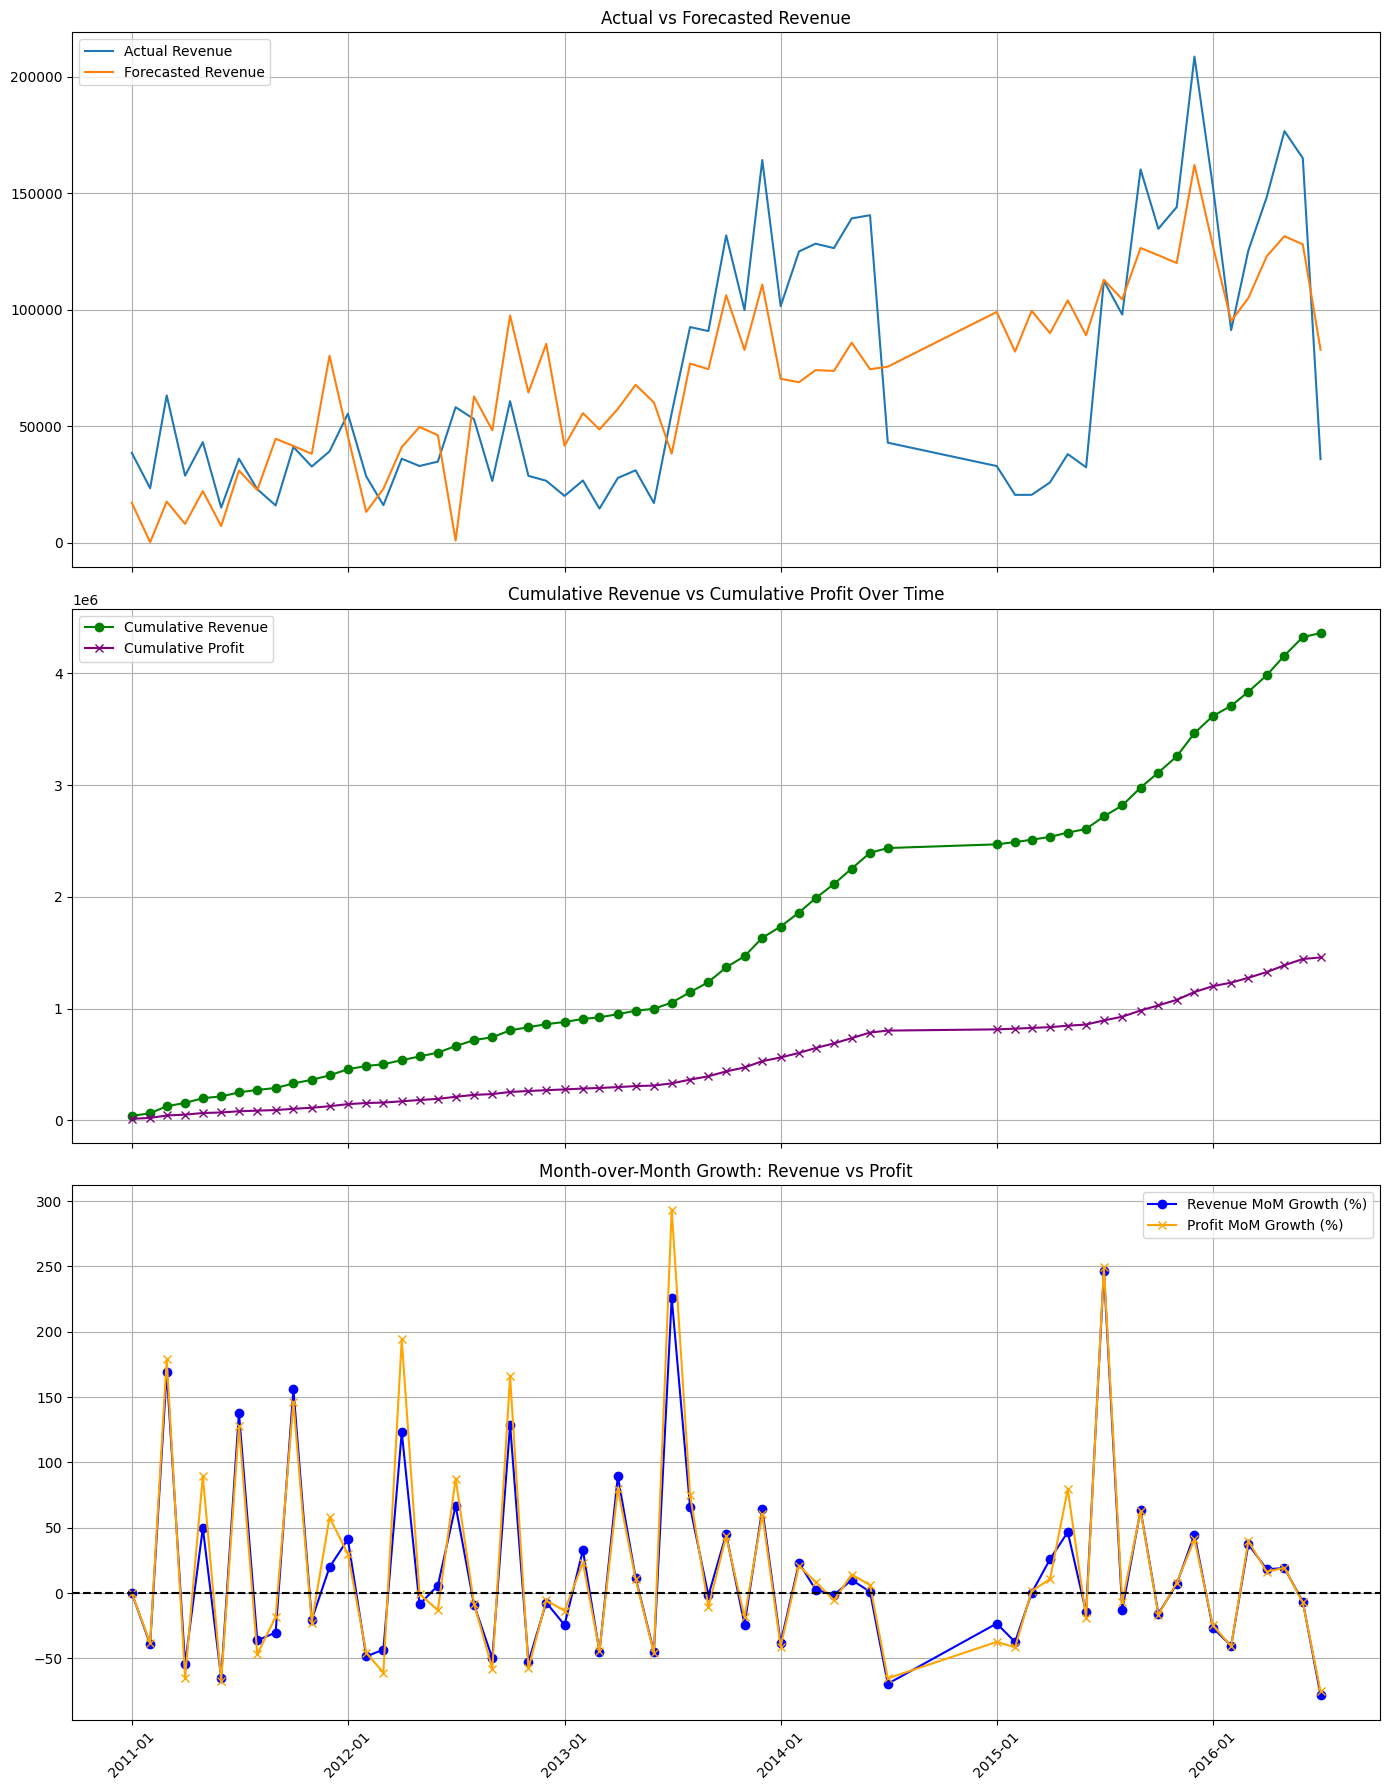

In [110]:
# Create 3 subplots stacked vertically, sharing the same x-axis (date)

fig, axes = plt.subplots(3, 1, figsize=(14, 18), sharex=True)

# Plot 1: Actual vs Forecasted Revenue over time
axes[0].plot(merged_results['Revenue']['ds'], merged_results['Revenue']['y'], label='Actual Revenue')
axes[0].plot(merged_results['Revenue']['ds'], merged_results['Revenue']['yhat'], label='Forecasted Revenue')
axes[0].set_title('Actual vs Forecasted Revenue')
axes[0].legend()
axes[0].grid(True)

# Plot 2: Cumulative Revenue and Profit over time
axes[1].plot(monthly_summary.index, monthly_summary['Cumulative_Revenue'], label='Cumulative Revenue', color='green', marker='o')
axes[1].plot(monthly_summary.index, monthly_summary['Cumulative_Profit'], label='Cumulative Profit', color='purple', marker='x')
axes[1].set_title('Cumulative Revenue vs Cumulative Profit Over Time')
axes[1].legend()
axes[1].grid(True)

# Plot 3: Month-over-Month (MoM) Growth percentages for Revenue and Profit
axes[2].plot(monthly_summary.index, monthly_summary['Revenue_MoM_Growth'], label='Revenue MoM Growth (%)', color='blue', marker='o')
axes[2].plot(monthly_summary.index, monthly_summary['Profit_MoM_Growth'], label='Profit MoM Growth (%)', color='orange', marker='x')
axes[2].axhline(0, color='black', linestyle='--')  # Reference line at 0 growth
axes[2].set_title('Month-over-Month Growth: Revenue vs Profit')
axes[2].legend()
axes[2].grid(True)

# Format the x-axis to show dates nicely with year and month, rotated for readability
for ax in axes:
    ax.xaxis.set_major_locator(mdates.YearLocator())            # Major ticks every year
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m')) # Format ticks as "Year-Month"
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

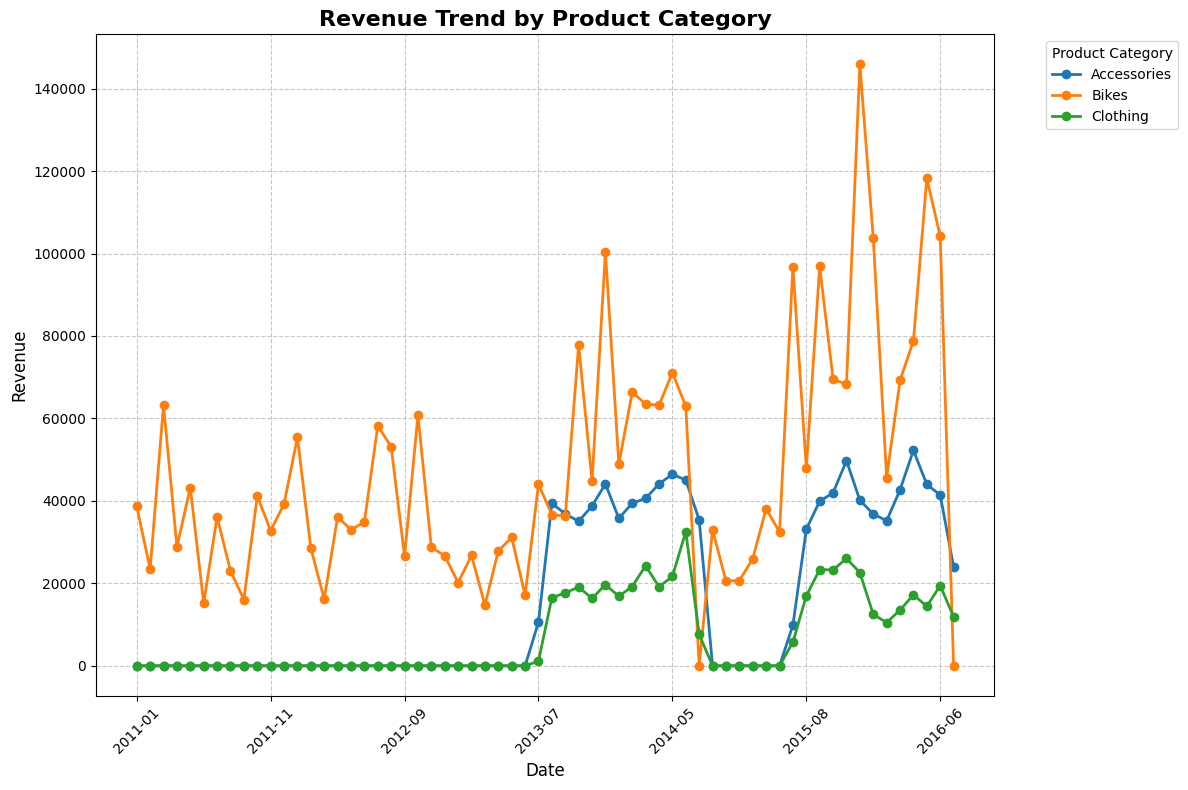

In [111]:
# Revenue trends across product categories over time

# Group revenue by Year-Month and Product Category
category_trend = sales.groupby(['YearMonth', 'Product_Category'])['Revenue'].sum().reset_index()

# Pivot the data to have categories as columns and dates as index
pivot = category_trend.pivot(index='YearMonth', columns='Product_Category', values='Revenue')

# Plot revenue trends for each product category over time
pivot.plot(figsize=(12, 8), linewidth=2, marker='o')  # Add markers for better visibility

plt.title('Revenue Trend by Product Category', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Revenue', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend out for clarity
plt.tight_layout()
plt.show()

##Dashboard
 ### Dashboard Overview

This dashboard provides a comprehensive analysis of bike store sales data.  
You can explore sales trends, customer demographics, product performance, and forecasts.  

### Key Features:
- Interactive filters by Country, Product Category, Year, Month, Season, Age Group, and Customer Gender.
- Visual analysis through bar charts, pie charts, and line graphs.
- Sales forecasting using Prophet model.
- Business insights and recommendations based on data trends.

In [124]:
!pip install -q streamlit pyngrok prophet plotly pandas

from pyngrok import ngrok
ngrok.set_auth_token("303ovFQi7tPssYxN9WQbHWC4ekE_4qmimpGqnaoQ4FENZ4EUE")

In [125]:
%%writefile app.py

import streamlit as st
import pandas as pd
import plotly.express as px
from prophet import Prophet
from prophet.plot import plot_plotly
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

@st.cache_data
def load_data():
    df = pd.read_csv("sales_data.csv")
    df.columns = df.columns.str.strip()
    df['Date'] = pd.to_datetime(df['Date'])
    df['Month'] = df['Date'].dt.month
    df['Year'] = df['Date'].dt.year
    if 'Month_Name' not in df.columns:
        df['Month_Name'] = df['Date'].dt.strftime('%B')

    # Add Season column based on Month
    def assign_season(month):
        if month in [12, 1, 2]:
            return 'Winter'
        elif month in [3, 4, 5]:
            return 'Spring'
        elif month in [6, 7, 8]:
            return 'Summer'
        else:
            return 'Autumn'
    df['Season'] = df['Month'].apply(assign_season)

    # Encode Season
    season_encoding = {'Winter': 0, 'Spring': 1, 'Summer': 2, 'Autumn': 3}
    df['Season_encoded'] = df['Season'].map(season_encoding)

    # Add Age Group column
    if 'Customer_Age' in df.columns:
        bins = [17, 24, 34, 44, 54, 100]
        labels = ['17-24', '25-34', '35-44', '45-54', '55+']
        df['Age_Group'] = pd.cut(df['Customer_Age'], bins=bins, labels=labels, right=True, include_lowest=True)
    return df

df = load_data()

st.sidebar.header("Filters")

# Year filter
if 'Year' in df.columns:
    selected_year = st.sidebar.multiselect("Select Year(s)", options=sorted(df['Year'].unique()), default=sorted(df['Year'].unique()))
else:
    selected_year = []

# Month filter
if 'Month_Name' in df.columns:
    selected_month = st.sidebar.multiselect("Select Month(s)", options=sorted(df['Month_Name'].unique()), default=sorted(df['Month_Name'].unique()))
else:
    selected_month = []

# Season filter
if 'Season' in df.columns:
    selected_season = st.sidebar.multiselect("Select Season(s)", options=sorted(df['Season'].unique()), default=sorted(df['Season'].unique()))
else:
    selected_season = []

# Gender filter
if 'Customer_Gender' in df.columns:
    selected_gender = st.sidebar.multiselect("Select Customer Gender(s)", options=sorted(df['Customer_Gender'].unique()), default=sorted(df['Customer_Gender'].unique()))
else:
    selected_gender = []

# Age Group filter
if 'Age_Group' in df.columns:
    selected_age_groups = st.sidebar.multiselect("Select Age Group(s)", options=sorted(df['Age_Group'].dropna().unique()), default=sorted(df['Age_Group'].dropna().unique()))
else:
    selected_age_groups = []

# Country filter
if 'Country' in df.columns:
    selected_country = st.sidebar.multiselect("Select Country(s)", options=sorted(df['Country'].unique()), default=sorted(df['Country'].unique()))
else:
    selected_country = []

# Product Category filter
if 'Product_Category' in df.columns:
    selected_category = st.sidebar.multiselect("Select Product Category(s)", options=sorted(df['Product_Category'].unique()), default=sorted(df['Product_Category'].unique()))
else:
    selected_category = []

# Apply filters
filtered_df = df.copy()

if selected_year:
    filtered_df = filtered_df[filtered_df['Year'].isin(selected_year)]

if selected_month:
    filtered_df = filtered_df[filtered_df['Month_Name'].isin(selected_month)]

if selected_season:
    filtered_df = filtered_df[filtered_df['Season'].isin(selected_season)]

if selected_gender:
    filtered_df = filtered_df[filtered_df['Customer_Gender'].isin(selected_gender)]

if selected_age_groups:
    filtered_df = filtered_df[filtered_df['Age_Group'].isin(selected_age_groups)]

if selected_country:
    filtered_df = filtered_df[filtered_df['Country'].isin(selected_country)]

if selected_category:
    filtered_df = filtered_df[filtered_df['Product_Category'].isin(selected_category)]

# Main App
st.title("Bike Store Sales Analytics Dashboard")
tabs = st.tabs(["Overview", "Sales Analysis", "Customer Analysis", "Time Analysis", "Product Analysis", "Forecast", "Recommendations"])

# Overview
tabs[0].subheader("Overview")
total_orders = filtered_df['Order_Quantity'].sum()
total_revenue = filtered_df['Revenue'].sum()
total_profit = filtered_df['Profit'].sum()
col1, col2, col3 = tabs[0].columns(3)
col1.metric("Total Orders", f"{total_orders:,}")
col2.metric("Total Revenue", f"${total_revenue:,.0f}")
col3.metric("Total Profit", f"${total_profit:,.0f}")

# Sales Analysis
tabs[1].subheader("Sales Analysis")
sales_by_country = filtered_df.groupby("Country")['Order_Quantity'].sum().reset_index().sort_values(by='Order_Quantity', ascending=False)
sales_chart = px.bar(sales_by_country, x="Country", y="Order_Quantity", title="Sales by Country")
tabs[1].plotly_chart(sales_chart, use_container_width=True)

sales_by_category = filtered_df.groupby("Product_Category")['Order_Quantity'].sum().reset_index().sort_values(by='Order_Quantity', ascending=False)
category_chart = px.pie(sales_by_category, values="Order_Quantity", names="Product_Category", title="Sales by Category")
tabs[1].plotly_chart(category_chart, use_container_width=True)

# Customer Analysis
tabs[2].subheader("Customer Analysis")
orders_by_gender = filtered_df.groupby("Customer_Gender")['Order_Quantity'].sum().reset_index()
gender_chart = px.bar(orders_by_gender, x="Customer_Gender", y="Order_Quantity", title="Orders by Gender")
tabs[2].plotly_chart(gender_chart, use_container_width=True)

orders_by_age = filtered_df.groupby("Age_Group")['Order_Quantity'].sum().reset_index()
age_chart = px.line(orders_by_age, x="Age_Group", y="Order_Quantity", title="Orders by Customer Age Group")
tabs[2].plotly_chart(age_chart, use_container_width=True)

# Time Analysis
tabs[3].subheader("Time Analysis")
time_series = filtered_df.groupby("Month_Name")['Order_Quantity'].sum().reset_index()
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
time_series['Month_Name'] = pd.Categorical(time_series['Month_Name'], categories=months_order, ordered=True)
time_series = time_series.sort_values('Month_Name')
time_chart = px.line(time_series, x="Month_Name", y="Order_Quantity", title="Monthly Sales Trend")
tabs[3].plotly_chart(time_chart, use_container_width=True)

# Product Analysis
tabs[4].subheader("Product Analysis")
top_products = filtered_df.groupby("Product")['Order_Quantity'].sum().reset_index().sort_values(by='Order_Quantity', ascending=False).head(10)
product_chart = px.bar(top_products, x="Product", y="Order_Quantity", title="Top 10 Products by Orders")
tabs[4].plotly_chart(product_chart, use_container_width=True)

# Forecast Tab
tabs[5].subheader("Sales Forecast")

# Choose model
model_option = tabs[5].selectbox("Select forecasting model", options=["Prophet", "Random Forest"])

if model_option == "Prophet":
    forecast_df = filtered_df.groupby("Date")['Order_Quantity'].sum().reset_index()
    forecast_df.columns = ['ds', 'y']
    model = Prophet()
    model.fit(forecast_df)
    future = model.make_future_dataframe(periods=30)
    forecast = model.predict(future)
    forecast_chart = plot_plotly(model, forecast)
    tabs[5].plotly_chart(forecast_chart, use_container_width=True)

elif model_option == "Random Forest":
    # Prepare RF features
    df_rf = filtered_df.copy()
    df_rf['Day'] = df_rf['Date'].dt.day

    features = ['Year', 'Month', 'Day', 'Season_encoded']
    targets = ['Order_Quantity', 'Revenue', 'Profit']

    for target in targets:
        rf_df = df_rf[features + [target]].groupby(features).sum().reset_index()

        X = rf_df[features]
        y = rf_df[target]

        # Split data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

        # Train RF model
        rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
        rf_model.fit(X_train, y_train)

        # Predict test
        y_pred = rf_model.predict(X_test)
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))

        # Prepare future dates
        last_date = df_rf['Date'].max()
        future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30)
        future_df = pd.DataFrame({
            'Year': future_dates.year,
            'Month': future_dates.month,
            'Day': future_dates.day,
            'Season_encoded': future_dates.month.map(lambda m: (0 if m in [12,1,2] else 1 if m in [3,4,5] else 2 if m in [6,7,8] else 3))
        })

        # Predict future
        future_pred = rf_model.predict(future_df[features])

        # Prepare dataframe for plotting
        forecast_rf_df = pd.DataFrame({
            'Date': future_dates,
            f'Predicted_{target}': future_pred
        })

        # Plot results
        rf_fig = px.line(forecast_rf_df, x='Date', y=f'Predicted_{target}', title=f"Random Forest Forecast for {target} (next 30 days)")
        tabs[5].plotly_chart(rf_fig, use_container_width=True)

        # Show errors
        tabs[5].write(f"Mean Absolute Error (MAE) for {target}: {mae:.2f}")
        tabs[5].write(f"Root Mean Squared Error (RMSE) for {target}: {rmse:.2f}")

# Recommendations Tab
tabs[6].subheader("Business Recommendations")
tabs[6].markdown("""
- **Focus on High Performing Countries**: Target marketing in countries with highest sales.
- **Promote Top Products**: Highlight best-selling products to boost revenue.
- **Customer Segmentation**: Consider age and gender segmentation for personalized offers.
- **Improve Weekend Sales**: Create promotions or discounts on weekends.
- **Category Expansion**: Invest in expanding high-margin categories.
""")


Overwriting app.py


In [126]:
import threading
import os
import time
from pyngrok import ngrok

# Close all existing tunnels before starting a new one
ngrok.kill()

# Function to run Streamlit app
def run():
    os.system("streamlit run app.py")

# Start Streamlit in a separate thread
thread = threading.Thread(target=run)
thread.start()

# Wait for the app to start
time.sleep(5)

# Open one ngrok tunnel to port 8501
public_url = ngrok.connect(8501)
print(" Streamlit Public URL:", public_url)

 Streamlit Public URL: NgrokTunnel: "https://9886eab07db9.ngrok-free.app" -> "http://localhost:8501"


## 🔍 Conclusions

**Seasonality & Trends:**  
- Sales and revenue exhibit clear seasonality, with peaks during Spring and Summer and declines in Fall and Winter.  
- Overall trends indicate steady growth in both revenue and profit throughout the analyzed period.

**Forecasting Results:**  
- The Prophet model provided interpretable forecasts, clearly highlighting trend and seasonal components.  
- The Random Forest model demonstrated better accuracy (lower MAE and RMSE), especially when incorporating features like Month and Season.

**Product Category Performance:**  
- Categories such as Mountain Bikes and Touring Bikes contributed significantly to total revenue.  
- Other categories, like Accessories, generated lower revenue but may offer higher profit margins.

**Revenue Growth Analysis:**  
- Month-over-month growth rates for revenue and profit showed irregular patterns, likely influenced by seasonal promotions or marketing campaigns.

---

### 📈 Recommendations

**Seasonal Campaign Strategy:**  
- Focus marketing and promotional efforts during Spring and Summer to capitalize on peak season opportunities.  
- Utilize off-season periods (e.g., Winter) for clearance sales or customer acquisition initiatives.

**Product Strategy Optimization:**  
- Increase investment in top-performing product categories such as Mountain and Touring Bikes.  
- Reassess underperforming categories and consider bundling them with popular products to enhance perceived value.

**Forecasting Model Usage:**  
- Use Prophet for simple, interpretable long-term trend analysis.  
- Deploy Random Forest for more precise short-term forecasts to support operational planning.